In [ ]:
import re

a = "2022-03-20 13:29:49 [    INFO] Found:        person       1 at (1964,  552)"

log = re.compile("(\d+-\d+-\d+)\s*(\d+:\d+:\d+)\s*\[\s*\w+\]\s*(\w+):\s*(\w+)\s*(\d+)\s*\w+\s*\(\s*(\d+,\s*\d+)\)")
log.search(a).group(6)

In [1]:
import tensorflow as tf
# this code allocates only as much GPU as it needs and expands the memory when running
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:# Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


2022-03-25 14:35:10.820483: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 14:35:10.848205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 14:35:10.848369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 14:35:10.891471: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [2]:
#tf.keras.backend.set_image_data_format('channels_last')
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

def import_FaceNet(model_path='../dat/models/keras-facenet-h5/model.json', 
                   weight_path = '../dat/models/keras-facenet-h5/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet


In [3]:
import numpy as np
FRmodel = import_FaceNet()
p = "/mnt/golem/frodo/clusteredFaces_lower_resolution/"

database = {}
database["Sandro"] = img_to_encoding(p + "Sandro_Bruno/resolution_64x64/FaceNet_resolution/60036_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["Caren"] = img_to_encoding(p + "Caren_Bruno/resolution_64x64/FaceNet_resolution/63432_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["Silvia"] = img_to_encoding(p + "Silvia/resolution_64x64/FaceNet_resolution/6434_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["Jürgen"] = img_to_encoding(p + "Jürgen_Schäck/resolution_64x64/FaceNet_resolution/43931_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["Elvira"] = img_to_encoding(p + "Elvira_Bruno/resolution_64x64/FaceNet_resolution/52534_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["Salvatore"] = img_to_encoding(p + "Salvatore_Bruno/resolution_64x64/FaceNet_resolution/51851_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["Francesca"] = img_to_encoding(p + "Francesca_Möske/resolution_64x64/FaceNet_resolution/26254_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["Stefan"] = img_to_encoding(p + "Stefan_Leber/resolution_64x64/FaceNet_resolution/63603_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["Melanie"] = img_to_encoding(p + "Melanie_Leber/resolution_64x64/FaceNet_resolution/51267_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["Maureen"] = img_to_encoding(p + "Maureen_Leber/resolution_64x64/FaceNet_resolution/53927_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["Hubert"] = img_to_encoding(p + "Hubert_Leber/resolution_64x64/FaceNet_resolution/45252_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
database["David"] = img_to_encoding(p + "David_Bürchner/resolution_64x64/FaceNet_resolution/50162_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)

2022-03-25 09:37:52.136166: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8301
2022-03-25 09:37:53.197060: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


(160, 160, 3)


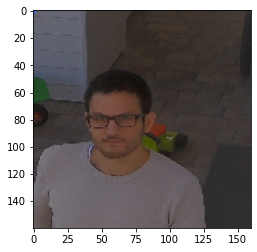

In [4]:
import matplotlib.pyplot as plt
test = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/2022March24_10_37_25_Eingang752_crop_track_1.png"

Sandro = tf.keras.preprocessing.image.load_img(test, target_size=(160, 160))
print(np.around(np.array(Sandro) / 255.0, decimals=12).shape)
plt.imshow(Sandro)

[INFO] 1 faces detected!!!
[186, 328, 195, 255]


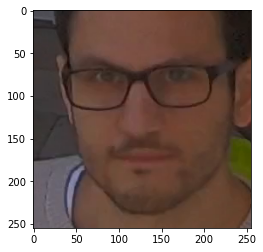

In [47]:
def detect_face(image_path, plot=False):
    from mtcnn.mtcnn import MTCNN
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image

    if image_path.split(".")[-1].lower() == "png":
        # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
        try:
            image = Image.open(image_path).convert('RGBA')
            background = Image.new('RGBA', image.size, (255,255,255))
            alpha_composite = Image.alpha_composite(background, image)
            alpha_composite_3 = alpha_composite.convert('RGB')

            pic = np.asarray(alpha_composite_3)

        except Exception as e:
            print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
            print(e)
            return None


    else:
        pic = plt.imread(image_path)

    plt.imshow(pic)
    dim = pic.shape
    # create/initiate the detector, using default weights
    detector = MTCNN()

    # detct the face
    try:
        faces = detector.detect_faces(pic)
    except Exception as e:
        print(e)

    if len(faces) == 0:
        return None
    if len(faces) >= 1:

        print("[INFO] {} faces detected!!!".format(len(faces)))

        ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
        faces = faces[ind]
        print(faces["box"])


     # get coordinates of detected face 
    x1, y1, width, height = faces['box']
    x2, y2 = x1 + width, y1 + height

    # recenter the detected rectangle around the face
    circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
    center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


    ### adjust the ratio of the rectangle towards the longer side of height and width
    ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
    ### we recenter the rectangle and keep same side size                
    # determine the longer side of width and height
    MAX = int(np.max([width, height]))
    x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

    # check for the cases that we go out of the image with the new rectangle

    # in case we go out of the left side of the image
    if x1 < 0: 
        # add the part which was over the left side and add it to the right side of the rectangle
        x2 += x1*-1
        # set the left point to the border of the left side of the image
        x1 = 0
    # in case we go out of the right side of the image
    if x2 > dim[1]:
        # add the part which was over the right side and add it to the left side of the rectangle
        x1 -= x2-dim[1]
        # set the right point to the border of the right side of the image
        x2 = dim[1]
    # in case we go out of the top side of the image
    if y1 < 0:    
        # add the part which was over the top part and add it to the bottom part of the rectangle
        y2 += y1*-1
        # set the top point to the boarder of the top part of the image
        y1 = 0
    # in case we go out of the bottom part of the image
    if y2 > dim[0]:
        # add the part which was over the bottom part and add it to the top part of the rectangle
        y1 -= y2-dim[0]
        # set the bottom point to the boarder of the bottom part of the image
        y2 = dim[0]

    if plot:

        import matplotlib.patches as patches
        from PIL import Image

        im = Image.open(image_path)

        # Create figure and axes
        fig, ax = plt.subplots()

        # Display the image
        ax.imshow(im)

        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

        plt.show()

        plt.imshow(pic[y1:y2, x1:x2])


    # crop the face out of the image 
    return pic[y1:y2, x1:x2]

crop = detect_face(test)
plt.imsave("/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/Sandro_cam/Sandro.png", crop)
plt.imshow(crop)

In [48]:
def who_is_it(image_path, database, model):
    """
    Implements face recognition for the office by finding who is the person on the image_path image.
    
    Arguments:
        image_path -- path to an image
        database -- database containing image encodings along with the name of the person on the image
        model -- your Inception model instance in Keras
    
    Returns:
        min_dist -- the minimum distance between image_path encoding and the encodings from the database
        identity -- string, the name prediction for the person on image_path
    """
    
    ### START CODE HERE

    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding() see example above. ## (≈ 1 line)
    encoding =  img_to_encoding(image_path,model)
    
    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 (≈1 line)
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
        dist = np.linalg.norm(tf.subtract(encoding, db_enc))

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if dist < min_dist:
            min_dist = dist
            identity = name
    ### END CODE HERE
    
    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

test2 = "/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_64x64/FaceNet_resolution/52436_cropped_face_64_espcn4_FaceNet_input.png"
test3 = "/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_64x64/FaceNet_resolution/34969_cropped_face_64_espcn4_FaceNet_input.png"
test4 = "/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_64x64/FaceNet_resolution/30559_cropped_face_64_espcn4_FaceNet_input.png"
test5 = "/mnt/golem/frodo/clusteredFaces_lower_resolution/Salvatore_Bruno/resolution_64x64/FaceNet_resolution/60045_cropped_face_64_espcn4_FaceNet_input.png"
who_is_it("/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/Sandro_cam/Sandro.png", database, FRmodel)

Not in the database.


(1.1051126, 'Sandro')

In [50]:
who_is_it("/mnt/golem/frodo/clusteredFaces_lower_resolution/Stefan_Streuber/resolution_64x64/FaceNet_resolution/56369_cropped_face_64_espcn4_FaceNet_input.png", database,FRmodel)

Not in the database.


(0.9564666, 'David')

Not in the database.


(0.8747962, 'Sandro')

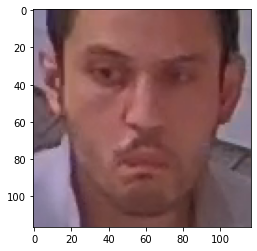

In [122]:
import random
import os
p2 = "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/cropped_faces/"
p3 = p2 + random.sample(os.listdir(p2),1)[0]
p4 = p3 + "/" + random.sample(os.listdir(p3),1)[0]
pic = plt.imread(p4)
plt.imshow(pic)
who_is_it(p4, database, FRmodel)

[INFO] 1 faces detected!!!
[199, 274, 365, 478]
(12, 128)
(1, 128)
(12,)
Not in the database.


[('Silvia', [1.151182770729065]),
 ('Melanie', [1.2741986513137817]),
 ('Jürgen', [1.3006343841552734]),
 ('Caren', [1.3280285596847534]),
 ('Stefan', [1.3715927600860596]),
 ('Maureen', [1.378366470336914]),
 ('Sandro', [1.426660180091858]),
 ('Elvira', [1.4475423097610474]),
 ('Salvatore', [1.4486892223358154]),
 ('Francesca', [1.4534624814987183]),
 ('Hubert', [1.474881649017334]),
 ('David', [1.5135955810546875])]

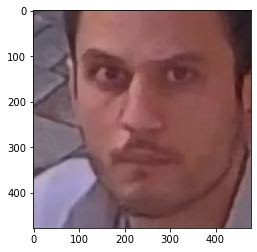

In [169]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm
from mtcnn.mtcnn import MTCNN    
import os

# this code allocates only 1GB of your GPU to tensorflow used by face detection
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
  
# this code allocates only as much GPU as it needs and expands the memory when running
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:# Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, arr, thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)

        if face is None:
            return None, "No face visible"
        plt.imshow(face)
        
        from skimage.transform import resize

        face = resize(face, (160, 160, 3))
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)
    

        # Find the closest encoding 
#         res = self.find_nearest([int(k) for k in arr.keys()], resolution)
#         print("nearest resolution {}".format(res))
        
      
            # Initialize "min_dist" to a large value, say 100 (≈1 line)

        # Loop over the database dictionary's names and encodings.
#         for (db_enc, name) in arr[res]:
        X,y = arr
        print(X.shape)
        print(encoding.shape)

        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
#         dist = np.linalg.norm(tf.subtract(encoding, X))
        dist = np.apply_along_axis(np.linalg.norm, 1, (X-encoding))
        print(dist.shape)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
#         if dist < min_dist:

        min_ind = np.argmin(dist)
        min_dist = dist[min_ind]
        identity = y[min_ind]
        encoding = X[min_ind,:]
                
        ### END CODE HERE

        if min_dist > thr:
            print("Not in the database.")
        else:
            print ("it's " + str(identity) + ", the distance is " + str(min_dist))
         


        return min_dist, identity, encoding, dist, y

 
    
    def img_to_encoding(self, img): 
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
#                 print(os.path.dirname(os.path.realpath(__file__)))
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            faces = []
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])

    
def import_FaceNet(model_path='/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.json', 
                   weight_path = '/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    


import random
import os
p2 = random.sample(["/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/Sandro_cam/",
      "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/Caren_cam/"],1)[0]
p3 = p2 + random.sample(os.listdir(p2),1)[0]
pic = plt.imread(p3)
plt.imshow(pic)

arr = np.vstack(list(database.values())), list(database.keys())
min_dist, identity, encoding, dist, y = FaceRecognition().who_is_it(p3, FaceNet=FRmodel, arr=arr)
sorted(dict(zip(y, dist.reshape(-1,1).tolist())).items(), key=lambda x: x[1])

[INFO] 2 faces detected!!!
[186, 143, 258, 355]
(12, 128)
(1, 128)
(12,)
Not in the database.


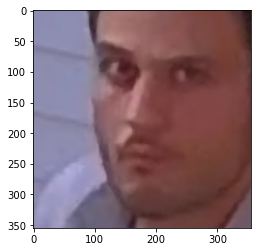

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm
from mtcnn.mtcnn import MTCNN    
import os

# this code allocates only 1GB of your GPU to tensorflow used by face detection
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
  
# this code allocates only as much GPU as it needs and expands the memory when running
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:# Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, arr, thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)

        if face is None:
            return None, "No face visible"
        plt.imshow(face)
        
        
        tmp = "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/tmp.png"
        plt.imsave(tmp, face)

        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(tmp, FaceNet)
    

        # Find the closest encoding 
#         res = self.find_nearest([int(k) for k in arr.keys()], resolution)
#         print("nearest resolution {}".format(res))
        
      
            # Initialize "min_dist" to a large value, say 100 (≈1 line)

        # Loop over the database dictionary's names and encodings.
#         for (db_enc, name) in arr[res]:
        X,y = arr
        print(X.shape)
        print(encoding.shape)

        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
#         dist = np.linalg.norm(tf.subtract(encoding, X))
        dist = np.apply_along_axis(np.linalg.norm, 1, (X-encoding))
        print(dist.shape)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
#         if dist < min_dist:

        min_ind = np.argmin(dist)
        min_dist = dist[min_ind]
        identity = y[min_ind]
        encoding = X[min_ind,:]
                
        ### END CODE HERE

        if min_dist > thr:
            print("Not in the database.")
        else:
            print ("it's " + str(identity) + ", the distance is " + str(min_dist))
         


        return min_dist, identity, encoding, dist, y

 
    #tf.keras.backend.set_image_data_format('channels_last')
    def img_to_encoding(self, image_path, model):
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
        img = np.around(np.array(img) / 255.0, decimals=12)
        x_train = np.expand_dims(img, axis=0)
        embedding = model.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
#                 print(os.path.dirname(os.path.realpath(__file__)))
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            faces = []
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])

def import_FaceNet(model_path='/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.json', 
                   weight_path = '/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    


import random
import os
p2 = random.sample(["/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/Sandro_cam/",
      "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/Caren_cam/"],1)[0]
p2 = "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/Sandro_cam/"
p3 = p2 + random.sample(os.listdir(p2),1)[0]
pic = plt.imread(p3)


arr = np.vstack(list(database.values())), list(database.keys())
min_dist, identity, encoding, dist, y = FaceRecognition().who_is_it(p3, FaceNet=FRmodel, arr=arr)



[('Sandro', [1.0813614130020142]),
 ('Stefan', [1.2102371454238892]),
 ('David', [1.2359856367111206]),
 ('Melanie', [1.262147307395935]),
 ('Jürgen', [1.2908321619033813]),
 ('Salvatore', [1.3766520023345947]),
 ('Hubert', [1.3786365985870361]),
 ('Francesca', [1.4074534177780151]),
 ('Caren', [1.408986210823059]),
 ('Silvia', [1.4151256084442139]),
 ('Maureen', [1.4442743062973022]),
 ('Elvira', [1.589263916015625])]

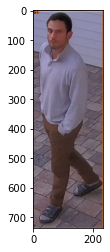

In [6]:
plt.imshow(pic)
sorted(dict(zip(y, dist.reshape(-1,1).tolist())).items(), key=lambda x: x[1])


[INFO] 1 faces detected!!!
[863, 473, 594, 758]
(12, 128)
(1, 128)
(12,)
Not in the database.


[('Sandro', [1.0011522769927979]),
 ('Salvatore', [1.2458109855651855]),
 ('David', [1.2671144008636475]),
 ('Melanie', [1.3150602579116821]),
 ('Jürgen', [1.3300503492355347]),
 ('Silvia', [1.3485407829284668]),
 ('Stefan', [1.381462574005127]),
 ('Francesca', [1.4010051488876343]),
 ('Caren', [1.4363889694213867]),
 ('Hubert', [1.4489773511886597]),
 ('Elvira', [1.5022666454315186]),
 ('Maureen', [1.5446704626083374])]

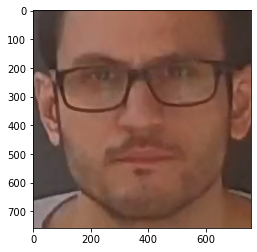

In [32]:
path2 = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/"
import re
test2 = [ i for i in os.listdir(path2) if re.match("\d+March25.*", i) ]
test2 = path2 + random.sample(test2,1)[0]

arr = np.vstack(list(database.values())), list(database.keys())
pic = plt.imread(test2)
plt.imshow(pic)
min_dist, identity, encoding, dist, y = FaceRecognition().who_is_it(test2, FaceNet=FRmodel, arr=arr)


sorted(dict(zip(y, dist.reshape(-1,1).tolist())).items(), key=lambda x: x[1])

[('Melanie', [1.172707200050354]),
 ('Sandro', [1.1945551633834839]),
 ('Salvatore', [1.2368037700653076]),
 ('Jürgen', [1.2373007535934448]),
 ('Stefan', [1.2663904428482056]),
 ('David', [1.279411792755127]),
 ('Silvia', [1.3299992084503174]),
 ('Caren', [1.3434284925460815]),
 ('Hubert', [1.3688626289367676]),
 ('Francesca', [1.4526563882827759]),
 ('Maureen', [1.468807339668274]),
 ('Elvira', [1.475888729095459])]

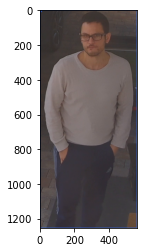

In [29]:
pic = plt.imread(test2)
plt.imshow(pic)

sorted(dict(zip(y, dist.reshape(-1,1).tolist())).items(), key=lambda x: x[1])

1 Physical GPUs, 1 Logical GPUs
[INFO] 1 faces detected!!!
[742, 349, 585, 747]
resolution of face 186
3.054811487273859
nearest resolution 64
(8478,)
it's Sandro_Bruno, the distance is 0.6138581597867847


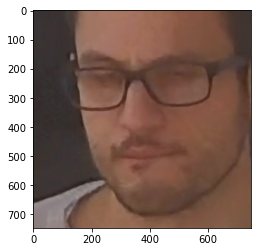

In [182]:

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm
from mtcnn.mtcnn import MTCNN    
import os
import cv2

# this code allocates only 1GB of your GPU to tensorflow used by face detection
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
  
# this code allocates only as much GPU as it needs and expands the memory when running
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:# Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, clf, arr, thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)

        if face is None:
            return None, "No face visible"
        plt.imshow(face)
        resolution = int(len(face)/zoom)
        print("resolution of face {}".format(resolution))
        
        from skimage.transform import resize
        print(variance_of_laplacian(face))

#         face = resize(face, (160, 160, 3))
#         face = self.resize(face[:,:,0], 160, 160)
        
        tmp = "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/tmp.png"
        plt.imsave(tmp, face)
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(tmp, FaceNet)

        # Find the closest encoding 
        # Initialize "min_dist" to a large value, say 100
#         min_dist = 100
        
#         database = json.loads(open(database).read())
        

        # Compute L2 distance between the target "encodings" and the current db_enc from the database.
        # note we compute multiple distances for a subject and pick the distance with the minimal distance
        
        
#         arr = database
        res = self.find_nearest([int(k) for k in arr.keys()], resolution)
        X,y = arr[res]

        res = self.find_nearest([int(k) for k in clf.keys()], resolution)
        print("nearest resolution {}".format(res))
                # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
#         dist = np.linalg.norm(tf.subtract(encoding, X))
        dist = np.apply_along_axis(np.linalg.norm, 1, (X-encoding))
        print(dist.shape)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
#         if dist < min_dist:

        min_ind = np.argmin(dist)
        min_dist = dist[min_ind]
        identity = y[min_ind]
        encoding = X[min_ind,:]
                
        ### END CODE HERE

        if min_dist > thr:
            print("Not in the database.")
        else:
            print ("it's " + str(identity) + ", the distance is " + str(min_dist))
         


        return min_dist, identity, encoding, dist[np.argsort(dist)], y, np.array(y)[np.argsort(dist)]

        
#         proba = clf[res].predict_proba(encoding.reshape(1,-1)) #[0] this is needed for KNN model
        
        # this needs to be uncommented when using Knn
#         thr = 1/len(proba[0]) * 10
#         print(len(proba), thr)
        

#         ind = np.where(proba>=thr)
#         print(ind)
        
#         if ind[1] != []:
#             identity = clf[res].classes_[ind[1]]
#             min_dist = proba[ind]
#         else:
#             identity = "unkwown"
#             min_dist = None

# this pice is for knn model
#         if ind != []:
#             identity = clf[res].classes_[ind]
#             min_dist = proba[ind] 
#         else:
#             identity = "unknown"
#             min_dist = None
            
        
#         return min_dist, identity, encoding, proba, clf[res].classes_
    
    #tf.keras.backend.set_image_data_format('channels_last')
    def img_to_encoding(self, image_path, model):
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
        img = np.around(np.array(img) / 255.0, decimals=12)
        x_train = np.expand_dims(img, axis=0)
        embedding = model.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2) 
    
#     def img_to_encoding(self, img): 
#         img = np.around(np.array(img) / 255.0, decimals=12)
# #         img = img.resize((160,160), Image.NEAREST)        
#         x_train = np.expand_dims(img, axis=0)
#         embedding = self.FaceNet.predict_on_batch(x_train)
#         return embedding / np.linalg.norm(embedding, ord=2)
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
#                 print(os.path.dirname(os.path.realpath(__file__)))
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            faces = []
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])

def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()
    
def import_FaceNet(model_path='/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.json', 
                   weight_path = '/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    
def load_database(database="/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json"):
    db = json.loads(open(database).read())
    res = list(db.keys())
       
    db2 = {res[0]: {k: np.vstack(v["encodings"]) for k,v in db[res[0]].items()}}
    len_db = {res[0]: list(map(len, list(db2[res[0]].values())))}
    nest = {res[0]: list(map(rep, zip(list(db2[res[0]].keys()), len_db[res[0]])))}
    names = {res[0]: list(chain(*nest[res[0]]))}

    for r in res[1:]:
        db2.update({r: {k: np.vstack(v["encodings"]) for k,v in db[r].items()}})
        len_db.update({r: list(map(len, list(db2[r].values())))})
        nest.update({r: list(map(rep, zip(list(db2[r].keys()), len_db[r])))})
        names.update({r: list(chain(*nest[r]))})
    
    arr = {k: (np.vstack(list(v.values())), names[k]) for k,v in db2.items()}
    
    return arr

def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

import joblib    
clf = joblib.load('smart_surveillance/FaceRecognition/SGDC.json')

path2 = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/"
import re
test2 = [ i for i in os.listdir(path2) if re.match("\d+March25.*", i) ]
test2 = path2 + random.sample(test2,1)[0]

import json
import numpy as np
from itertools import chain
def rep(x):
    return [x[0]] * x[1]



arr = load_database()

# arr = np.vstack(list(database.values())), list(database.keys())
pic = plt.imread(test2)
plt.imshow(pic)
min_dist, identity, encoding, proba, y, label = FaceRecognition().who_is_it(test2, FaceNet=FRmodel, clf=clf, arr=arr)


In [180]:
n=5
proba[:n], label[:n]

(array([0.76855329, 0.7951919 , 0.799912  , 0.799912  , 0.80220462]),
 array(['Sandro_Bruno', 'Sandro_Bruno', 'Sandro_Bruno', 'Sandro_Bruno',
        'Sandro_Bruno'], dtype='<U19'))

In [130]:
sorted(dict(zip(label, proba.reshape(-1,1).tolist())).items(), key=lambda x: x[1])


[('Kyla_Bruno', [1.2199746834718435]),
 ('Jaqueline_Odermatt', [1.2320642753305706]),
 ('Silvia', [1.2444171649984586]),
 ('Ifrahim', [1.2472705159226172]),
 ('Holger', [1.263984286492007]),
 ('Philipp_Evonik', [1.2694146699940672]),
 ('Sigrid_Leber', [1.2718978693126723]),
 ('Iris_Bruno', [1.2822333930563476]),
 ('Yannick_Reith', [1.315956182806642]),
 ('Martin', [1.316145394329829]),
 ('Benjamin_Haas', [1.321340260935961]),
 ('Zola_Bruno', [1.3262196459433286]),
 ('Noeli_Müller', [1.3264102905660695]),
 ('Prathip', [1.3276252072179575]),
 ('Franka', [1.3321374584291215]),
 ('Massimo', [1.3330848069990882]),
 ('Frau_Möske', [1.3340683084409453]),
 ('Giusppe_Rotolo', [1.3434503938894806]),
 ('Rose', [1.3457459188897607]),
 ('Matthias_Tröndle', [1.3488644058473227]),
 ('Herr_Möske', [1.351202709097375]),
 ('Sasha_Müller', [1.3541528250100108]),
 ('Emöke', [1.358166475408957]),
 ('Erik', [1.364937520063823]),
 ('Thomas_Stiebelehner', [1.3717943154241623]),
 ('Yannick_Haas', [1.3749613182

1 Physical GPUs, 1 Logical GPUs
[INFO] 1 faces detected!!!
[1283, 375, 486, 612]
resolution of face 153
2.1799716613201032
nearest resolution 64
[['Caren_Bruno' 'Caren_Bruno' 'Caren_Bruno' 'Caren_Bruno' 'Caren_Bruno']]
it's ['Caren_Bruno'], the distance is 12.93232973300857


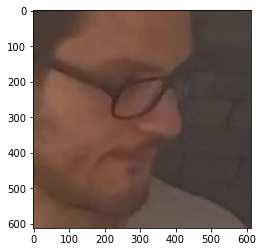

In [71]:

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm
from mtcnn.mtcnn import MTCNN    
import os
import cv2
import random
from sklearn.neighbors import KNeighborsClassifier

# this code allocates only 1GB of your GPU to tensorflow used by face detection
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
  
# this code allocates only as much GPU as it needs and expands the memory when running
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:# Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, clf, arr, thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)

        if face is None:
            return None, "No face visible"
        plt.imshow(face)
        resolution = int(len(face)/zoom)
        print("resolution of face {}".format(resolution))
        
        from skimage.transform import resize
        print(variance_of_laplacian(face))

#         face = resize(face, (160, 160, 3))
#         face = self.resize(face[:,:,0], 160, 160)
        
        tmp = "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/tmp.png"
        plt.imsave(tmp, face)
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(tmp, FaceNet)

        res = self.find_nearest([int(k) for k in arr.keys()], resolution)
        X,y = arr[res]

        res = self.find_nearest([int(k) for k in clf.keys()], resolution)
        print("nearest resolution {}".format(res))
                # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
#         dist = np.linalg.norm(tf.subtract(encoding, X))

        knn = KNeighborsClassifier(weights="distance", n_neighbors=5)
        X,y = arr[res]
        knn.fit(X,y)
        identity, dist = knn.predict(encoding)
        
        n,w = dist[0]
        dist = list(zip(n,w))
        dist_ind = [x for x, y in enumerate(dist) if y[0] ==  identity]
        
        min_dist = 1/np.array(dist)[dist_ind][:,1].astype(float).mean()
                
        ### END CODE HERE

        if min_dist < 10:
            print("Not in the database.")
        else:
            print ("it's " + str(identity) + ", the distance is " + str(min_dist))
         


        return (min_dist, dist), identity, encoding

        
#         proba = clf[res].predict_proba(encoding.reshape(1,-1)) #[0] this is needed for KNN model
        
        # this needs to be uncommented when using Knn
#         thr = 1/len(proba[0]) * 10
#         print(len(proba), thr)
        

#         ind = np.where(proba>=thr)
#         print(ind)
        
#         if ind[1] != []:
#             identity = clf[res].classes_[ind[1]]
#             min_dist = proba[ind]
#         else:
#             identity = "unkwown"
#             min_dist = None

# this pice is for knn model
#         if ind != []:
#             identity = clf[res].classes_[ind]
#             min_dist = proba[ind] 
#         else:
#             identity = "unknown"
#             min_dist = None
            
        
#         return min_dist, identity, encoding, proba, clf[res].classes_
    
    #tf.keras.backend.set_image_data_format('channels_last')
    def img_to_encoding(self, image_path, model):
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
        img = np.around(np.array(img) / 255.0, decimals=12)
        x_train = np.expand_dims(img, axis=0)
        embedding = model.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2) 
    
#     def img_to_encoding(self, img): 
#         img = np.around(np.array(img) / 255.0, decimals=12)
# #         img = img.resize((160,160), Image.NEAREST)        
#         x_train = np.expand_dims(img, axis=0)
#         embedding = self.FaceNet.predict_on_batch(x_train)
#         return embedding / np.linalg.norm(embedding, ord=2)
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
#                 print(os.path.dirname(os.path.realpath(__file__)))
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            faces = []
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])

def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()
    
def import_FaceNet(model_path='/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.json', 
                   weight_path = '/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    
def load_database(database="/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json"):
    db = json.loads(open(database).read())
    res = list(db.keys())
       
    db2 = {res[0]: {k: np.vstack(v["encodings"]) for k,v in db[res[0]].items()}}
    len_db = {res[0]: list(map(len, list(db2[res[0]].values())))}
    nest = {res[0]: list(map(rep, zip(list(db2[res[0]].keys()), len_db[res[0]])))}
    names = {res[0]: list(chain(*nest[res[0]]))}

    for r in res[1:]:
        db2.update({r: {k: np.vstack(v["encodings"]) for k,v in db[r].items()}})
        len_db.update({r: list(map(len, list(db2[r].values())))})
        nest.update({r: list(map(rep, zip(list(db2[r].keys()), len_db[r])))})
        names.update({r: list(chain(*nest[r]))})
    
    arr = {k: (np.vstack(list(v.values())), names[k]) for k,v in db2.items()}
    
    return arr

def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

import joblib    
clf = joblib.load('smart_surveillance/FaceRecognition/SGDC.json')

path2 = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/"
import re
test2 = [ i for i in os.listdir(path2) if re.match("\d+March25.*", i) ]
test2 = path2 + random.sample(test2,1)[0]

import json
import numpy as np
from itertools import chain
def rep(x):
    return [x[0]] * x[1]

FRmodel = import_FaceNet()

arr = load_database()

# arr = np.vstack(list(database.values())), list(database.keys())
pic = plt.imread(test2)
plt.imshow(pic)
min_dist, identity, encoding = FaceRecognition().who_is_it(test2, FaceNet=FRmodel, clf=clf, arr=arr)


In [61]:
min_dist

(10.347446012469064,
 [('Sandro_Bruno', 0.10409613089639072),
  ('Sandro_Bruno', 0.10409613089639072),
  ('Sandro_Bruno', 0.10409613089639072),
  ('Sandro_Bruno', 0.09109456381737947),
  ('Sandro_Bruno', 0.07982806909095437)])

In [59]:
1/np.array(min_dist[1])[min_dist[0]][:,1].astype(float).mean(), identity

(10.749674927208344, array(['Sandro_Bruno'], dtype='<U19'))

In [23]:
n,w = min_dist[0]
tuple_list = list(zip(n,w))

[x for x, y in enumerate(tuple_list) if y[0] ==  identity]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

[['Caren_Bruno' 'Caren_Bruno' 'Caren_Bruno' 'Caren_Bruno' 'Caren_Bruno'
  'Caren_Bruno' 'Caren_Bruno' 'Caren_Bruno' 'Caren_Bruno' 'Maureen_Leber'
  'Sandro_Bruno' 'Sandro_Bruno' 'Maureen_Leber' 'Silvia']]
[[2.85613294 2.38337751 1.74798738 1.47778372 1.41176477 1.3860841
  1.37239253 1.29638953 1.28598371 1.12038907 1.09166252 1.09166252
  1.03954355 1.03186636]]
[[0.11335644 0.09459335 0.06937549 0.05865144 0.05603122 0.05501199
  0.05446859 0.05145212 0.05103913 0.33064114 0.06010908 0.06010908
  0.30678259 3.47149325]]


array(['Silvia'], dtype='<U19')

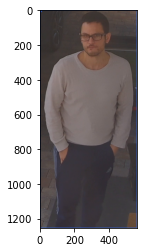

In [8]:
import numpy as np
import os
import random
FRmodel = import_FaceNet()
# p = "/mnt/golem/frodo/clusteredFaces_lower_resolution/"
# test = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/2022March24_10_37_25_Eingang752_crop_track_1.png"

path2 = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/"
import re
test2 = [ i for i in os.listdir(path2) if re.match("\d+March25.*", i) ]
test2 = path2 + random.sample(test2,1)[0]

# arr = np.vstack(list(database.values())), list(database.keys())
pic = plt.imread(test2)
plt.imshow(pic)

knn = KNeighborsClassifier(weights="distance", n_neighbors=14)
X,y = arr["64"]
knn.fit(X,y)

Sandro = img_to_encoding(p + "Sandro_Bruno/resolution_64x64/FaceNet_resolution/60036_cropped_face_64_espcn4_FaceNet_input.png", FRmodel)
Sandro = img_to_encoding(test2, FRmodel)

knn.predict(Sandro.reshape(1,-1))

In [65]:
identity

array(['Caren_cam_clean', 'Sandro_cam'], dtype='<U19')

In [66]:
min_dist

array([0.36294446, 0.2433458 ])

In [2]:
import json
import os
import numpy as np
database = "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/Database/New_CamFaceDB.json"
database = "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/super_resolution/Database/super_resolution_New_CamFaceDB.json"
db = json.loads(open(database).read())
len(db["Sandro_cam"]["encodings"])

db_new = {r: {k: np.vstack(v["encodings"]).tolist() for k,v in db.items()} for r in ["24", "32", "40", "48", "64"]}


with open("/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/super_resolution/Database/super_resolution_CamFaceDB.json", "w") as fp:
    json.dump(db_new, fp)

In [2]:
!python main.py -c conf-Sandro_cam.json -e True

[INFO] preparing pipline
2022-03-22 07:12:21.176855: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-22 07:12:21.203556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-22 07:12:21.203739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-22 07:12:21.204051: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the a

In [ ]:
    def __init__(self, file_path , output="/mnt/golem/frodo/cropped_faces/", thr=0, plot=True, 
                 model_path='../dat/models/keras-facenet-h5/model.json', 
                 weight_path = '../dat/models/keras-facenet-h5/model.h5', 
                 database="/mnt/golem/frodo/Database/FaceDB.json"):

# Getting faces from Yolo4 DeepSort recognized

In [26]:
class FaceRecognition:
    def who_is_it(self, image_path, database,
                  model_path='../dat/models/keras-facenet-h5/model.json',
                  weight_path = '../dat/models/keras-facenet-h5/model.h5',
                 thr=0.75,
                 plot=False):
        import numpy as np
        import tensorflow as tf
        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """
        import json
        import matplotlib.patches as patches
        from numpy.linalg import norm

        # import the FaceNet model
        self.import_FaceNet(model_path=model_path, weight_path=weight_path)
        
        face = self.detect_face(image_path, plot=plot)
        
        if face is None:
            return None, "No face visible"

        face = self.resize(face, 160,160)
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)

        # Find the closest encoding 
        # Initialize "min_dist" to a large value, say 100
        min_dist = 100
        
#         database = json.loads(open(database).read())
        

        # Compute L2 distance between the target "encodings" and the current db_enc from the database.
        # note we compute multiple distances for a subject and pick the distance with the minimal distance

        db, names, len_db = self.load_database()
        db = np.vstack(list(db.values()))

        from itertools import chain
        r = [[i] *r for i, r in enumerate(len_db)]
        grp = list(chain(*r))
        
        a = np.hstack((db, np.array(grp).reshape(-1,1)))
        print(a.shape)
        means = [np.median(m,axis=0) for m in np.split(a[:,:-1], np.unique(a[:, -1], return_index=True)[1][1:])]
#         print(len(means))
#         print(np.array(means).shape)
#         print(means)
        
        
        
#         db = norm(db-encoding, axis=1, ord=2)
        db = norm(means-encoding, axis=1, ord=2)
        
        

        
        ind = np.argmin(db)
        identity = names[ind]
        min_dist = db[ind]
        
        print(identity)
        # if any of the distances is higher than 0.75 we don t think the given face is represented in the database
        if min_dist > thr:
            identity = "stranger" 
            
        
        return min_dist, identity
    
    def import_FaceNet(self, model_path='../dat/models/keras-facenet-h5/model.json', 
                       weight_path = '../dat/models/keras-facenet-h5/model.h5'):

        from tensorflow.keras.models import model_from_json
        json_file = open(model_path, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        self.FaceNet = model_from_json(loaded_model_json)
        self.FaceNet.load_weights(weight_path)
    
    def img_to_encoding(self, img): 
        import numpy as np
        from PIL import Image
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def detect_face(self, image_path, plot=False):
        from mtcnn.mtcnn import MTCNN
        import numpy as np
        import matplotlib.pyplot as plt
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)

        plt.imshow(pic)
        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    #simple image scaling to (nR x nC) size
    def resize(self,im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def rep(self,x):
        return [x[0]] * x[1]

    def load_database(self, database="/mnt/golem/frodo/Database/New_FaceDB.json"):
        import numpy as np
        from itertools import chain
        import json
        db = json.loads(open(database).read())
        db = {k: np.vstack(v["encodings"]) for k,v in db.items()}
        len_db = list(map(len, list(db.values())))
        nest = list(map(self.rep, zip(list(db.keys()), len_db)))
        names = list(chain(*nest))

        return db, names, len_db
        
        

        
    


In [21]:
class FaceRecognition:
    def who_is_it(self, image_path, database,
                  model_path='../dat/models/keras-facenet-h5/model.json',
                  weight_path = '../dat/models/keras-facenet-h5/model.h5',
                 thr=0.75,
                 plot=False):
        import numpy as np
        import tensorflow as tf
        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """
        import json
        import matplotlib.patches as patches
        from numpy.linalg import norm

        # import the FaceNet model
        self.import_FaceNet(model_path=model_path, weight_path=weight_path)
        
        face = self.detect_face(image_path, plot=plot)
        
        if face is None:
            return None, "No face visible"

        face = self.resize(face, 160,160)
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)

        # Find the closest encoding 
        # Initialize "min_dist" to a large value, say 100
        min_dist = 100
        
#         database = json.loads(open(database).read())
        

        # Compute L2 distance between the target "encodings" and the current db_enc from the database.
        # note we compute multiple distances for a subject and pick the distance with the minimal distance

        db, names, len_db = self.load_database()
        db = np.vstack(list(db.values()))

        from itertools import chain
        r = [[i] *r for i, r in enumerate(len_db)]
        grp = list(chain(*r))
        
        a = np.hstack((db, np.array(grp).reshape(-1,1)))
        
        means = [np.median(m,axis=0) for m in np.split(a[:,:-1], np.unique(a[:, -1], return_index=True)[1][1:])]
#         print(len(means))
#         print(np.array(means).shape)
#         print(means)
        
        
        
#         db = norm(db-encoding, axis=1, ord=2)
        db = norm(means-encoding, axis=1, ord=2)
        
        

        
        ind = np.argmin(db)
        identity = names[ind]
        min_dist = db[ind]
        
        print(identity)
        # if any of the distances is higher than 0.75 we don t think the given face is represented in the database
        if min_dist > thr:
            identity = "stranger" 
            
        
        return min_dist, identity
    
    def import_FaceNet(self, model_path='../dat/models/keras-facenet-h5/model.json', 
                       weight_path = '../dat/models/keras-facenet-h5/model.h5'):

        from tensorflow.keras.models import model_from_json
        json_file = open(model_path, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        self.FaceNet = model_from_json(loaded_model_json)
        self.FaceNet.load_weights(weight_path)
    
    def img_to_encoding(self, img): 
        import numpy as np
        from PIL import Image
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def detect_face(self, image_path, plot=False):
        from mtcnn.mtcnn import MTCNN
        import numpy as np
        import matplotlib.pyplot as plt
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)

        plt.imshow(pic)
        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    #simple image scaling to (nR x nC) size
    def resize(self,im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def rep(self,x):
        return [x[0]] * x[1]

    def load_database(self, database="/mnt/golem/frodo/Database/New_FaceDB.json"):
        import numpy as np
        from itertools import chain
        import json
        db = json.loads(open(database).read())
        db = {k: np.vstack(v["encodings"]) for k,v in db.items()}
        len_db = list(map(len, list(db.values())))
        nest = list(map(self.rep, zip(list(db.keys()), len_db)))
        names = list(chain(*nest))

        return db, names, len_db
        
        

        
    


/mnt/golem/Photos/Sandro_externe_Festplatte/Brasilien 2013/DSCN2220.JPG
[INFO] 1 faces detected!!!
[1933, 2210, 46, 56]


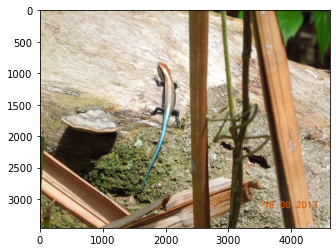

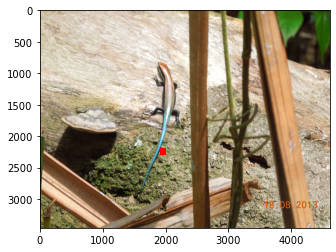

(8603, 129)
Julien


(1.055063695805394, 'stranger')

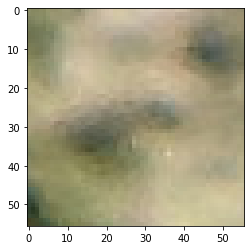

In [27]:
import os
import random
path = "/mnt/golem/Photos/Sandro_externe_Festplatte/Brasilien 2013/"
face=random.sample(os.listdir(path), 1)[0]

FACE = path + face
print(FACE)
FaceRecognition().who_is_it(FACE, database="/mnt/golem/frodo/Database/New_FaceDB.json",thr=0.7, plot=True)


In [5]:
%timeit FaceRecognition().who_is_it(FACE, database="/mnt/golem/frodo/Database/New_FaceDB.json", plot=False)

[INFO] 1 faces detected!!!
[INFO] 1 faces detected!!!
[INFO] 1 faces detected!!!
[INFO] 1 faces detected!!!
[INFO] 1 faces detected!!!
[INFO] 1 faces detected!!!
[INFO] 1 faces detected!!!
[INFO] 1 faces detected!!!
4.88 s ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/mnt/golem/Photos/Sandro_externe_Festplatte/Brasilien 2013/DSCN1864.JPG


2022-03-12 21:15:49.043432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-12 21:15:49.073626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-12 21:15:49.073780: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-12 21:15:49.074261: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

[INFO] 2 faces detected!!!
[916, 966, 286, 367]


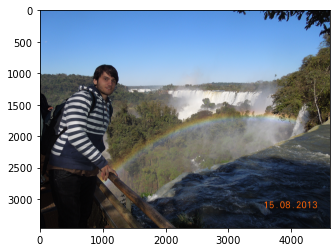

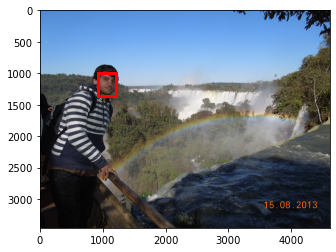

Sandro_Bruno


(0.10037660296161333, 'Sandro_Bruno')

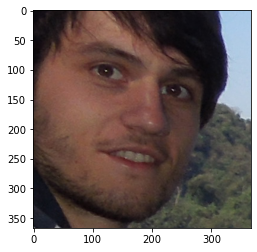

In [2]:
import os
import random
path = "/mnt/golem/Photos/Sandro_externe_Festplatte/Brasilien 2013/"
face=random.sample(os.listdir(path), 1)[0]

FACE = path + face
print(FACE)
FaceRecognition().who_is_it(FACE, database="/mnt/golem/frodo/Database/New_FaceDB.json",thr=0.7, plot=True)


## descriptive analysis of cropped images from 1day recordings
### How big are the people detected on the cameras and how big are the faces


here we try to get some face examples of the snaps to see if it might be possible to detect and recognize people on such images

In [371]:
from mtcnn.mtcnn import MTCNN
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

# here we take some random snaps and try to detect faces
def catch_faces():
    b = 0
    FACES = []


    while True:
        cam = random.sample(["Terrasse/", "Carport/", "Eingang/"], 1)[0]
        path = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/" + cam

        try:
            face=random.sample(os.listdir(path), 1)[0]
        except Exception as e:
            print(e)

        FACE = [path + face + "/" + snap for snap in os.listdir(path + face)]
        n = 30
        if len(FACE) > n:
            FACE = FACE[:n]
        for image_path in FACE:

            if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
                try:
                    image = Image.open(image_path).convert('RGBA')
                    background = Image.new('RGBA', image.size, (255,255,255))
                    alpha_composite = Image.alpha_composite(background, image)
                    alpha_composite_3 = alpha_composite.convert('RGB')

                except Exception as e:
                    print(e)


                pic = np.asarray(alpha_composite_3)
            else:
                pic = plt.imread(image_path)

            detector = MTCNN()
            faces = detector.detect_faces(pic)
            if len(faces) > 0:
                print(faces[0]["box"])
                FACES.append(image_path)
                print(b)            
                if b == 3:
                    return FACES
                    break
                b += 1

FACES += catch_faces()

    
    
    

[43, 21, 13, 16]
0
[39, 3, 12, 16]
1
[41, 20, 41, 41]
2
[40, 9, 15, 18]
3


trackID_273
/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_444/2022March11_16_49_06_Terrasse535906_crop_track_444.png


2022-03-12 08:31:34.853017: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8301


[INFO] 1 faces detected!!!
[24, 4, 17, 23]


2022-03-12 08:31:35.960196: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


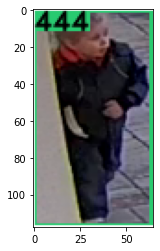

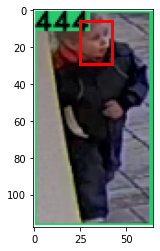

0.6214519009345938 Caren_Bruno


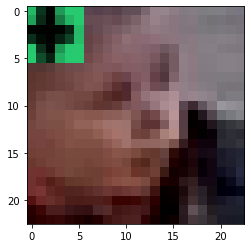

In [6]:
# check if we can use these images with our FaceRecognition algorythm
import os
import random
# cam = random.sample(["Terrasse/", "Carport/", "Eingang/"], 1)[0]
# path = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/" + cam
# face=random.sample(os.listdir(path), 1)[0]
# print(face)

# FACE = [path + face + "/" + snap for snap in os.listdir(path + face)]
# n = 30
# if len(FACE) > n:
#     FACE = FACE[:n]
# # FACE ="/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_268/2022March11_15_45_10_Terrasse497485_crop_track_268.png"
# # FACE = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_476/2022March11_17_24_23_Terrasse557104_crop_track_476.png"
# # FACE = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_489/2022March11_17_31_42_Terrasse561505_crop_track_489.png"
# # FACE = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/Carport/trackID_605/2022March11_17_27_11_Carport557920_crop_track_605.png"
# # FACE = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_323/2022March11_16_19_58_Terrasse518389_crop_track_323.png"
# FACE = '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Carport/trackID_91/2022March11_09_13_24_Carport261169_crop_track_91.png',
# FACE = '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Carport/trackID_568/2022March11_16_56_49_Carport539671_crop_track_568.png',
# FACE = '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Carport/trackID_425/2022March11_16_13_46_Carport513796_crop_track_425.png',
# FACE =  '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_268/2022March11_15_45_10_Terrasse497485_crop_track_268.png',
# FACE = '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Carport/trackID_418/2022March11_16_11_21_Carport512347_crop_track_418.png',
# FACE =  '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_444/2022March11_16_49_06_Terrasse535906_crop_track_444.png'
FACE = FACES[-1]
print(FACE)
for f in [FACE]:
    dist, ident = FaceRecognition().who_is_it(f, database="/mnt/golem/frodo/Database/New_FaceDB.json",thr=0.7, plot=True)
    print(dist, ident)

as one can see the snap has very low resolution - Howver, its just one example lets check all of the snapped faces to get the overall overview

In [122]:
from tqdm import tqdm
import os

# get all the paths to the snapped faces
path = "smart_surveillance/FaceNet_input/"

pictures = [os.path.join(root, name) 
            for root, dirs, files in tqdm(os.walk(path))
            for name in files
            if name.endswith((tuple(i for i in ".png")))]
len(pictures)


1009it [00:00, 32847.35it/s]


9697

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# check the distribution of width and height (=resolution) of the detected persons
dim = [plt.imread(pic).shape for pic in pictures]
print("There are {} snapped persons".format(len(dim)))

# get mean of width height and colourchannels
np.array(dim).mean(axis=0)

9697

Text(63.5, 0.0016, 'Median:\n127.00')

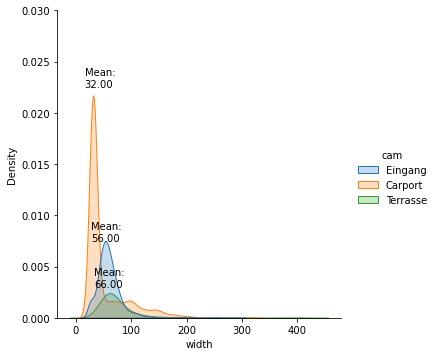

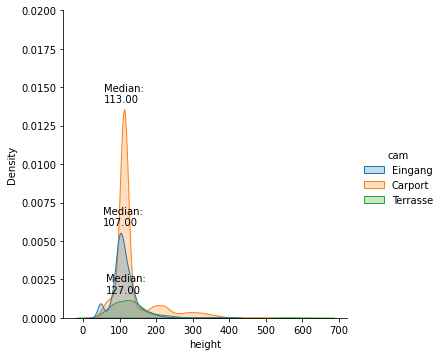

In [143]:
import seaborn as sns
import pandas as pd

# show distribution of the thre different cameras
DIM = pd.DataFrame(dim, columns=["height", "width", "colorchannels"])
DIM["cam"] = [pic.split("/")[-3] for pic in pictures ]
ylim = [0,0.03]

width = sns.displot(DIM, x="width", hue="cam", kind="kde", fill=True,  legend=True)
width.set(ylim=ylim)

medians = DIM.groupby(['cam'])['width'].median()

min_ylim, max_ylim = ylim
plt.text(medians[0]*0.5, max_ylim*0.75, 'Mean:\n{:.2f}'.format(medians[0]))
plt.text(medians[1]*0.5, max_ylim*0.25, 'Mean:\n{:.2f}'.format(medians[1]))
plt.text(medians[2]*0.5, max_ylim*0.1, 'Mean:\n{:.2f}'.format(medians[2]))


ylim = [0,0.02]

height = sns.displot(DIM, x="height", hue="cam", kind="kde", fill=True)
height.set(ylim=ylim)

medians = DIM.groupby(['cam'])['height'].median()

min_ylim, max_ylim = ylim
plt.text(medians[0]*0.5, max_ylim*0.7, 'Median:\n{:.2f}'.format(medians[0]))
plt.text(medians[1]*0.5, max_ylim*0.3, 'Median:\n{:.2f}'.format(medians[1]))
plt.text(medians[2]*0.5, max_ylim*0.08, 'Median:\n{:.2f}'.format(medians[2]))

In [115]:
# rirst we need to import and restructure the png files
from PIL import Image
pics = []
for p in tqdm(pictures):
    image = Image.open(p).convert('RGBA')
    background = Image.new('RGBA', image.size, (255,255,255))
    alpha_composite = Image.alpha_composite(background, image)
    alpha_composite_3 = alpha_composite.convert('RGB')

    pics.append(np.asarray(alpha_composite_3))



100%|█████████████████████████████████████| 9697/9697 [00:04<00:00, 2315.25it/s]


In [121]:
# then we need to detect all the faces
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
detect = [detector.detect_faces(pic) for pic in tqdm(pics)]


  2%|▉                                       | 219/9697 [00:29<25:45,  6.13it/s]


  4%|█▊                                      | 430/9697 [00:57<24:58,  6.19it/s]


  7%|██▋                                     | 648/9697 [01:27<19:30,  7.73it/s]


  9%|███▌                                    | 855/9697 [01:54<18:16,  8.07it/s]


 12%|████▌                                  | 1130/9697 [02:22<08:37, 16.54it/s]


 14%|█████▍                                 | 1364/9697 [02:51<16:38,  8.34it/s]


 16%|██████▍                                | 1590/9697 [03:19<21:18,  6.34it/s]


 19%|███████▎                               | 1810/9697 [03:49<17:06,  7.69it/s]


 21%|████████▏                              | 2023/9697 [04:17<16:57,  7.55it/s]


 23%|█████████                              | 2254/9697 [04:47<16:12,  7.65it/s]


 25%|█████████▉                             | 2462/9697 [05:14<16:36,  7.26it/s]


 27%|██████████▋                            | 2661/9697 [05:41<16:04,  7.30it/s]


 30%|███████████▌                           | 2877/9697 [06:10<17:34,  6.47it/s]


 32%|████████████▌                          | 3117/9697 [06:43<09:40, 11.33it/s]


 36%|██████████████                         | 3504/9697 [07:18<09:16, 11.12it/s]


 40%|███████████████▋                       | 3892/9697 [07:52<08:26, 11.46it/s]


 44%|█████████████████▏                     | 4279/9697 [08:27<07:58, 11.32it/s]


 48%|██████████████████▊                    | 4667/9697 [09:00<07:10, 11.69it/s]


 52%|████████████████████▏                  | 5020/9697 [09:36<10:31,  7.41it/s]


 54%|█████████████████████▏                 | 5271/9697 [10:13<08:21,  8.83it/s]


 57%|██████████████████████▏                | 5529/9697 [10:49<05:11, 13.38it/s]


 61%|███████████████████████▊               | 5917/9697 [11:22<05:23, 11.68it/s]


 65%|█████████████████████████▎             | 6305/9697 [11:54<04:35, 12.30it/s]


 69%|██████████████████████████▉            | 6691/9697 [12:27<04:06, 12.18it/s]


 73%|████████████████████████████▎          | 7044/9697 [13:00<08:52,  4.98it/s]


 75%|█████████████████████████████▏         | 7254/9697 [13:39<07:34,  5.37it/s]


 77%|█████████████████████████████▉         | 7459/9697 [14:16<05:38,  6.60it/s]


 79%|██████████████████████████████▉        | 7678/9697 [14:47<04:41,  7.17it/s]


 81%|███████████████████████████████▊       | 7902/9697 [15:26<06:31,  4.58it/s]


 84%|████████████████████████████████▋      | 8114/9697 [16:06<02:37, 10.05it/s]


 86%|█████████████████████████████████▌     | 8343/9697 [16:41<02:27,  9.18it/s]


 88%|██████████████████████████████████▍    | 8549/9697 [17:15<02:47,  6.84it/s]


 90%|███████████████████████████████████▎   | 8769/9697 [17:46<02:34,  6.01it/s]


 93%|████████████████████████████████████   | 8975/9697 [18:19<01:23,  8.68it/s]


 95%|████████████████████████████████████▉  | 9190/9697 [18:53<02:09,  3.93it/s]


 97%|█████████████████████████████████████▊ | 9391/9697 [19:26<00:54,  5.60it/s]


 99%|██████████████████████████████████████▌| 9602/9697 [19:59<00:12,  7.49it/s]


100%|███████████████████████████████████████| 9697/9697 [20:14<00:00,  7.98it/s]


In [148]:
# check number of detected faces
boxes = [dect[0]["box"] + [c] + [pic]  for dect, c, pic in zip(detect, DIM.cam.tolist(), pictures) if len(dect) > 0]
"from these {} snapped person we could detect only {} faces".format(len(pictures), len(boxes))


'from these 9697 snapped person we could detect only 644 faces'

Text(10.0, 0.002, 'Median:\n20.00')

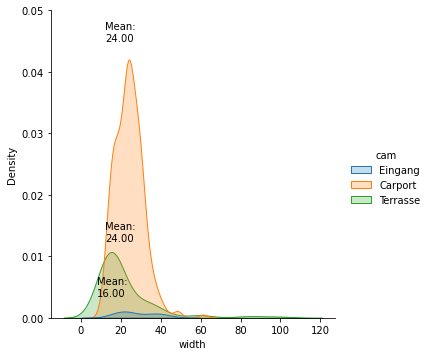

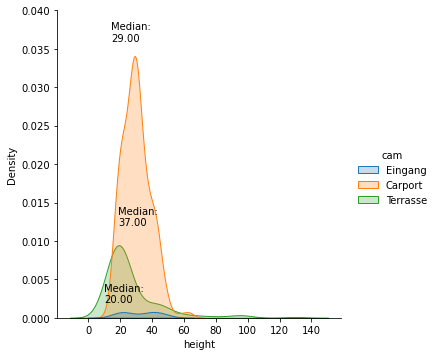

In [149]:
import seaborn as sns
import pandas as pd

faces = pd.DataFrame(boxes, columns=["x", "y", "width", "height", "cam", "image_path"])

ylim = [0,0.05]

width = sns.displot(faces, x="width", hue="cam", kind="kde", fill=True)
width.set(ylim=ylim)

medians = faces.groupby(['cam'])['width'].median()

min_ylim, max_ylim = ylim
plt.text(medians[0]*0.5, max_ylim*0.9, 'Mean:\n{:.2f}'.format(medians[0]))
plt.text(medians[1]*0.5, max_ylim*0.25, 'Mean:\n{:.2f}'.format(medians[1]))
plt.text(medians[2]*0.5, max_ylim*0.07, 'Mean:\n{:.2f}'.format(medians[2]))


ylim = [0,0.04]

height = sns.displot(faces, x="height", hue="cam", kind="kde", fill=True)
height.set(ylim=ylim)

medians = faces.groupby(['cam'])['height'].median()

min_ylim, max_ylim = ylim
plt.text(medians[0]*0.5, max_ylim*0.9, 'Median:\n{:.2f}'.format(medians[0]))
plt.text(medians[1]*0.5, max_ylim*0.3, 'Median:\n{:.2f}'.format(medians[1]))
plt.text(medians[2]*0.5, max_ylim*0.05, 'Median:\n{:.2f}'.format(medians[2]))

In [151]:
faces.to_csv("snapped_faces.csv")

In [61]:
import pandas as pd
faces = pd.read_csv("snapped_faces.csv")
faces.head()

Unnamed: 0    x   y  width  height      cam  \
0           0   12   0     19      18  Eingang   
1           1    8   0     25      20  Eingang   
2           2  116  17     38      45  Eingang   
3           3   41   1     20      22  Eingang   
4           4    0   8     24      38  Eingang   

                                          image_path  
0  smart_surveillance/FaceNet_input/Eingang/track...  
1  smart_surveillance/FaceNet_input/Eingang/track...  
2  smart_surveillance/FaceNet_input/Eingang/track...  
3  smart_surveillance/FaceNet_input/Eingang/track...  
4  smart_surveillance/FaceNet_input/Eingang/track...

In [38]:
# 24 × 24, 32 × 32, 40 × 40, 48 × 48, 64×64
faces.groupby("cam").quantile([ i/10 for i in range(11)]).loc[:,["width", "height"]]

width  height
cam                        
Carport  0.0    9.0    11.0
         0.1   15.0    19.0
         0.2   17.0    22.0
         0.3   20.0    25.0
         0.4   22.0    27.0
         0.5   24.0    29.0
         0.6   25.0    31.0
         0.7   27.0    34.0
         0.8   30.0    37.0
         0.9   32.0    42.1
         1.0   62.0    65.0
Eingang  0.0   16.0    18.0
         0.1   18.2    20.0
         0.2   20.2    21.2
         0.3   21.8    22.0
         0.4   24.0    25.6
         0.5   24.0    37.0
         0.6   29.8    38.6
         0.7   35.2    39.2
         0.8   37.6    43.2
         0.9   40.4    45.8
         1.0   44.0    48.0
Terrasse 0.0    9.0     9.0
         0.1   11.6    14.6
         0.2   13.0    17.0
         0.3   14.0    18.0
         0.4   15.0    19.0
         0.5   16.0    20.0
         0.6   18.0    22.0
         0.7   21.2    25.2
         0.8   29.8    36.8
         0.9   37.4    46.0
         1.0  103.0   130.0

In [25]:
import json
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import logging
import sys

logger = logging.getLogger()
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s | %(levelname)s | %(message)s')

stdout_handler = logging.StreamHandler(sys.stdout)
stdout_handler.setLevel(logging.DEBUG)
stdout_handler.setFormatter(formatter)

file_handler = logging.FileHandler('logs.log')
file_handler.setLevel(logging.DEBUG)
file_handler.setFormatter(formatter)


logger.addHandler(file_handler)
logger.addHandler(stdout_handler)


def super_resolution(img, model="lapsrn", zoom=8):
    import cv2
    import os
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/superresolution_models/"
    # print(os.listdir(path))
    path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

    sr.readModel(path) 
    sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
    result = sr.upsample(img) # upscale the input image
    return result

def import_FaceNet(model_path='../dat/models/keras-facenet-h5/model.json', 
                   weight_path = '../dat/models/keras-facenet-h5/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
def img_to_encoding(img, path, FaceNet = import_FaceNet()): 
    import numpy as np
    from PIL import Image
    img = np.around(np.array(img) / 255.0, decimals=12)
    img = cv2.resize(img, (160,160)) 
    plt.imsave(path, img)
    x_train = np.expand_dims(img, axis=0)
    embedding = FaceNet.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)


def downsample_database(db ="/mnt/golem/frodo/Database/New_FaceDB.json", sizes=[24, 32, 40, 48, 64],
                       d = "/mnt/golem/frodo/clusteredFaces_lower_resolution/", model="espcn", up_zoom = 4):
    db = json.loads(open(db).read())
    resized = {}
    enc = []
    faces = []
    for name in tqdm(db.keys()):
        Path(d + name).mkdir(parents=True, exist_ok=True)
        for zoom in sizes:
            pat = d + name + "/resolution_" + str(zoom) + "x" + str(zoom)
            # Check whether the specified path exists or not
            
            Path(pat).mkdir(parents=True, exist_ok=True)
            Path(pat + "/down").mkdir(parents=True, exist_ok=True)
            Path(pat + "/super_resolution").mkdir(parents=True, exist_ok=True)
            Path(pat + "/FaceNet_resolution").mkdir(parents=True, exist_ok=True)
            
            for p in db[name]["path_croped_pic"]:
                
                f = p.split("/")[-1].split(".")[0] + "_" + str(zoom) + "_" + model + str(up_zoom)
           
                if os.path.isfile(pat + "/FaceNet_resolution/" + f + "_FaceNet_input.png"):
                    print("[INFO] image exists already")
                    logger.info("[INFO] image exists already")
                    continue
                
                pic = plt.imread(p)
                dim = pic.shape
                
                
            
                if (zoom > dim[0]) | (zoom > dim[1]):
                    print("[INFO] image {} has lower resolution ({}) than {}".format(p, dim, zoom))
                    logger.info("[INFO] image {} has lower resolution ({}) than {}".format(p, dim, zoom))
                    continue 
                else:
#                     z1 = math.ceil(pic.shape[0]/zoom)
#                     z2 = math.ceil(pic.shape[1]/zoom)
                    z1 = zoom/pic.shape[0]
                    z2 = zoom/pic.shape[1]
                

#                 down = block_reduce(pic, block_size=(z1,z2,1), func=np.mean)
                try:
                    down = cv2.resize(pic, None, fx=z1, fy=z2, interpolation=cv2.INTER_AREA)

                    plt.imsave(pat + "/down/" + f +  "_" + "_downsampled.png", down)
                    
                except Exception as e:
                    
                    
                    print("[WARNING] {}".format(e))
                    logger.error(e)
                    logger.info(down[down > 1])
                    down[down > 1] = 1

#                     continue

 
                up = super_resolution(down*255, model, up_zoom)                  

                plt.imsave(pat + "/super_resolution/" + f + "_super_resolution.png", up)
                face = pat + "/FaceNet_resolution/" + f + "_FaceNet_input.png"
                    
                enc.append(img_to_encoding(up, FaceNet = import_FaceNet(), path= face).tolist())
                faces.append(face)
            

            resized[zoom] = {name: {"encodings": enc,
                                    "path": faces 
                                   }
                            }
            enc = []
            faces = []
            
           
            if os.path.isfile(d + "/low_resoloution_FaceDB.json"):
                resizED = json.loads(open(d + "/low_resoloution_FaceDB.json").read())
                resizED.update(resized)
                resized = resizED
                with open(d + "/low_resoloution_FaceDB.json", 'w') as fp:
                    json.dump(resized, fp)                
            else:
                with open(d + "/low_resoloution_FaceDB.json", 'w') as fp:
                    json.dump(resized, fp)

        
            
import os
from pathlib import Path
import math

downsample_database()


  0%|                                                    | 0/84 [00:00<?, ?it/s]

{24: {'Olga': {'encodings': [[[-0.05000539869070053, -0.03317481651902199, -0.06613253802061081, -0.1374012529850006, -0.04545580968260765, -0.010208026506006718, -0.04374435544013977, 0.14198797941207886, 0.15849843621253967, -0.07501431554555893, 0.07872776687145233, 0.08236648142337799, -0.048332639038562775, -0.011994430795311928, 0.029591187834739685, -0.008935067802667618, -0.013863774947822094, -0.20982152223587036, -0.0025753495283424854, -0.005959881469607353, -0.11902128159999847, -0.005042617209255695, -0.01723736897110939, 0.12906621396541595, 0.05554979294538498, 0.030152153223752975, 0.20107443630695343, 0.002769414335489273, -0.12336217612028122, -0.12909361720085144, -0.11056753247976303, 0.01254724245518446, -0.08716943860054016, 0.1267991065979004, -0.03884538635611534, 0.10971762984991074, -0.013283157721161842, -0.11589185893535614, 0.08146189898252487, -0.09238873422145844, -0.18178312480449677, 0.010627285577356815, -0.2353040724992752, -0.07926236093044281, -0.01

{24: {'Olga': {'encodings': [[[-0.05000539869070053, -0.03317481651902199, -0.06613253802061081, -0.1374012529850006, -0.04545580968260765, -0.010208026506006718, -0.04374435544013977, 0.14198797941207886, 0.15849843621253967, -0.07501431554555893, 0.07872776687145233, 0.08236648142337799, -0.048332639038562775, -0.011994430795311928, 0.029591187834739685, -0.008935067802667618, -0.013863774947822094, -0.20982152223587036, -0.0025753495283424854, -0.005959881469607353, -0.11902128159999847, -0.005042617209255695, -0.01723736897110939, 0.12906621396541595, 0.05554979294538498, 0.030152153223752975, 0.20107443630695343, 0.002769414335489273, -0.12336217612028122, -0.12909361720085144, -0.11056753247976303, 0.01254724245518446, -0.08716943860054016, 0.1267991065979004, -0.03884538635611534, 0.10971762984991074, -0.013283157721161842, -0.11589185893535614, 0.08146189898252487, -0.09238873422145844, -0.18178312480449677, 0.010627285577356815, -0.2353040724992752, -0.07926236093044281, -0.01

{'24': {'Olga': {'encodings': [[[-0.05000539869070053, -0.03317481651902199, -0.06613253802061081, -0.1374012529850006, -0.04545580968260765, -0.010208026506006718, -0.04374435544013977, 0.14198797941207886, 0.15849843621253967, -0.07501431554555893, 0.07872776687145233, 0.08236648142337799, -0.048332639038562775, -0.011994430795311928, 0.029591187834739685, -0.008935067802667618, -0.013863774947822094, -0.20982152223587036, -0.0025753495283424854, -0.005959881469607353, -0.11902128159999847, -0.005042617209255695, -0.01723736897110939, 0.12906621396541595, 0.05554979294538498, 0.030152153223752975, 0.20107443630695343, 0.002769414335489273, -0.12336217612028122, -0.12909361720085144, -0.11056753247976303, 0.01254724245518446, -0.08716943860054016, 0.1267991065979004, -0.03884538635611534, 0.10971762984991074, -0.013283157721161842, -0.11589185893535614, 0.08146189898252487, -0.09238873422145844, -0.18178312480449677, 0.010627285577356815, -0.2353040724992752, -0.07926236093044281, -0.

  0%|                                                    | 0/84 [06:12<?, ?it/s]


KeyboardInterrupt: 

The faces are defnetly of extremly low resolution - we need to use super resolution techniques to get bigger faces with sharper sapes and we need to remap our face database to bring the features of the faces on the same plane

## Super resolution step increase quality of images

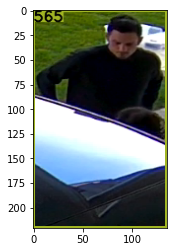

In [64]:
import cv2
import matplotlib.pyplot as plt
face = faces.image_path[22]
# Read image
pic = cv2.imread(face)
plt.imshow(pic[:,:,::-1])
plt.show()

https://learnopencv.com/super-resolution-in-opencv/

In [69]:
from skimage.measure import block_reduce

z1 = int(len(pic)/24)
z2 = int(pic.shape[1]/24)

down = block_reduce(pic, block_size=(z1,z2,1), func=np.mean)
print(down.shape)
result = super_resolution(down*255, "espcn",4)

plt.figure(figsize=(12,8))
plt.subplot(1,7,1)
# Original image
plt.imshow(pic)
plt.subplot(1,7,1)

# OpenCV upscaled
plt.imshow(down)
plt.subplot(1,7,2)

# OpenCV upscaled
plt.imshow(cv2.resize(down,dsize=(160,160)))
plt.subplot(1,7,3)

# SR upscaled
plt.imshow(result)
plt.subplot(1,7,4)

# OpenCV upscaled
plt.imshow(cv2.resize(result,dsize=(160,160)))
plt.subplot(1,7,5)



# OpenCV upscaled
plt.imshow(cv2.resize(pic, None, fx=24/len(pic), fy=24/len(pic), interpolation=cv2.INTER_AREA))
plt.subplot(1,7,6)
print(cv2.resize(pic, None, fx=24/len(pic), fy=24/len(pic), interpolation=cv2.INTER_AREA).shape)
plt.imshow(cv2.resize(cv2.resize(pic, None, fx=24/len(pic), fy=24/len(pic), interpolation=cv2.INTER_AREA),dsize=(160,160)))
plt.subplot(1,7,7)
plt.show()

(25, 28, 3)


AttributeError: module 'cv2' has no attribute 'dnn_superres'

In [67]:

def super_resolution(img, model="lapsrn", zoom=8):
    import cv2
    import os
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/superresolution_models/"
    # print(os.listdir(path))
    path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

    sr.readModel(path) 
    sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
    result = sr.upsample(img) # upscale the input image
    print(img.shape)
    print(result.shape)
    return result

zoom = 8
model = "lapsrn"

result = super_resolution(img, model=model, zoom=zoom)

# Resized image
resized = cv2.resize(img,dsize=None,fx=zoom,fy=zoom)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()

plt.imsave('/mnt/golem/frodo/resized4.png', resized[:,:,::-1])
plt.imsave('/mnt/golem/frodo/espn4.png', result[:,:,::-1])

AttributeError: module 'cv2' has no attribute 'dnn_superres'

[INFO] 1 faces detected!!!
[8, 21, 39, 37]


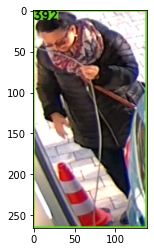

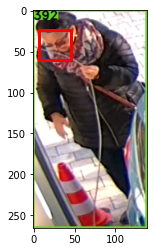

84
(84, 128)
[array([-1.96193762e-02, -5.16139979e-02,  3.89369033e-02, -2.06420138e-01,
        2.54665116e-02, -1.02679827e-01, -4.12198272e-02,  1.12898081e-01,
       -4.08443720e-02,  8.81927029e-02,  6.06586589e-03,  1.56138369e-01,
       -1.18805612e-01,  9.65854640e-02,  6.68454642e-02,  1.31516902e-01,
        2.04647050e-02, -1.34282714e-01, -1.04536629e-01, -7.75011677e-02,
       -5.37093399e-02, -4.99971557e-02, -1.53505201e-01,  6.09781606e-02,
        3.19528962e-02, -2.19966325e-02,  6.49663068e-02,  6.00494534e-02,
        1.22466474e-02,  1.09040227e-01,  4.02053580e-02,  5.23685657e-02,
        4.31512821e-03, -2.30687322e-02, -1.08596014e-01, -4.72720229e-02,
        6.68579218e-05, -8.12282166e-02, -4.97659926e-02, -8.23555809e-02,
       -1.58407742e-02, -6.21149654e-02, -9.60214296e-02, -3.99919813e-02,
        1.28249237e-02, -7.75939689e-02,  6.31426192e-03, -7.07047485e-04,
       -8.65192151e-02,  1.41464525e-01, -1.50290968e-01,  4.14125989e-02,
        4.3

(1.0274535513970517, 'stranger')

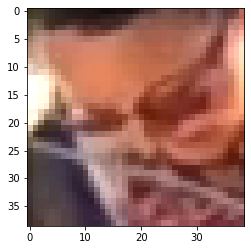

In [31]:
FaceRecognition().who_is_it(faces.image_path[204], 
                                          database="/mnt/golem/frodo/Database/New_FaceDB.json",
                                          thr=0.7, plot=True)

[INFO] 1 faces detected!!!
[613, 165, 216, 227]


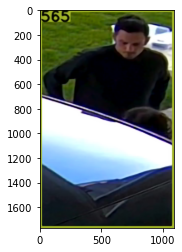

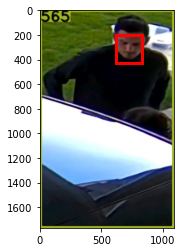

84
(84, 128)
[array([-1.96193762e-02, -5.16139979e-02,  3.89369033e-02, -2.06420138e-01,
        2.54665116e-02, -1.02679827e-01, -4.12198272e-02,  1.12898081e-01,
       -4.08443720e-02,  8.81927029e-02,  6.06586589e-03,  1.56138369e-01,
       -1.18805612e-01,  9.65854640e-02,  6.68454642e-02,  1.31516902e-01,
        2.04647050e-02, -1.34282714e-01, -1.04536629e-01, -7.75011677e-02,
       -5.37093399e-02, -4.99971557e-02, -1.53505201e-01,  6.09781606e-02,
        3.19528962e-02, -2.19966325e-02,  6.49663068e-02,  6.00494534e-02,
        1.22466474e-02,  1.09040227e-01,  4.02053580e-02,  5.23685657e-02,
        4.31512821e-03, -2.30687322e-02, -1.08596014e-01, -4.72720229e-02,
        6.68579218e-05, -8.12282166e-02, -4.97659926e-02, -8.23555809e-02,
       -1.58407742e-02, -6.21149654e-02, -9.60214296e-02, -3.99919813e-02,
        1.28249237e-02, -7.75939689e-02,  6.31426192e-03, -7.07047485e-04,
       -8.65192151e-02,  1.41464525e-01, -1.50290968e-01,  4.14125989e-02,
        4.3

(0.9959082888270873, 'stranger')

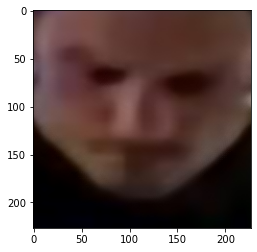

In [32]:
FaceRecognition().who_is_it('/mnt/golem/frodo/espn4.png', 
                                          database="/mnt/golem/frodo/Database/New_FaceDB.json",
                                          thr=0.7, plot=True)

[INFO] 1 faces detected!!!
[617, 155, 210, 229]


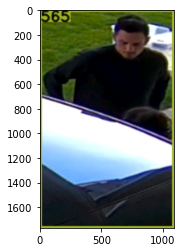

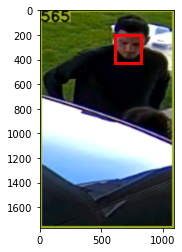

Caren_Bruno


(0.6254308664127403, 'Caren_Bruno')

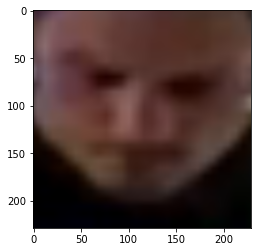

In [175]:
FaceRecognition().who_is_it('/mnt/golem/frodo/resized4.png', 
                                          database="/mnt/golem/frodo/Database/New_FaceDB.json",
                                          thr=0.7, plot=True)

In [16]:
a = {"24":{"Sandro": {"encoding": [1,2,3,4,5],
                 "path": "okdojokd"}}}

a["24"].update({"Olga": {"encoding": [1,2,3,4,5],
                 "path": "okdojokd"}})

a

{'24': {'Sandro': {'encoding': [1, 2, 3, 4, 5], 'path': 'okdojokd'},
  'Olga': {'encoding': [1, 2, 3, 4, 5], 'path': 'okdojokd'}}}

In [55]:
import os
import json
path = "/mnt/golem/frodo/clusteredFaces_lower_resolution/"
databases = [path + i for i in os.listdir(path) if ".json" in i]

db = json.loads(open(databases[0]).read())

for d in databases:
    print(d)
    db2 = json.loads(open(d).read())
    res = list(db2.keys())
    for r in res:
        print(r)
        names = list(db2[r].keys())
        for n in names:
            if (n not in db[r].keys()):
                db[r].update({n: db2[r][n] })
                
            elif (db[r][n]["encodings"]==[]):  
                db[r][n].update({n: db2[r][n] })
                

len(db), len(db["24"].keys()), len(db["32"].keys()), len(db["40"].keys()), len(db["48"].keys()), len(db["64"].keys())
    

/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB3.json
24
32
40
48
64
/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB2.json
24
/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB1.json
24
32
40
48
64
/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB_24_1.json
24
/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB_32_2.json
32
/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB_40_1.json
40
/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB_48.json
48
/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB_40_2.json
40
/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB_64.json
64
/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json
24
32
40
48
64
/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB_24.json
24


(5, 84, 84, 84, 84, 84)

In [70]:
with open("/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json", 'w') as fp:
            json.dump(db, fp) 

In [1]:
import json
db = json.loads(open("/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json").read())
len(db), len(db["24"].keys()), len(db["32"].keys()), len(db["40"].keys()), len(db["48"].keys()), len(db["64"].keys())


(5, 84, 84, 84, 84, 84)

In [75]:
# import numpy as np

# {k: np.vstack(v["encodings"]) for k,v in db["24"].items()}

In [33]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, clf, thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)

        if face is None:
            return None, "No face visible"
        plt.imshow(face)
        resolution = int(len(face)/zoom)
        print("resolution of face {}".format(resolution))
        
        from skimage.transform import resize

        face = resize(face, (160, 160, 3))
#         face = self.resize(face[:,:,0], 160, 160)
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)

        # Find the closest encoding 
        # Initialize "min_dist" to a large value, say 100
#         min_dist = 100
        
#         database = json.loads(open(database).read())
        

        # Compute L2 distance between the target "encodings" and the current db_enc from the database.
        # note we compute multiple distances for a subject and pick the distance with the minimal distance
        
        
#         arr = database
#         res = self.find_nearest([int(k) for k in arr.keys()], resolution)
#         X,y = arr[res]

        res = self.find_nearest([int(k) for k in clf.keys()], resolution)
        print("nearest resolution {}".format(res))
        proba = clf[res].predict_proba(encoding.reshape(1,-1))[0]

        ind = np.where(proba>=thr) 

        if ind != []:
            identity = clf[res].classes_[ind]
            min_dist = proba[ind] 
        else:
            identiy = "unknwon"
            min_dist = None
            
        
        return min_dist, identity
    
 
    
    def img_to_encoding(self, img): 
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])


In [34]:
def import_FaceNet(model_path='../dat/models/keras-facenet-h5/model.json', 
                   weight_path = '../dat/models/keras-facenet-h5/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    




In [39]:
import joblib    
clf = joblib.load('smart_surveillance/FaceRecognition/KNN.json')
fn = import_FaceNet()
import random
import os
import matplotlib.pyplot
path = "smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_16/"# "smart_surveillance/FaceNet_input/Video/trackID_11/"
files= os.listdir(path)

file = path + random.sample(files,1)[0]
FaceRecognition().who_is_it(image_path=file, 
                            thr=0.55, plot=False, FaceNet=fn, clf=clf,
                 res_model="espcn", zoom=4)



(None, 'No face visible')

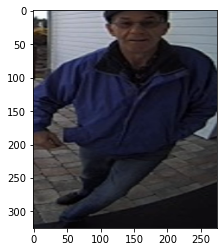

In [261]:
img=plt.imread(file)
plt.imshow(img)

In [2]:
import json
import numpy as np
from itertools import chain
def rep(x):
    return [x[0]] * x[1]

def load_database(database="/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json"):

    db = json.loads(open(database).read())
    res = list(db.keys())
    
    db2 = {res[0]: {k: np.vstack(v["encodings"]) for k,v in db[res[0]].items()}}
    len_db = {res[0]: list(map(len, list(db2[res[0]].values())))}
    nest = {res[0]: list(map(rep, zip(list(db2[res[0]].keys()), len_db[res[0]])))}
    names = {res[0]: list(chain(*nest[res[0]]))}

    for r in res[1:]:
        db2.update({r: {k: np.vstack(v["encodings"]) for k,v in db[r].items()}})
        len_db.update({r: list(map(len, list(db2[r].values())))})
        nest.update({r: list(map(rep, zip(list(db2[r].keys()), len_db[r])))})
        names.update({r: list(chain(*nest[r]))})
    
    arr = {k: (np.vstack(list(v.values())), names[k]) for k,v in db2.items()}
    
    return arr

arr = load_database()


In [ ]:
import json
import os
import numpy as np
database = "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/Database/New_CamFaceDB.json"
db = json.loads(open(database).read())
len(db["Sandro_cam"]["encodings"])

db_new = {r: {k: np.vstack(v["encodings"]).tolist() for k,v in db.items()} for r in ["24", "32", "40", "48", "64"]}


with open("/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/Database/resolution_CamFaceDB.json", "w") as fp:
    json.dump(db_new, fp)

In [84]:
rest_arr[24].values()

dict_values([array([[-0.0425283 , -0.05187161, -0.15764984, ..., -0.08742823,
         0.16398324, -0.02692827],
       [-0.12533545, -0.12309477, -0.09862891, ..., -0.12251017,
         0.10896494,  0.00290331],
       [-0.15892215, -0.07472565, -0.20605721, ..., -0.02764114,
         0.12551808, -0.03906981],
       ...,
       [-0.06958225, -0.06460545, -0.06775734, ..., -0.10836214,
         0.09555047,  0.06152384],
       [-0.08728978, -0.02112243, -0.0175917 , ..., -0.05823572,
         0.04219401,  0.02167004],
       [-0.07173391, -0.05196548, -0.06318931, ..., -0.10599665,
         0.0782801 ,  0.00406371]]), array([[-0.05245175, -0.15084191, -0.13372783, ..., -0.17730026,
         0.08570823, -0.0539759 ],
       [-0.08186565, -0.05112458, -0.03051906, ..., -0.12573546,
         0.05448154,  0.04290327],
       [-0.0590468 , -0.09599467, -0.14058609, ..., -0.25649792,
         0.10280602,  0.01199983],
       ...,
       [-0.02913118, -0.10788176, -0.0501423 , ..., -0.096711

In [118]:
rest_arr = {r: {k: (np.vstack(v), [k]*len(v)) for k,v in db[str(r)].items()} for r in [24,32,40,48,64]}
list(rest_arr[24].values())[1][0]

In [71]:
db = json.loads(open("/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/super_resolution/Database/super_resolution_CamFaceDB.json").read())
arr_cam = {}
combine=True
test=len(arr["24"][0])
rest_arr = {r: {k: (np.vstack(v), [k]*len(v)) for k,v in db[str(r)].items()} for r in [24,32,40,48,64]}
arr_cam = list(rest_arr[24].values())


for i in range(len(arr_cam)):
    x = arr_cam[i][0].reshape(-1,128)
    y = arr_cam[i][1]
    for k in ["24","32","40","48","64"]:
        if combine:
            arr[k] = (np.vstack((arr[k][0], x)),  arr[k][1] + y)

"added {} encodings".format(len(arr["24"][0])-test)

'added 209 encodings'

In [4]:
from collections import Counter
Counter(arr["24"][1])

Counter({'Olga': 40,
         'Mary': 12,
         'Katharina_II_Murg': 23,
         'Julien': 35,
         'Bastian': 41,
         'Sabrina': 25,
         'Franka': 18,
         'Martin': 27,
         'Josi': 43,
         'Melanie': 20,
         'Erik': 17,
         'Claudia': 23,
         'Leonie': 23,
         'Yannick_Reith': 34,
         'Frau_Möske': 13,
         'Massimo': 20,
         'Silvia': 30,
         'Thomas_Tröndlin': 16,
         'Marion': 24,
         'Giusppe_Rotolo': 19,
         'Yannick_Haas': 30,
         'Katharina_I_Murg': 12,
         'Emöke': 36,
         'Herr_Möske': 11,
         'Melanie_Leber': 62,
         'Georg': 24,
         'Thomas_Stiebelehner': 44,
         'Josi_Dulemont': 24,
         'Tanja_Haas': 39,
         'Anna_Klockhof': 26,
         'Prathip': 29,
         'Daniela': 17,
         'Caren_Bruno': 1841,
         'Noeli_Müller': 20,
         'Hubert_Leber': 172,
         'Stefan_Leber': 251,
         'Jessica': 49,
         'Esther_Olifant': 

In [5]:
X,y = arr["64"]
# svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)
# print('Number of documents = {}  |  Number of features = {}'.format(X_train.shape[0], X_train.shape[1]))
# st_time = time.time()
# predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train, X_test, y_train, y_test, labels)
# en_time = time.time()
# print('Total time: {:.2f}s'.format(en_time-st_time))
# print('accuracy: {}'.format(accuracy))
# print('='*100)
# print(metrics_report)
# plot_confusion_matrix(svm, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = [{'name': 'logreg','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=88),
           'grid': {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}},
          
          {'name': 'knn','label':'K Nearest Neighbors',
           'classifier':KNeighborsClassifier(),
           'grid': {"n_neighbors":np.arange(8)+1}},
          
          {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=88),
           'grid': {"max_depth":np.arange(8)+1}},
          
          {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=88),
           'grid': {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}},
          
          {'name': 'svm_rbf', 'label': 'SVC (RBF)',
           'classifier':SVC(random_state=88),
           'grid': {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}}]
clf = GridSearchCV(models[4]["classifier"],models[4]["grid"] )
clf.fit(X,y)

/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(estimator=SVC(random_state=88),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']})

In [17]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_gamma',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [20]:
clf.cv_results_["split4_test_score"]

array([0.51091445, 0.30029499, 0.74513274, 0.51091445, 0.97935103,
       0.74513274, 0.98938053, 0.97935103])

<BarContainer object of 12 artists>

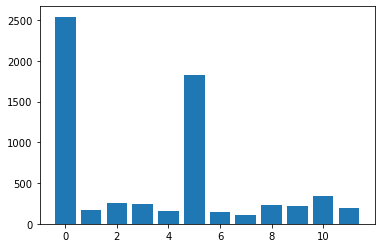

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
# dict(sorted(Counter(y).items(), key=lambda item: item[1]))

keep = [k for k,v in Counter(y).items() if v > 100]

ind = [True if k in keep else False for k in y]

y_new = np.array(y)[ind].tolist()
X_new = X[ind]
Counter(y_new)
plt.bar(x=list(range(len(list(Counter(y_new).values())))), height=list(Counter(y_new).values()))

In [72]:
from sklearn.utils import class_weight
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X,y = arr["24"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_new), y_new)
# class_weights = {k:w for k,w in zip(np.unique(y_new), class_weights)}
clf = SGDClassifier(max_iter=1000, alpha=0.01, class_weight = "balanced", loss='modified_huber' ) # class_weights)
clf.fit(X_train, y_train)
# clf.partial_fit(X_test, y_test, np.unique(y))

classification_report(y_test,clf.predict(X_test))


In [151]:
Counter(y)

Counter({'Olga': 40,
         'Mary': 12,
         'Katharina_II_Murg': 23,
         'Julien': 35,
         'Bastian': 41,
         'Sabrina': 25,
         'Franka': 18,
         'Martin': 27,
         'Josi': 43,
         'Melanie': 20,
         'Erik': 17,
         'Claudia': 23,
         'Leonie': 23,
         'Yannick_Reith': 34,
         'Frau_Möske': 13,
         'Massimo': 20,
         'Silvia': 30,
         'Thomas_Tröndlin': 16,
         'Marion': 24,
         'Giusppe_Rotolo': 19,
         'Yannick_Haas': 30,
         'Katharina_I_Murg': 12,
         'Emöke': 36,
         'Herr_Möske': 11,
         'Melanie_Leber': 62,
         'Georg': 24,
         'Thomas_Stiebelehner': 44,
         'Josi_Dulemont': 24,
         'Tanja_Haas': 39,
         'Anna_Klockhof': 26,
         'Prathip': 29,
         'Daniela': 17,
         'Caren_Bruno': 1841,
         'Noeli_Müller': 20,
         'Hubert_Leber': 172,
         'Stefan_Leber': 251,
         'Jessica': 49,
         'Esther_Olifant': 

In [5]:
from sklearn.utils import class_weight
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X,y = arr["32"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_new), y_new)
# class_weights = {k:w for k,w in zip(np.unique(y_new), class_weights)}
clf = SGDClassifier(max_iter=1000, alpha=0.01, class_weight = "balanced", loss='modified_huber' ) # class_weights)
clf.fit(X_train, y_train)
# clf.partial_fit(X_test, y_test, np.unique(y))

classification_report(y_test,clf.predict(X_test))


In [71]:
from sklearn.utils import class_weight
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X,y = arr["40"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_new), y_new)
# class_weights = {k:w for k,w in zip(np.unique(y_new), class_weights)}
clf = SGDClassifier(max_iter=1000, alpha=0.01, class_weight = "balanced", loss='modified_huber' ) # class_weights)
clf.fit(X_train, y_train)
# clf.partial_fit(X_test, y_test, np.unique(y))

classification_report(y_test,clf.predict(X_test))


'                     precision    recall  f1-score   support\n\n              Angie       0.94      0.94      0.94        32\n      Anja_Odermatt       0.88      1.00      0.93         7\n      Anna_Klockhof       0.71      1.00      0.83         5\n            Bastian       0.67      1.00      0.80         6\n      Benjamin_Haas       1.00      1.00      1.00        10\n        Caren_Bruno       1.00      0.97      0.99       636\n          Christina       1.00      1.00      1.00        10\n            Claudia       1.00      1.00      1.00         7\n   Climeline_Müller       0.73      1.00      0.84         8\n            Daniela       1.00      1.00      1.00         3\n     David_Bürchner       1.00      1.00      1.00        13\nEdeltraut_Schneider       1.00      1.00      1.00         7\n       Elvira_Bruno       1.00      0.94      0.97        70\n              Emöke       0.67      0.67      0.67         6\n               Erik       1.00      1.00      1.00         4\n     

In [72]:
from sklearn.utils import class_weight
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X,y = arr["48"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_new), y_new)
# class_weights = {k:w for k,w in zip(np.unique(y_new), class_weights)}
clf = SGDClassifier(max_iter=1000, alpha=0.01, class_weight = "balanced", loss='modified_huber' ) # class_weights)
clf.fit(X_train, y_train)
# clf.partial_fit(X_test, y_test, np.unique(y))

classification_report(y_test,clf.predict(X_test))


'                     precision    recall  f1-score   support\n\n              Angie       1.00      1.00      1.00        44\n      Anja_Odermatt       1.00      1.00      1.00        11\n      Anna_Klockhof       1.00      1.00      1.00         5\n            Bastian       1.00      1.00      1.00         6\n      Benjamin_Haas       1.00      1.00      1.00         9\n        Caren_Bruno       1.00      0.98      0.99       644\n          Christina       1.00      1.00      1.00        16\n            Claudia       1.00      1.00      1.00         7\n   Climeline_Müller       0.92      1.00      0.96        12\n            Daniela       1.00      1.00      1.00         3\n     David_Bürchner       1.00      1.00      1.00        13\nEdeltraut_Schneider       1.00      1.00      1.00        10\n       Elvira_Bruno       1.00      0.97      0.98        64\n              Emöke       0.80      0.67      0.73         6\n               Erik       1.00      1.00      1.00         4\n     

In [3]:
from sklearn.utils import class_weight
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X,y = arr["64"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_new), y_new)
# class_weights = {k:w for k,w in zip(np.unique(y_new), class_weights)}
clf = SGDClassifier(max_iter=1000, alpha=0.01, class_weight = "balanced", loss='modified_huber' ) # class_weights)
clf.fit(X_train, y_train)
# clf.partial_fit(X_test, y_test, np.unique(y))

classification_report(y_test,clf.predict(X_test))


In [4]:
clf = {}
for r in arr.keys():    
    X, y = arr[r]
#     import random

    SGDC = SGDClassifier(max_iter=1000, alpha=0.01, class_weight = "balanced", loss='modified_huber' )
    clf[r] = SGDC.fit(X,y)

# from sklearn.external import joblib
# import joblib
# joblib.dump(clf, 'smart_surveillance/FaceRecognition/SGDC.json')


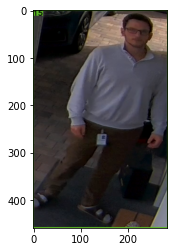

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_15/2022March21_14_23_18_Eingang14955_crop_track_15.png"

image = Image.open(image_path).convert('RGBA')
background = Image.new('RGBA', image.size, (255,255,255))
alpha_composite = Image.alpha_composite(background, image)
alpha_composite_3 = alpha_composite.convert('RGB')

pic = np.asarray(alpha_composite_3)

plt.imshow(pic)



In [73]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm
from mtcnn.mtcnn import MTCNN    
import os

# this code allocates only 1GB of your GPU to tensorflow used by face detection
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
  
# this code allocates only as much GPU as it needs and expands the memory when running
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:# Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, clf, thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)

        if face is None:
            return None, "No face visible"
        plt.imshow(face)
        resolution = int(len(face)/zoom)
        print("resolution of face {}".format(resolution))
        
        from skimage.transform import resize

        face = resize(face, (160, 160, 3))
#         face = self.resize(face[:,:,0], 160, 160)
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)

        # Find the closest encoding 
        # Initialize "min_dist" to a large value, say 100
#         min_dist = 100
        
#         database = json.loads(open(database).read())
        

        # Compute L2 distance between the target "encodings" and the current db_enc from the database.
        # note we compute multiple distances for a subject and pick the distance with the minimal distance
        
        
#         arr = database
#         res = self.find_nearest([int(k) for k in arr.keys()], resolution)
#         X,y = arr[res]

        res = self.find_nearest([int(k) for k in clf.keys()], resolution)
        print("nearest resolution {}".format(res))
#         res="24"

        proba = clf[res].predict_proba(encoding.reshape(1,-1)) #[0] this is needed for KNN model
        
        # this needs to be uncommented when using Knn
        thr = 1/proba.shape[1] * 10
        

        ind = np.where(proba>=thr)
                
#         print(encoding.shape)
#         db = norm(X-encoding.reshape(1,-1), axis=1, ord=2)
        
#         ind = np.argmin(db)
#         identity = y[ind]
#         min_dist = db[ind]
        
#         # if any of the distances is higher than 0.75 we don t think the given face is represented in the database
#         if min_dist > thr:
#             identity = "stranger" 
        
        if ind[1] != []:
            ix = np.argmax(proba[0,:])
            identity = clf[res].classes_[ix]
            min_dist = proba[0,ix]
        else:
            identity = "unkwown"
            min_dist = None

# this pice is for knn model
#         if ind != []:
#             identity = clf[res].classes_[ind]
#             min_dist = proba[ind] 
#         else:
#             identity = "unknown"
#             min_dist = None

        return min_dist, identity, encoding, proba, clf[res].classes_, ind
    
 
    
    def img_to_encoding(self, img): 
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
#                 print(os.path.dirname(os.path.realpath(__file__)))
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            faces = []
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])

    
def import_FaceNet(model_path='/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.json', 
                   weight_path = '/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    




2022-03-24 21:38:37.593758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 21:38:37.620948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 21:38:37.621109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 21:38:37.621615: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

[INFO] 1 faces detected!!!
[763, 82, 195, 231]
resolution of face 57
nearest resolution 64


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/ipykernel_launcher.py:127: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


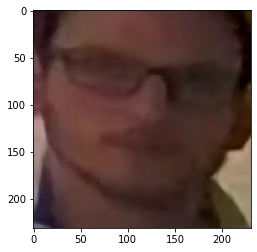

In [6]:
fn = import_FaceNet()
dist, indent, encod, proba, names, ind =FaceRecognition().who_is_it("/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_15/2022March21_14_23_18_Eingang14955_crop_track_15.png",
                            fn, clf=clf)

In [16]:
indent


'Caren_cam_clean'

In [24]:
sorted(dict(zip(names.tolist(), proba.reshape(-1,1).tolist())).items(), key=lambda x: x[1])


[('Angie', [0.0]),
 ('Anna_Klockhof', [0.0]),
 ('Bastian', [0.0]),
 ('Benjamin_Haas', [0.0]),
 ('Caren_Bruno', [0.0]),
 ('Christina', [0.0]),
 ('Climeline_Müller', [0.0]),
 ('Daniela', [0.0]),
 ('David_Bürchner', [0.0]),
 ('Edeltraut_Schneider', [0.0]),
 ('Elvira_Bruno', [0.0]),
 ('Emöke', [0.0]),
 ('Erik', [0.0]),
 ('Esther_Olifant', [0.0]),
 ('Francesca_Möske', [0.0]),
 ('Franka', [0.0]),
 ('Frau_Möske', [0.0]),
 ('Georg', [0.0]),
 ('Giusppe_Rotolo', [0.0]),
 ('Hainer_Schneider', [0.0]),
 ('Herr_Möske', [0.0]),
 ('Hubert_Leber', [0.0]),
 ('Isabelle_Odermatt', [0.0]),
 ('Janine_Möske', [0.0]),
 ('Jaqueline_Odermatt', [0.0]),
 ('Jessica', [0.0]),
 ('Jochen_Weber', [0.0]),
 ('Joe_Danz', [0.0]),
 ('Josi', [0.0]),
 ('Josi_Dulemont', [0.0]),
 ('Jürgen_Schäck', [0.0]),
 ('Katharina_II_Murg', [0.0]),
 ('Katharina_I_Murg', [0.0]),
 ('Katja_Schäck', [0.0]),
 ('Kerstin', [0.0]),
 ('Ladina_Odermatt', [0.0]),
 ('Leonie', [0.0]),
 ('Marion', [0.0]),
 ('Markus_Odermatt', [0.0]),
 ('Martin', [0.0]),

[INFO] 2 faces detected!!!
[615, 194, 337, 366]
resolution of face 91
nearest resolution 64


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/ipykernel_launcher.py:127: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


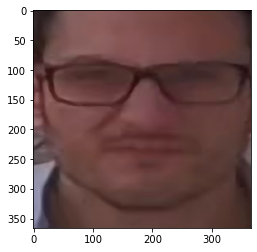

In [25]:
fn = import_FaceNet()
dist, ident, encoding, proba, names, ind = FaceRecognition().who_is_it("/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/2022March21_13_59_33_Eingang683_crop_track_1.png",
                            fn, clf=clf)

In [26]:
sorted(dict(zip(names.tolist(), proba.reshape(-1,1).tolist())).items(), key=lambda x: x[1])


[('Angie', [0.0]),
 ('Anna_Klockhof', [0.0]),
 ('Bastian', [0.0]),
 ('Benjamin_Haas', [0.0]),
 ('Caren_Bruno', [0.0]),
 ('Christina', [0.0]),
 ('Climeline_Müller', [0.0]),
 ('Daniela', [0.0]),
 ('David_Bürchner', [0.0]),
 ('Edeltraut_Schneider', [0.0]),
 ('Elvira_Bruno', [0.0]),
 ('Emöke', [0.0]),
 ('Erik', [0.0]),
 ('Esther_Olifant', [0.0]),
 ('Francesca_Möske', [0.0]),
 ('Franka', [0.0]),
 ('Frau_Möske', [0.0]),
 ('Georg', [0.0]),
 ('Giusppe_Rotolo', [0.0]),
 ('Hainer_Schneider', [0.0]),
 ('Herr_Möske', [0.0]),
 ('Hubert_Leber', [0.0]),
 ('Isabelle_Odermatt', [0.0]),
 ('Janine_Möske', [0.0]),
 ('Jaqueline_Odermatt', [0.0]),
 ('Jessica', [0.0]),
 ('Jochen_Weber', [0.0]),
 ('Josi', [0.0]),
 ('Josi_Dulemont', [0.0]),
 ('Jürgen_Schäck', [0.0]),
 ('Katharina_II_Murg', [0.0]),
 ('Katharina_I_Murg', [0.0]),
 ('Katja_Schäck', [0.0]),
 ('Kerstin', [0.0]),
 ('Ladina_Odermatt', [0.0]),
 ('Leonie', [0.0]),
 ('Marion', [0.0]),
 ('Markus_Odermatt', [0.0]),
 ('Martin', [0.0]),
 ('Mary', [0.0]),
 ('

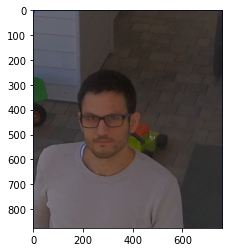

In [74]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/2022March24_10_37_25_Eingang752_crop_track_1.png"

image = Image.open(image_path).convert('RGBA')
background = Image.new('RGBA', image.size, (255,255,255))
alpha_composite = Image.alpha_composite(background, image)
alpha_composite_3 = alpha_composite.convert('RGB')

pic = np.asarray(alpha_composite_3)

plt.imshow(pic)

[INFO] 1 faces detected!!!
[747, 1330, 770, 1004]
resolution of face 251
nearest resolution 64


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/ipykernel_launcher.py:127: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


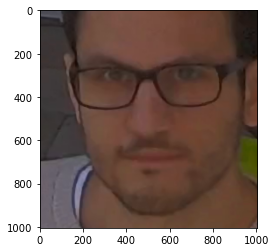

In [8]:
fn = import_FaceNet()
dist, ident, encoding, proba, names, ind = FaceRecognition().who_is_it("/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/2022March24_10_37_25_Eingang752_crop_track_1.png",
                            fn, clf=clf)

In [9]:
sorted({k:v for k,v in zip(names, proba[0,:])}.items(), key=lambda x: x[1])


[('Angie', 0.0),
 ('Anna_Klockhof', 0.0),
 ('Bastian', 0.0),
 ('Caren_Bruno', 0.0),
 ('Christina', 0.0),
 ('Claudia', 0.0),
 ('Climeline_Müller', 0.0),
 ('Daniela', 0.0),
 ('David_Bürchner', 0.0),
 ('Edeltraut_Schneider', 0.0),
 ('Elvira_Bruno', 0.0),
 ('Emöke', 0.0),
 ('Erik', 0.0),
 ('Esther_Olifant', 0.0),
 ('Francesca_Möske', 0.0),
 ('Franka', 0.0),
 ('Frau_Möske', 0.0),
 ('Georg', 0.0),
 ('Giusppe_Rotolo', 0.0),
 ('Hainer_Schneider', 0.0),
 ('Herr_Möske', 0.0),
 ('Holger', 0.0),
 ('Hubert_Leber', 0.0),
 ('Isabelle_Odermatt', 0.0),
 ('Janine_Möske', 0.0),
 ('Jaqueline_Odermatt', 0.0),
 ('Jessica', 0.0),
 ('Jochen_Weber', 0.0),
 ('Josi', 0.0),
 ('Josi_Dulemont', 0.0),
 ('Jürgen_Schäck', 0.0),
 ('Katharina_II_Murg', 0.0),
 ('Katharina_I_Murg', 0.0),
 ('Katja_Schäck', 0.0),
 ('Kerstin', 0.0),
 ('Ladina_Odermatt', 0.0),
 ('Leonie', 0.0),
 ('Marion', 0.0),
 ('Markus_Odermatt', 0.0),
 ('Martin', 0.0),
 ('Mary', 0.0),
 ('Massimo', 0.0),
 ('Maureen_Leber', 0.0),
 ('Melanie', 0.0),
 ('Melan

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm
from mtcnn.mtcnn import MTCNN    
import os

# this code allocates only 1GB of your GPU to tensorflow used by face detection
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
  
# this code allocates only as much GPU as it needs and expands the memory when running
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:# Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, arr, thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)

        if face is None:
            return None, "No face visible"
        plt.imshow(face)
        resolution = int(len(face)/zoom)
        print("resolution of face {}".format(resolution))
        
        from skimage.transform import resize

        face = resize(face, (160, 160, 3))
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)
    

        # Find the closest encoding 
        res = self.find_nearest([int(k) for k in arr.keys()], resolution)
        print("nearest resolution {}".format(res))
      
            # Initialize "min_dist" to a large value, say 100 (≈1 line)

        # Loop over the database dictionary's names and encodings.
#         for (db_enc, name) in arr[res]:
        X,y = arr[res]
        print(X.shape)
        print(encoding.shape)

        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
#         dist = np.linalg.norm(tf.subtract(encoding, X))
        dist = np.apply_along_axis(np.linalg.norm, 1, (X-encoding))
        print(dist.shape)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
#         if dist < min_dist:

        min_ind = np.argmin(dist)
        min_dist = dist[min_ind]
        identity = y[min_ind]
        encoding = X[min_ind,:]
                
        ### END CODE HERE

        if min_dist > thr:
            print("Not in the database.")
        else:
            print ("it's " + str(identity) + ", the distance is " + str(min_dist))
         


        return min_dist, identity, encoding, dist, y

 
    
    def img_to_encoding(self, img): 
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
#                 print(os.path.dirname(os.path.realpath(__file__)))
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            faces = []
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])

    
def import_FaceNet(model_path='/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.json', 
                   weight_path = '/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    




[INFO] 1 faces detected!!!
[747, 1330, 770, 1004]
resolution of face 251
nearest resolution 64
(8687, 128)
(1, 128)
(8687,)
it's Caren_Bruno, the distance is 0.19820267799998015


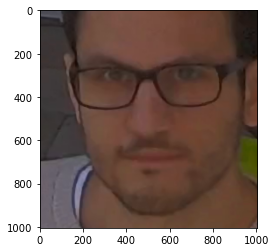

In [11]:
fn = import_FaceNet()
min_dist, ident, encoding, dist, y = FaceRecognition().who_is_it("/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/2022March24_10_37_25_Eingang752_crop_track_1.png",
                            fn, arr=arr)

In [12]:
n = 50
np.argsort(dist)[:n], np.array(y)[np.argsort(dist)][:n]


(array([ 845, 8535, 8517, 8502,  840, 8538, 8501, 8506, 8537, 8523, 8524,
        8557, 8553, 8536, 8622, 8488, 8490, 8482, 8489, 8505, 8525, 8644,
        8503, 8681, 8526, 8504, 8534, 8568, 8567, 8500, 8682, 8519, 8627,
        8516, 8569, 8645, 8518, 8641, 8643, 8683, 8684, 8640, 8483, 8527,
        8624, 8626, 8607, 8484, 8623, 8625]),
 array(['Caren_Bruno', 'Caren_cam_clean', 'Caren_cam_clean',
        'Caren_cam_clean', 'Caren_Bruno', 'Caren_cam_clean',
        'Caren_cam_clean', 'Caren_cam_clean', 'Caren_cam_clean',
        'Caren_cam_clean', 'Caren_cam_clean', 'Sandro_cam', 'Sandro_cam',
        'Caren_cam_clean', 'Sandro_cam', 'Caren_cam_clean',
        'Caren_cam_clean', 'Caren_cam_clean', 'Caren_cam_clean',
        'Caren_cam_clean', 'Caren_cam_clean', 'Sandro_cam',
        'Caren_cam_clean', 'Sandro_cam', 'Caren_cam_clean',
        'Caren_cam_clean', 'Caren_cam_clean', 'Sandro_cam', 'Sandro_cam',
        'Caren_cam_clean', 'Sandro_cam', 'Caren_cam_clean', 'Sandro_cam',
    

In [13]:
np.array(y)[np.argsort(dist)][:n]

array(['Caren_Bruno', 'Caren_cam_clean', 'Caren_cam_clean',
       'Caren_cam_clean', 'Caren_Bruno', 'Caren_cam_clean',
       'Caren_cam_clean', 'Caren_cam_clean', 'Caren_cam_clean',
       'Caren_cam_clean', 'Caren_cam_clean', 'Sandro_cam', 'Sandro_cam',
       'Caren_cam_clean', 'Sandro_cam', 'Caren_cam_clean',
       'Caren_cam_clean', 'Caren_cam_clean', 'Caren_cam_clean',
       'Caren_cam_clean', 'Caren_cam_clean', 'Sandro_cam',
       'Caren_cam_clean', 'Sandro_cam', 'Caren_cam_clean',
       'Caren_cam_clean', 'Caren_cam_clean', 'Sandro_cam', 'Sandro_cam',
       'Caren_cam_clean', 'Sandro_cam', 'Caren_cam_clean', 'Sandro_cam',
       'Caren_cam_clean', 'Sandro_cam', 'Sandro_cam', 'Caren_cam_clean',
       'Sandro_cam', 'Sandro_cam', 'Sandro_cam', 'Sandro_cam',
       'Sandro_cam', 'Caren_cam_clean', 'Caren_cam_clean', 'Sandro_cam',
       'Sandro_cam', 'Sandro_cam', 'Caren_cam_clean', 'Sandro_cam',
       'Sandro_cam'], dtype='<U19')

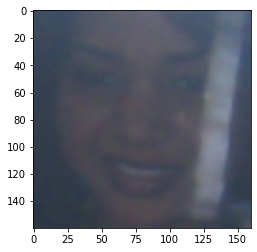

In [14]:
from collections import Counter
db = json.loads(open("/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json").read())
ind = ((np.vstack(db["64"]["Caren_Bruno"]["encodings"])-encoding).sum(axis=1) < 0.001) & ((np.vstack(db["64"]["Caren_Bruno"]["encodings"])-encoding).sum(axis=1)>-0.001)
p = plt.imread(np.array(db["64"]["Caren_Bruno"]["path"])[ind][0])
plt.imshow(p)

In [15]:
np.array(db["64"]["Caren_Bruno"]["path"])[ind][1]

IndexError: index 1 is out of bounds for axis 0 with size 1

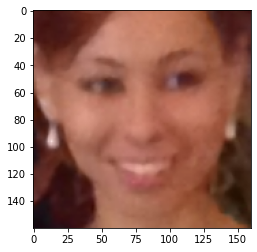

In [16]:
from collections import Counter
db = json.loads(open("/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json").read())
ind = ((np.vstack(db["64"]["Caren_Bruno"]["encodings"])-encoding).sum(axis=1) < 0.002) & ((np.vstack(db["64"]["Caren_Bruno"]["encodings"])-encoding).sum(axis=1)>-0.002)
Counter(ind)
p = plt.imread(np.array(db["64"]["Caren_Bruno"]["path"])[ind][2])
plt.imshow(p)

In [154]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm
from mtcnn.mtcnn import MTCNN    
import os

# this code allocates only 1GB of your GPU to tensorflow used by face detection
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
  
# this code allocates only as much GPU as it needs and expands the memory when running
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:# Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, arr, thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)

        if face is None:
            return None, "No face visible"
        plt.imshow(face)
        resolution = int(len(face)/zoom)
        print("resolution of face {}".format(resolution))
        
        from skimage.transform import resize

        face = resize(face, (160, 160, 3))
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)
    

        # Find the closest encoding 
        res = self.find_nearest([int(k) for k in arr.keys()], resolution)
        print("nearest resolution {}".format(res))
      
            # Initialize "min_dist" to a large value, say 100 (≈1 line)

        # Loop over the database dictionary's names and encodings.
#         for (db_enc, name) in arr[res]:
        X,y = arr[res]
        print(X.shape)
        print(encoding.shape)

        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
#         dist = np.linalg.norm(tf.subtract(encoding, X))
        dist = np.apply_along_axis(np.linalg.norm, 1, (X-encoding))
        print(dist.shape)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
#         if dist < min_dist:

        min_ind = np.argmin(dist)
        min_dist = dist[min_ind]
        identity = y[min_ind]
        encoding = X[min_ind,:]
                
        ### END CODE HERE

        if min_dist > thr:
            print("Not in the database.")
        else:
            print ("it's " + str(identity) + ", the distance is " + str(min_dist))
         


        return min_dist, identity, encoding, dist, y

 
    
    def img_to_encoding(self, img): 
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
#                 print(os.path.dirname(os.path.realpath(__file__)))
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        def rgb2gray(rgb):
            return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)
        pic = rgb2gray(pic)
        pic = np.stack((pic,)*3, axis=-1)
        print(pic.shape)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            faces = []
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])

    
def import_FaceNet(model_path='/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.json', 
                   weight_path = '/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    




(3504, 3048, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[INFO] 1 faces detected!!!
[790, 1376, 716, 920]
resolution of face 230
nearest resolution 64
(8687, 128)
(1, 128)
(8687,)
it's Sandro_cam, the distance is 0.3540056181610102


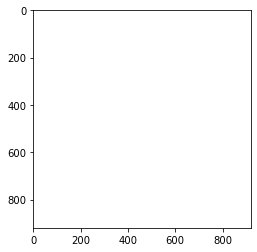

In [18]:
fn = import_FaceNet()
min_dist, ident, encoding, dist, y = FaceRecognition().who_is_it("/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/2022March24_10_37_25_Eingang752_crop_track_1.png",
                            fn, arr=arr)

In [21]:
db["24"]["Olga"]["path"][0]

'/mnt/golem/frodo/clusteredFaces_lower_resolution/Olga/resolution_24x24/FaceNet_resolution/5987_cropped_face_24_espcn4_FaceNet_input.png'

In [109]:
from skimage import color
from skimage import io
import cv2
from pathlib import Path
from tqdm import tqdm

def img_to_encoding(img, FaceNet): 
    img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
    x_train = np.expand_dims(img, axis=0)
    embedding = FaceNet.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

def import_FaceNet(model_path='/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.json', 
                   weight_path = '/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    
path = "/mnt/golem/frodo/clusteredFaces_lower_resolution/camera_pics/grey/"
db_grey = {}
cont = []
pths = []
db = json.loads(open("/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json").read())
db_tmp = {}
for r in ["64"]:
    for n in list(db[r].keys())[2:]:
        for i,p in enumerate(db[r][n]["path"][:3]):
            img = io.imread(p)
            img = Image.open(p).convert('RGBA')
            background = Image.new('RGBA', img.size, (255,255,255))
            alpha_composite = Image.alpha_composite(background, img)
            alpha_composite_3 = alpha_composite.convert('RGB')
            pic = np.asarray(alpha_composite_3)
            imgGray = color.rgb2gray(pic)
            imgGray = np.stack((imgGray,)*3, axis=-1)

            pat = path + p.split("/")[5] + "/" + r + "/"

            Path(pat).mkdir(parents=True, exist_ok=True)
            f = pat + p.split("/")[5] + "_"+str(i) + "_.png"

            plt.imsave(f, imgGray)
            cont.append(img_to_encoding(imgGray, import_FaceNet()))
            pths.append(f)
        db_tmp.update({n:{"enc": cont,
                     "path": pths
                    }
                 })
        
        cont = []
        pths = []
        
    db_grey[r] = db_tmp 




In [157]:
arr_grey = {}
for r in ["64"]:
    arr_grey[k] = [np.vstack(v["enc"]) for k,v in db_grey[r].items()]

X= np.vstack(arr_grey["64"])
y =  [[k]*3 for k,v in db_grey[r].items()]
y = [j for i in y for j in i]
arr_grey = (X, y)

In [165]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm
from mtcnn.mtcnn import MTCNN    
import os

# this code allocates only 1GB of your GPU to tensorflow used by face detection
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
  
# this code allocates only as much GPU as it needs and expands the memory when running
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:# Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, arr, res="64", thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)
        face = color.rgb2gray(face)
        face = np.stack((face,)*3, axis=-1)

        if face is None:
            return None, "No face visible"
        plt.imshow(face)
        resolution = int(len(face)/zoom)
        print("resolution of face {}".format(resolution))
        
        from skimage.transform import resize

        face = resize(face, (160, 160, 3))
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)
    

        # Find the closest encoding 
#         res = self.find_nearest([int(k) for k in arr.keys()], resolution)
#         res = res
#         print("nearest resolution {}".format(res))
      
            # Initialize "min_dist" to a large value, say 100 (≈1 line)

        # Loop over the database dictionary's names and encodings.
#         for (db_enc, name) in arr[res]:
        X,y = arr
        print(X.shape)
        print(encoding.shape)

        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
#         dist = np.linalg.norm(tf.subtract(encoding, X))
        dist = np.apply_along_axis(np.linalg.norm, 1, (X-encoding))
        print(dist.shape)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
#         if dist < min_dist:

        min_ind = np.argmin(dist)
        min_dist = dist[min_ind]
        identity = y[min_ind]
        encoding = X[min_ind,:]
                
        ### END CODE HERE

        if min_dist > thr:
            print("Not in the database.")
        else:
            print ("it's " + str(identity) + ", the distance is " + str(min_dist))
         


        return min_dist, identity, encoding, dist, y

 
    
    def img_to_encoding(self, img): 
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
#                 print(os.path.dirname(os.path.realpath(__file__)))
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)

        print(pic.shape)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            faces = []
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])

    
def import_FaceNet(model_path='/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.json', 
                   weight_path = '/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    




(3504, 3048, 3)
[INFO] 1 faces detected!!!
[747, 1330, 770, 1004]
resolution of face 251
(245, 128)
(1, 128)
(245,)
it's Frau_Möske, the distance is 0.0006252718


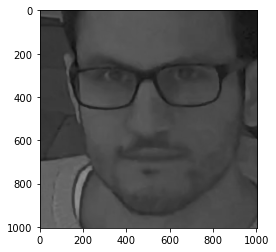

In [166]:
fn = import_FaceNet()
min_dist, ident, encoding, dist, y = FaceRecognition().who_is_it("/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_1/2022March24_10_37_25_Eingang752_crop_track_1.png",
                            fn, arr=arr_grey)

In [175]:
list(np.array(y)[np.argsort(dist)]), list(np.array(dist)[np.argsort(dist)])

(['Frau_Möske',
  'Benjamin_Haas',
  'Elvira_Bruno',
  'Sandro_Bruno',
  'Thomas_Stiebelehner',
  'Frau_Möske',
  'Matthias_Tröndle',
  'Frau_Möske',
  'Prathip',
  'Giuseppina_Rotolo',
  'Giuseppina_Rotolo',
  'Emöke',
  'Stefan_Streuber',
  'Hainer_Schneider',
  'Esther_Olifant',
  'Janine_Möske',
  'Stefan_Leber',
  'Sabrina',
  'Matthias_Tröndle',
  'Siggi_Schneider',
  'Zola_Bruno',
  'Hubert_Leber',
  'Josi',
  'Caren_Bruno',
  'Melanie_Leber',
  'Maureen_Leber',
  'Christina',
  'Benjamin_Haas',
  'Theresa_Reith',
  'Tina',
  'Christina',
  'Nora_Tröndlin',
  'Emöke',
  'Angie',
  'Iris_Bruno',
  'Climeline_Müller',
  'Sasha_Müller',
  'Emöke',
  'David_Bürchner',
  'Theresa_Reith',
  'Anna_Klockhof',
  'Prathip',
  'Katharina_I_Murg',
  'Leonie',
  'Tanja_Haas',
  'Stefan_Streuber',
  'Nabil_Benzaid',
  'Maureen_Leber',
  'Maureen_Leber',
  'Sabrina',
  'Sabrina',
  'Sandra_Bürchner',
  'Edeltraut_Schneider',
  'Katharina_II_Murg',
  'Markus_Odermatt',
  'Hubert_Leber',
  'Anja

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.]])

In [109]:
clf2 = joblib.load('smart_surveillance/FaceRecognition/SGDC.json')

proba = clf2["64"].predict_proba(X[1,:].reshape(1,-1))

np.where(proba > 1/len(np.unique(y))*10)[1]

array([58])

In [98]:
clf2["64"].classes_[np.where(proba > 1/len(np.unique(y))*10)[1]]
proba[np.where(proba > 1/len(np.unique(y))*10)]

array([0.2686615])

In [14]:
[I for i in list(map(lambda x: [x[0]]*x[1], zip(["ojs", "ijos"], [5,1]))) for I in i]

['ojs', 'ojs', 'ojs', 'ojs', 'ojs', 'ijos']

In [108]:
import logging
import logging.handlers

smtp_handler = logging.handlers.SMTPHandler(mailhost=('smtp.gmx.net', 25),
                                            fromaddr="sandro.bruno@gmx.de", 
                                            toaddrs="sandro.bruno@novartis.com",
                                            subject=u"AppName error!",
                                           credentials=("sandro.bruno@gmx.de", "what ever you love"))


logger = logging.getLogger()
logger.addHandler(smtp_handler)

try:
    print(hallo)
except Exception as e:
    print(e)
    logger.exception('Unhandled Exception')

name 'hallo' is not defined


--- Logging error ---
Traceback (most recent call last):
  File "/tmp/ipykernel_547666/3257819036.py", line 15, in <module>
    print(hallo)
NameError: name 'hallo' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/logging/handlers.py", line 1008, in emit
    smtp = smtplib.SMTP(self.mailhost, port, timeout=self.timeout)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/smtplib.py", line 251, in __init__
    (code, msg) = self.connect(host, port)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/smtplib.py", line 336, in connect
    self.sock = self._get_socket(host, port, self.timeout)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/smtplib.py", line 307, in _get_socket
    self.source_address)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/socket.py", line 707, in create_connec

--- Logging error ---
Traceback (most recent call last):
  File "/tmp/ipykernel_547666/3257819036.py", line 15, in <module>
    print(hallo)
NameError: name 'hallo' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/logging/handlers.py", line 1021, in emit
    smtp.send_message(msg)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/smtplib.py", line 967, in send_message
    rcpt_options)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/smtplib.py", line 867, in sendmail
    raise SMTPSenderRefused(code, resp, from_addr)
smtplib.SMTPSenderRefused: (530, b'Authentication required', 'sandro.bruno@gmx.de')
Call stack:
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/run

In [121]:
np.unique(y_new,return_counts=True)

(array(['Angie', 'Caren_Bruno', 'Elvira_Bruno', 'Esther_Olifant',
        'Francesca_Möske', 'Hubert_Leber', 'Jürgen_Schäck',
        'Maureen_Leber', 'Patrick_Möske', 'Salvatore_Bruno',
        'Sandro_Bruno', 'Stefan_Leber'], dtype='<U15'),
 array([ 151, 2543,  236,  243,  224,  172,  158,  342,  113,  188, 1833,
         251]))

In [111]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge','perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
# class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
eta0 = [1, 10, 100] 
param_distributions = dict(loss=loss, 
                           penalty=penalty, 
                           alpha=alpha, 
                           learning_rate=learning_rate,
                           class_weight=["balanced",None],
                           eta0=eta0) 

In [112]:
# defining parameter range
grid = GridSearchCV(clf, param_distributions, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

best_knn = grid_search.best_params_
print(best_knn)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximu

KeyboardInterrupt: 

In [102]:
from sklearn.model_selection import RandomizedSearchCV 

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5, class_weight="balanced") 
random = RandomizedSearchCV(estimator=sgd, param_distributions=param_distributions, scoring='roc_auc', verbose=1, 
                            n_jobs=-1, n_iter=1000) 
random_result = random.fit(X_train, y_train) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "/home/brunosa3/anaconda3/

/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 566, in _fit
    classes, sample_weight, coef_init, intercept_init)
  File "/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 501, in _partial_fit
    self.class_

ValueError: eta0 must be > 0

In [7]:
from sklearn.metrics import roc_auc_score
def model_selection(classifier, name, grid, X_train, y_train, scoring):
    
    gridsearch_cv=GridSearchCV(classifier, 
                               grid,
                               cv=5, 
                               scoring = scoring)
    
    gridsearch_cv.fit(X_adasyn, y_adasyn)
    
    results_dict = {}
    
    results_dict['classifier_name'] = name    
    results_dict['classifier'] = gridsearch_cv.best_estimator_
    results_dict['best_params'] = gridsearch_cv.best_params_
    results_dict['ROC_AUC'] = gridsearch_cv.best_score_
    
    return(results_dict)

results = []
for m in models:    
    print(m['name'])    
    results.append(fit_first_model(m['classifier'], 
                                   m['name'],
                                   m['grid'],
                                   X_adasyn, 
                                   y_adasyn, 
                                   'roc_auc'))      
    print('completed')

logreg


NameError: name 'fit_first_model' is not defined

In [7]:
import itertools
db_orig = json.loads(open("/mnt/golem/frodo/Database/New_FaceDB.json").read()) 
X_orig = {k: np.vstack(v["encodings"]) for k,v in db_orig.items()}

rep= list(map(len, list(X_orig.values())))
names=list(X_orig.keys())

y= list(itertools.chain(*[r*[n] for r,n, in zip(rep,names)]))


In [8]:
from collections import Counter
import numpy as np
import random
length = dict(Counter(y))

# X,y = arr["64"]
X = np.vstack(X_orig.values())

smpl = 30
X_new = np.zeros(128).reshape(1,-1)
y_new = []
prev, cum = (0,0)
for i,it in enumerate(length.items()):
    k,v = it
    cum += v
    if cum-i*prev < smpl:
        X_new = np.vstack((X_new, X[i*prev:cum,:]))
        y_new += [k]*(cum-i*prev)
    else:
        X_new = np.vstack((X_new, np.array(random.sample(X[i*prev:cum,:].tolist(), smpl))))
        y_new += [k]*smpl
    prev = v

X_new = np.delete(X_new, (0), axis=0)
print(X_new.shape, len(y_new))

/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  import sys


(1853, 128) 1853


In [186]:
X,y = arr["64"]
X.shape

(8478, 128)

In [150]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import json
from itertools import chain

def rep(x):
    return [x[0]] * x[1]
def load_database(database="/mnt/golem/frodo/clusteredFaces_lower_resolution/cleaned_final_low_resoloution_FaceDB.json"):

    db = json.loads(open(database).read())
    res = list(db.keys())
    
    db2 = {res[0]: {k: np.vstack(v["encodings"]) for k,v in db[res[0]].items()}}
    len_db = {res[0]: list(map(len, list(db2[res[0]].values())))}
    nest = {res[0]: list(map(rep, zip(list(db2[res[0]].keys()), len_db[res[0]])))}
    names = {res[0]: list(chain(*nest[res[0]]))}

    for r in res[1:]:
        db2.update({r: {k: np.vstack(v["encodings"]) for k,v in db[r].items()}})
        len_db.update({r: list(map(len, list(db2[r].values())))})
        nest.update({r: list(map(rep, zip(list(db2[r].keys()), len_db[r])))})
        names.update({r: list(chain(*nest[r]))})
    
    arr = {k: (np.vstack(list(v.values())), names[k]) for k,v in db2.items()}
    
    return arr

arr = load_database()

# X,y = arr["64"]
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     stratify=y, 
#                                                     test_size=0.25)

# print(X_train.shape, X_test.shape)

# knn = KNeighborsClassifier(weights="distance")

# # knn.fit(X,y)
# # knn.predict(X[10,:].reshape(1,-1))
# k_range = list(range(3, 31, 2))
# param_grid = dict(n_neighbors=k_range)

# # defining parameter range
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# # fitting the model for grid search
# grid_search=grid.fit(X_train, y_train)

# best_knn = grid_search.best_params_
# print(best_knn)

# accuracy = grid_search.best_score_ *100
# print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

In [96]:
import json
database="/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json"

db = json.loads(open(database).read())
print(len(db["64"]["Caren_Bruno"]["path"]), len(db["64"]["Sandro_Bruno"]["path"]))



(2543, 1833)

In [151]:
database="/mnt/golem/frodo/clusteredFaces_lower_resolution/cleaned_final_low_resoloution_FaceDB.json"

db = json.loads(open(database).read())
print(len(db["64"]["Caren_Bruno"]["path"]), len(db["64"]["Sandro_Bruno"]["path"]))


2538 1831


In [2]:
knn = KNeighborsClassifier(n_neighbors=3)#best_knn["n_neighbors"])
knn.fit(X_new,y_new)
ind = random.sample(list(range(len(X))),1)[0]
print(ind)
print(X[ind,:].shape)
proba = knn.predict_proba(X[ind,].reshape(1,-1))
print(y[ind])
print(knn.classes_[np.argmax(proba)])
print(proba)
# import matplotlib.pyplot as plt
# np.sum([0 if k ==  y[ind] else v for k,v in length.items() ])
# pic = plt.imread(db["64"][y[ind]]["path"][])
# plt.imshow(pic)
# np.where(proba>0.6)

NameError: name 'X_new' is not defined

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

for r in arr.keys():
    X,y = arr[str(r)]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.4)

    print(X_train.shape, X_test.shape)

    knn = KNeighborsClassifier(weights="distance")

    k_range = list(range(3, 11, 2))
    param_grid = dict(n_neighbors=k_range)

    # defining parameter range
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

    # fitting the model for grid search
    grid_search=grid.fit(X_train, y_train)

    best_knn = grid_search.best_params_
    print(best_knn)

    accuracy = grid_search.best_score_ *100
    print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

(4720, 128) (3148, 128)
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


{'n_neighbors': 3}
Accuracy for our training dataset with tuning is : 86.99%
(5160, 128) (3440, 128)
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


{'n_neighbors': 5}
Accuracy for our training dataset with tuning is : 95.70%
(5134, 128) (3424, 128)
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


{'n_neighbors': 3}
Accuracy for our training dataset with tuning is : 98.29%
(5147, 128) (3432, 128)
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


{'n_neighbors': 5}
Accuracy for our training dataset with tuning is : 99.44%
(5086, 128) (3392, 128)
Fitting 10 folds for each of 4 candidates, totalling 40 fits


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


{'n_neighbors': 3}
Accuracy for our training dataset with tuning is : 99.78%


In [97]:
X, y = arr["64"]
X.shape, len(y)

((8478, 128), 8478)

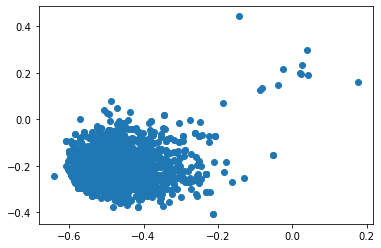

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(X)
plt.scatter(pca[[True if i == "Caren_Bruno" else False for i in y],0], pca[[True if i == "Caren_Bruno" else False for i in y],1])

In [99]:
pca = np.c_[pca, np.array(list(range(0,len(pca))))]

ind = [True if i == "Caren_Bruno" else False for i in y]
np.array(y)[ind][pca[ind,0] > -0.2]
pca[ind, 2][pca[ind,0] > -0.2]

array([ 839.,  840.,  841.,  842.,  844.,  845.,  974., 1062., 1366.,
       1607., 1613., 1728., 2017., 2383., 3378., 3379., 3380., 3381.])

In [100]:
# pca = np.c_[pca, np.array(list(range(0,len(pca))))]

ind = [True if i == "Caren_Bruno" else False for i in y]
print(len(pca))
pca2 = pca[ind].copy()
print(len(pca2))
pca2 = np.c_[pca2, np.array(list(range(0,len(pca2))))].copy()
print(pca2.shape)
pca2[pca2[:,0] > -0.2, 3]

8478
2543
(2543, 4)


array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 5.000e+00, 6.000e+00,
       1.350e+02, 2.230e+02, 5.270e+02, 7.680e+02, 7.740e+02, 8.890e+02,
       1.178e+03, 1.544e+03, 2.539e+03, 2.540e+03, 2.541e+03, 2.542e+03])

In [101]:
outliers = [(i,v) for i,v in enumerate(db["64"]["Caren_Bruno"]["path"]) if i in [int(j) for j in pca2[pca2[:,0] > -0.2, 3].tolist()]]

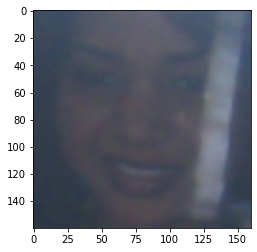

In [102]:
pic = plt.imread(outliers[5][1])
plt.imshow(pic)

In [103]:
outliers[:5]

[(0,
  '/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_64x64/FaceNet_resolution/28998_cropped_face_64_espcn4_FaceNet_input.png'),
 (1,
  '/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_64x64/FaceNet_resolution/29065_cropped_face_64_espcn4_FaceNet_input.png'),
 (2,
  '/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_64x64/FaceNet_resolution/29087_cropped_face_64_espcn4_FaceNet_input.png'),
 (3,
  '/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_64x64/FaceNet_resolution/29094_cropped_face_64_espcn4_FaceNet_input.png'),
 (5,
  '/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_64x64/FaceNet_resolution/29133_cropped_face_64_espcn4_FaceNet_input.png')]

In [104]:
DB = db.copy()
len(DB["64"]["Caren_Bruno"]["path"])

2543

In [105]:
for o in outliers[:5]:
    for r in DB.keys():
        p = o[1].split("/")
        res = "resolution_" + r + "x" + r
        file = re.search("(.*face_)\d+(.*)", p[8]) #"28998_cropped_face_64_espcn4_FaceNet_input.png"
        file = file.group(1) + r + file.group(2)
        MATCH = "/".join(p[:6] +  [res] + p[7:8] + [file])
#         print(MA)
        if MATCH in DB[r]["Caren_Bruno"]["path"]:
            print(MATCH)
            ind = DB[r]["Caren_Bruno"]["path"].index(MATCH)
            del DB[r]["Caren_Bruno"]["path"][ind]
            del DB[r]["Caren_Bruno"]["encodings"][ind]
            
            

/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_32x32/FaceNet_resolution/28998_cropped_face_32_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_40x40/FaceNet_resolution/28998_cropped_face_40_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_48x48/FaceNet_resolution/28998_cropped_face_48_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_64x64/FaceNet_resolution/28998_cropped_face_64_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_32x32/FaceNet_resolution/29065_cropped_face_32_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_40x40/FaceNet_resolution/29065_cropped_face_40_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Caren_Bruno/resolution_48x48/FaceNet_resolution/29065_cropped_face_48_espcn4_FaceNet_in

In [106]:
len(db["64"]["Caren_Bruno"]["encodings"])

2538

In [107]:
import re
r = "64"
p = db[r]["Caren_Bruno"]["path"][0].split("/")
res = "resolution_" + r + "x" + r
file = re.search("(.*face_)\d+(.*)", p[8]) #"28998_cropped_face_64_espcn4_FaceNet_input.png"
file = file.group(1) + r + file.group(2)

"/".join(p[:5] +  [res] + p[7:8] + [file])

'/mnt/golem/frodo/clusteredFaces_lower_resolution/resolution_64x64/FaceNet_resolution/29105_cropped_face_64_espcn4_FaceNet_input.png'

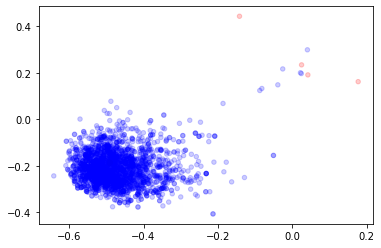

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(X)

categories = np.array([0]*4 + [0] + [1]*(len(pca2)-5))

colormap = np.array(['r', 'b'])

plt.scatter(pca2[:,0], pca2[:,1], s=20, alpha=0.2, c=colormap[categories])

# plt.scatter(pca[[True if i == "Caren_Bruno" else False for i in y],0], pca[[True if i == "Caren_Bruno" else False for i in y],1],
#            )

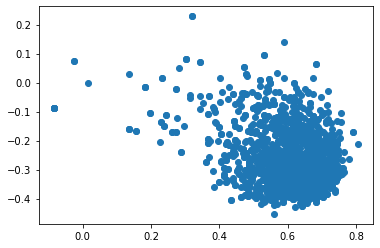

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(X)
plt.scatter(pca[[True if i == "Sandro_Bruno" else False for i in y],0], pca[[True if i == "Sandro_Bruno" else False for i in y],1])

In [110]:
# pca = np.c_[pca, np.array(list(range(0,len(pca))))]
name = "Sandro_Bruno"
ind = [True if i == name else False for i in y]
print(len(pca))
pca2 = pca[ind].copy()
print(len(pca2))
pca2 = np.c_[pca2, np.array(list(range(0,len(pca2))))].copy()
print(pca2.shape)
pca2[pca2[:,0] < 0.35, 2]

8478
1833
(1833, 3)


array([ 114.,  319.,  323.,  335.,  365.,  366.,  372.,  414.,  452.,
        455.,  472.,  513.,  540.,  544.,  550.,  555.,  607.,  618.,
        623.,  629.,  630.,  632.,  671.,  703.,  776.,  810.,  948.,
       1078., 1566., 1800., 1812., 1813., 1814., 1815., 1816., 1817.,
       1818., 1819., 1820., 1821., 1822., 1823., 1824., 1825., 1826.,
       1827., 1828., 1829., 1830., 1831., 1832.])

In [111]:
outliers = [(i,v) for i,v in enumerate(db["64"][name]["path"]) if i in [int(j) for j in pca2[pca2[:,0] < 0.35, 2].tolist()]]

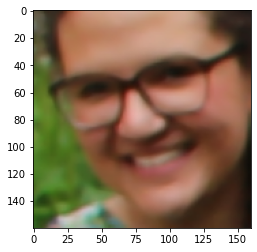

In [112]:
pic = plt.imread(outliers[29][1])
plt.imshow(pic)

In [113]:
outliers[28:30]

[(1566,
  '/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_64x64/FaceNet_resolution/57150_cropped_face_64_espcn4_FaceNet_input.png'),
 (1800,
  '/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_64x64/FaceNet_resolution/63634_cropped_face_64_espcn4_FaceNet_input.png')]

In [114]:
name = "Sandro_Bruno"
for o in outliers[28:30]:
    for r in DB.keys():
        p = o[1].split("/")
        res = "resolution_" + r + "x" + r
        file = re.search("(.*face_)\d+(.*)", p[8]) #"28998_cropped_face_64_espcn4_FaceNet_input.png"
        file = file.group(1) + r + file.group(2)
        MATCH = "/".join(p[:6] +  [res] + p[7:8] + [file])
#         print(MA)
        if MATCH in DB[r][name]["path"]:
            print(MATCH)
            ind = DB[r][name]["path"].index(MATCH)
            del DB[r][name]["path"][ind]
            del DB[r][name]["encodings"][ind]
            
            

/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_24x24/FaceNet_resolution/57150_cropped_face_24_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_32x32/FaceNet_resolution/57150_cropped_face_32_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_40x40/FaceNet_resolution/57150_cropped_face_40_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_48x48/FaceNet_resolution/57150_cropped_face_48_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_64x64/FaceNet_resolution/57150_cropped_face_64_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_24x24/FaceNet_resolution/63634_cropped_face_24_espcn4_FaceNet_input.png
/mnt/golem/frodo/clusteredFaces_lower_resolution/Sandro_Bruno/resolution_32x32/FaceNet_resolution/63634_cropped_face_32_espcn4_Fac

In [115]:
len(DB["64"][name]["path"])

1831

In [116]:
with open("/mnt/golem/frodo/clusteredFaces_lower_resolution/cleaned_final_low_resoloution_FaceDB.json", 'w') as fp:
    json.dump(DB, fp) 

In [136]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]
f7(y)

['Olga',
 'Mary',
 'Katharina_II_Murg',
 'Julien',
 'Bastian',
 'Sabrina',
 'Franka',
 'Martin',
 'Josi',
 'Melanie',
 'Erik',
 'Claudia',
 'Leonie',
 'Yannick_Reith',
 'Frau_Möske',
 'Massimo',
 'Silvia',
 'Thomas_Tröndlin',
 'Marion',
 'Giusppe_Rotolo',
 'Yannick_Haas',
 'Katharina_I_Murg',
 'Emöke',
 'Herr_Möske',
 'Melanie_Leber',
 'Georg',
 'Thomas_Stiebelehner',
 'Josi_Dulemont',
 'Tanja_Haas',
 'Anna_Klockhof',
 'Prathip',
 'Daniela',
 'Caren_Bruno',
 'Noeli_Müller',
 'Hubert_Leber',
 'Stefan_Leber',
 'Jessica',
 'Esther_Olifant',
 'Sigrid_Leber',
 'Holger',
 'Jürgen_Schäck',
 'Rose',
 'Joe_Danz',
 'Jochen_Weber',
 'Sandro_Bruno',
 'Angie',
 'Sasha_Müller',
 'Patrick_Möske',
 'Benjamin_Haas',
 'Climeline_Müller',
 'David_Bürchner',
 'Edeltraut_Schneider',
 'Elvira_Bruno',
 'Giuseppina_Rotolo',
 'Isabelle_Odermatt',
 'Tina',
 'Christina',
 'Kerstin',
 'Iris_Bruno',
 'Ifrahim',
 'Anja_Odermatt',
 'Francesca_Möske',
 'Hainer_Schneider',
 'Janine_Möske',
 'Jaqueline_Odermatt',
 'Kat

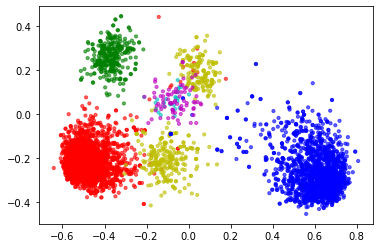

In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(X)

categories = np.array([0]* 2543 + [6]*172 + [3]*251  + [1]*1833 + [2] * 342 + [5]*25 + [4]*78 )

colormap = np.array(['r', 'b', 'g', 'y', 'm', 'c', 'y'])

# plt.scatter(pca2[:,0], pca2[:,1], s=20, alpha=0.2)#, c=colormap[categories])
plt.scatter(pca[[True if (i == "Sandro_Bruno") or (i == "Caren_Bruno") or (i == "Hubert_Leber") or (i == "Kyla_Bruno") or (i == "Maureen_Leber") or (i == "Stefan_Leber") or (i == "Zola_Bruno")  else False for i in y],0], 
            pca[[True if (i == "Sandro_Bruno") or (i == "Caren_Bruno") or (i == "Hubert_Leber") or (i == "Kyla_Bruno") or (i == "Maureen_Leber") or (i == "Stefan_Leber") or (i == "Zola_Bruno") else False for i in y],1],
           c=colormap[categories], alpha=0.6, s=10)
# plt.scatter(pca[[True if i == "Caren_Bruno" else False for i in y],0], pca[[True if i == "Caren_Bruno" else False for i in y],1],
#            )

In [121]:
from collections import Counter
sorted(dict(Counter(arr["64"][1])).items(), key=lambda x: x[1])

[('Stefania', 2),
 ('Franka', 4),
 ('Nora_Tröndlin', 10),
 ('Herr_Möske', 11),
 ('Mary', 12),
 ('Frau_Möske', 12),
 ('Katharina_I_Murg', 12),
 ('Ifrahim', 15),
 ('Janine_Möske', 15),
 ('Thomas_Tröndlin', 16),
 ('Tina', 16),
 ('Erik', 17),
 ('Daniela', 17),
 ('Kerstin', 17),
 ('Jochen_Weber', 18),
 ('Sandra_Bürchner', 18),
 ('Giusppe_Rotolo', 19),
 ('Melanie', 20),
 ('Massimo', 20),
 ('Noeli_Müller', 20),
 ('Iris_Bruno', 21),
 ('Matthias_Tröndle', 21),
 ('Stefan_Streuber', 22),
 ('Katharina_II_Murg', 23),
 ('Claudia', 23),
 ('Leonie', 23),
 ('Josi_Dulemont', 23),
 ('Jaqueline_Odermatt', 23),
 ('Pino_Bruno', 23),
 ('Marion', 24),
 ('Georg', 24),
 ('Ladina_Odermatt', 24),
 ('Sabrina', 25),
 ('Kyla_Bruno', 25),
 ('Anna_Klockhof', 26),
 ('Edeltraut_Schneider', 26),
 ('Martin', 27),
 ('Theresa_Reith', 27),
 ('Prathip', 28),
 ('Philipp_Evonik', 28),
 ('Philipp', 28),
 ('Sigrid_Leber', 29),
 ('Hainer_Schneider', 29),
 ('Silvia', 30),
 ('Yannick_Haas', 30),
 ('Rose', 30),
 ('Joe_Danz', 30),
 ('

In [41]:
import json
import numpy as np

db ="/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB.json"
db = json.loads(open(db).read())
db ="/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB.json"
db = json.loads(open(db).read())

len(db["40"])
# {k: np.vstack(v["encodings"]) for k,v in db["24"].items()}


25

In [50]:
import json
import numpy as np

db32 = {k: np.vstack(v["encodings"]) for k,v in db["32"].items()}
# print(len(db24))
# db["40"].keys()

In [3]:
import itertools

rep= list(map(len, list(db32.values())))
names=list(db32.keys())

y= list(itertools.chain(*[r*[n] for r,n, in zip(rep,names)]))

# X = np.corrcoef(np.vstack(db24.values()))
X = np.vstack(db32.values())
print(X.shape, len(y))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

print(X_train.shape, X_test.shape)

NameError: name 'db32' is not defined

In [153]:
len(arr["64"][0])

8471

In [166]:
knn = KNeighborsClassifier(weights="distance", n_neighbors=5)
param = [3,5,3,5,3]
clf = {}
for r,p in zip(arr.keys(), param):    
    X, y = arr[r]
#     import random

    knn = KNeighborsClassifier(weights="distance", n_neighbors=p)
    clf[r] = knn.fit(X,y)

# from sklearn.external import joblib
import joblib
joblib.dump(clf, 'smart_surveillance/FaceRecognition/KNN_weighted.json')


['smart_surveillance/FaceRecognition/KNN_weighted.json']

In [167]:
import joblib
clf = joblib.load('smart_surveillance/FaceRecognition/KNN_weighted.json')
clf

{'24': KNeighborsClassifier(n_neighbors=3, weights='distance'),
 '32': KNeighborsClassifier(weights='distance'),
 '40': KNeighborsClassifier(n_neighbors=3, weights='distance'),
 '48': KNeighborsClassifier(weights='distance'),
 '64': KNeighborsClassifier(n_neighbors=3, weights='distance')}

In [168]:
clf["64"].n_samples_fit_

8471

In [218]:
import re
from configparser import RawConfigParser
import os
input_uri = "rtsp://username:password@$192.168.1.126:554/h264Preview_01_main"
ip_set = re.findall( r'[0-9]+(?:\.[0-9]+){3}', input_uri )[0]
def read_config(props_path: str) -> dict:
    """Reads in a properties file into variables.
    """
    config = RawConfigParser()
    assert os.path.exists(props_path), f"Path does not exist: {props_path}"
    config.read(props_path)
    return config

# Read in your ip, username, & password
config = read_config("/home/brunosa3/secrets.cfg")
c = [l for l in list(config.keys()) if l != "DEFAULT"]

[C for C in c if config.get(C, "ip") == ip_set] 
# ip = config.get(source, 'ip')
# un = config.get(source, 'username')
# pw = config.get(source, 'password')
# type(list(config.values())[1])

['Eingang']

In [216]:
[l for l in list(config.keys()) if l != "DEFAULT"]

['Eingang', 'Lichthof', 'Terrasse', 'Carport', 'ELW']

In [180]:
o = [1.65729845, 1.58250236, 1.58250236]
w = [0.03968878, 0.05506196, 0.05506196]
n = [0.06577616, 0.08713568, 0.08713568]
o[1]/o[0],w[1]/w[0],n[1]/n[0]


(0.9548686659303881, 1.3873432239539738, 1.3247304190454412)

In [1]:

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm
from mtcnn.mtcnn import MTCNN    
import os

# this code allocates only 1GB of your GPU to tensorflow used by face detection
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
  
# this code allocates only as much GPU as it needs and expands the memory when running
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:# Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, clf, thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)

        if face is None:
            return None, ["No face visible"], None
#         plt.imshow(face)
        resolution = int(len(face)/zoom)
        print("resolution of face {}".format(resolution))
        
#         from skimage.transform import resize

#         face = resize(face, (160, 160, 3))
#         face = self.resize(face[:,:,0], 160, 160)
        
        tmp = "tmp/tmp.png"
        plt.imsave(tmp, face)
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(tmp, FaceNet)

        res = self.find_nearest([int(k) for k in clf.keys()], resolution)
        print("nearest resolution {}".format(res))
        
#         knn = KNeighborsClassifier(weights="distance", n_neighbors=5)
#         X,y = arr[res]
#         clf[res].fit(X,y)
        identity, dist, status = clf[res].predict(encoding)
        
        if status == "distance":
            print("KNN used class size to re-weight the neigbors")
        else:
            print("KNN did not use class size to re-weight the neigbors")
            
        n,w = dist[0]
        dist = list(zip(n,w))
        dist_ind = [x for x, y in enumerate(dist) if y[0] ==  identity]

        min_dist = 1/np.array(dist)[dist_ind][:,1].astype(float).mean()

        ### END CODE HERE

        if min_dist < thr:
            print("Not in the database.")
            identity = ["unkwown"]
            min_dist = None
        else:
            print ("it's " + ' '.join(identity) + ", the distance is " + str(min_dist))
            
        
#         proba = clf[res].predict_proba(encoding.reshape(1,-1)) #[0] this is needed for KNN model
        
#         # this needs to be uncommented when using Knn
#         thr = 1/len(proba) * 10
        

#         ind = np.where(proba>=thr)
        
#         if ind[1] != []:
#             identity = clf[res].classes_[ind[1]]
#             min_dist = proba[ind]
#         else:
#             identity = "unkwown"
#             min_dist = None

# this pice is for knn model
#         if ind != []:
#             identity = clf[res].classes_[ind]
#             min_dist = proba[ind] 
#         else:
#             identity = "unknown"
#             min_dist = None

          
        
        return min_dist, identity, encoding
    
 
    
#     def img_to_encoding(self, img): 
#         img = np.around(np.array(img) / 255.0, decimals=12)
# #         img = img.resize((160,160), Image.NEAREST)        
#         x_train = np.expand_dims(img, axis=0)
#         embedding = self.FaceNet.predict_on_batch(x_train)
#         return embedding / np.linalg.norm(embedding, ord=2)
    def img_to_encoding(self, image_path, model):
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
        img = np.around(np.array(img) / 255.0, decimals=12)
        x_train = np.expand_dims(img, axis=0)
        embedding = model.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2) 
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
#                 print(os.path.dirname(os.path.realpath(__file__)))
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            faces = []
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])

    
def import_FaceNet(model_path='/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.json', 
                   weight_path = '/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/FaceRecognition/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    




1 Physical GPUs, 1 Logical GPUs


2022-03-27 22:01:18.760902: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 22:01:18.787108: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 22:01:18.787273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 22:01:18.807426: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [2]:
import json 
import numpy as np
from itertools import chain

def rep(x):
    return [x[0]] * x[1]
def load_database(database="/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json"):
    db = json.loads(open(database).read())
    res = list(db.keys())
       
    db2 = {res[0]: {k: np.vstack(v["encodings"]) for k,v in db[res[0]].items()}}
    len_db = {res[0]: list(map(len, list(db2[res[0]].values())))}
    nest = {res[0]: list(map(rep, zip(list(db2[res[0]].keys()), len_db[res[0]])))}
    names = {res[0]: list(chain(*nest[res[0]]))}

    for r in res[1:]:
        db2.update({r: {k: np.vstack(v["encodings"]) for k,v in db[r].items()}})
        len_db.update({r: list(map(len, list(db2[r].values())))})
        nest.update({r: list(map(rep, zip(list(db2[r].keys()), len_db[r])))})
        names.update({r: list(chain(*nest[r]))})
    
    arr = {k: (np.vstack(list(v.values())), names[k]) for k,v in db2.items()}
    
    return arr
import joblib
clf = joblib.load('smart_surveillance/FaceRecognition/KNN_weighted.json')

arr = load_database()
X,y= arr["64"]

identity, min_dist, status = clf["64"].predict(np.array([i for i in range(128)]).reshape(1,-1))
status

[['Zola_Bruno' 'Kyla_Bruno' 'Zola_Bruno']]
[[0.00120349 0.00120348 0.00120348]]
[1.29395604 4.03714286 1.29395604]
[[0.00155726 0.00485862 0.00155725]]


'distance'

In [11]:
!cd smart_surveillance/ & pwd

/home/brunosa3/projects/smart_surveillance/scr


In [24]:
1/0.5

2.0

In [11]:
fn = import_FaceNet()
test = "smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_49/2022March27_18_30_09_Eingang159794_crop_track_49.png"
test = "smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_49/2022March27_18_29_53_Eingang159510_crop_track_49.png"
FaceRecognition().who_is_it(image_path=test , thr=10, plot=False, FaceNet=fn, clf=clf, res_model="espcn", zoom=4)   

[INFO] 1 faces detected!!!
[561, 217, 357, 467]
resolution of face 116
nearest resolution 64
[['Patrick_Möske' 'Jürgen_Schäck' 'David_Bürchner']]
[[1.1770261  1.12986634 1.12685583]]
[0.8931732  0.63878843 1.77067669]
[[1.05128817 0.72174554 1.99529735]]
KNN used class size to re-weight the neigbors
Not in the database.


(None,
 ['unkwown'],
 array([[ 0.07808907, -0.02220726, -0.23666927, -0.10445995,  0.04408152,
          0.00229235, -0.05757646,  0.02708761,  0.17687373, -0.05800544,
          0.12312805, -0.05999799, -0.03696566, -0.14286937,  0.03417965,
          0.03172666, -0.04218848, -0.14558133, -0.01516987,  0.02400344,
          0.07119355,  0.06307435, -0.00413616, -0.05487402,  0.03800431,
          0.04032622,  0.09808737, -0.01483849, -0.01407532,  0.02068447,
         -0.12444387,  0.05280503, -0.06466331,  0.05338762,  0.04636629,
          0.1290421 ,  0.04048706, -0.16885252,  0.0174594 , -0.12650548,
         -0.12827119,  0.08285695, -0.2123384 , -0.09183284,  0.01307002,
         -0.15644951, -0.00687629,  0.02673466,  0.04084083,  0.05973508,
         -0.07170662, -0.0926735 , -0.13941725,  0.07023206, -0.02263079,
         -0.13129947,  0.0725563 ,  0.08196282, -0.15241063, -0.04199547,
         -0.11408599, -0.03908563,  0.11936587, -0.04031008,  0.0460344 ,
          0.12286

(1279, 530, 4)

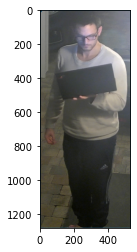

In [6]:
import matplotlib.pyplot  as plt
pic = plt.imread("smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_9/2022March25_22_16_13_Eingang29997_crop_track_9.png")
pic = plt.imread("smart_surveillance/FaceRecognition/FaceNet_input/Eingang/in_of_interest_area/trackID_9/2022March25_22_16_24_Eingang30180_crop_track_9.png")
plt.imshow(pic)
pic.shape

In [17]:


clf = {}
for r in arr.keys():    
    X, y = arr[r]
#     import random

    knn = KNeighborsClassifier(n_neighbors=3)
    clf[r] = knn.fit(X,y)

# from sklearn.external import joblib
import joblib
joblib.dump(clf, 'smart_surveillance/KNN.json')


#     print(X[299,:].shape)
#     proba = knn.fit(X, y).predict_proba(np.array(random.sample(range(128), 128)).reshape(1,-1))
#     print(proba)
#     np.where(proba>0.6)

['smart_surveillance/KNN.json']

In [22]:
loaded_model = joblib.load('smart_surveillance/KNN.json')
loaded_model["24"].classes_[6]

'Christina'

In [58]:
# from sklearn.utils import class_weight
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import SGDClassifier
    
# class_weights = class_weight.compute_class_weight('balanced',
#                  np.unique(y), y)

# #             self.clf = Perceptron(random_state=self.random_state, 
# #                                   class_weight = {0: class_weights[0], 1: class_weights[1]})
# sclf = MultinomialNB(class_prior = class_weights) 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

for r in arr.keys():
    X,y = arr[str(r)]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.25)

    print(X_train.shape, X_test.shape)

    knn = KNeighborsClassifier()

    k_range = list(range(3, 31, 2))
    param_grid = dict(n_neighbors=k_range)

    # defining parameter range
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

    # fitting the model for grid search
    grid_search=grid.fit(X_train, y_train)

    best_knn = grid_search.best_params_
    print(best_knn)

    accuracy = grid_search.best_score_ *100
    print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

(5901, 128) (1967, 128)
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,
/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign 

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

{'n_neighbors': 3}
Accuracy for our training dataset with tuning is : nan%
(6450, 128) (2150, 128)
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

{'n_neighbors': 3}
Accuracy for our training dataset with tuning is : nan%
(6418, 128) (2140, 128)
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

{'n_neighbors': 3}
Accuracy for our training dataset with tuning is : nan%
(6434, 128) (2145, 128)
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

{'n_neighbors': 3}
Accuracy for our training dataset with tuning is : nan%
(6358, 128) (2120, 128)
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

{'n_neighbors': 3}
Accuracy for our training dataset with tuning is : nan%


/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/brunosa3/anaconda3/envs/capstone_clone/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred

In [24]:
knn = KNeighborsClassifier(n_neighbors=best_knn['n_neighbors'],weights="distance")

knn.fit(X_train, y_train)

y_test_pred, pred_w, status = knn.predict(X_test) 

test_accuracy = accuracy_score(y_test,y_test_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

[['Salvatore_Bruno' 'Salvatore_Bruno' 'Salvatore_Bruno']
 ['Elvira_Bruno' 'Elvira_Bruno' 'Elvira_Bruno']
 ['Sandro_Bruno' 'Sandro_Bruno' 'Sandro_Bruno']
 ...
 ['Sandro_Bruno' 'Sandro_Bruno' 'Sandro_Bruno']
 ['Salvatore_Bruno' 'Salvatore_Bruno' 'Salvatore_Bruno']
 ['Caren_Bruno' 'Caren_Bruno' 'Caren_Bruno']]
[[2.82390150e+00 2.20712967e+00 2.05849996e+00]
 [2.73970790e+07 1.83259267e+00 1.57626833e+00]
 [4.75057900e+00 4.64316706e+00 4.32807226e+00]
 ...
 [4.03720633e+00 2.05002108e+00 1.92087281e+00]
 [3.35544320e+07 2.25893343e+00 1.93054973e+00]
 [3.88169263e+00 3.69764930e+00 3.53708516e+00]]
[0.53681189 0.53681189 0.53681189]
[[1.51590389e+00 1.18481345e+00 1.10502725e+00]
 [1.47070777e+07 9.83757530e-01 8.46159580e-01]
 [2.55016728e+00 2.49250728e+00 2.32336064e+00]
 ...
 [2.16722035e+00 1.10047568e+00 1.03114736e+00]
 [1.80124180e+07 1.21262232e+00 1.03634205e+00]
 [2.08373875e+00 1.98494210e+00 1.89874936e+00]]
Accuracy for our testing dataset with tuning is : 99.95%


In [62]:
import re
line="2022-03-26 21:42:35 [ WARNING] Camera motion estimation failed"
p = re.compile("(\d+-\d+-\d+)\s*(\d+:\d+:\d+)\s*\[\s*(\w+)\]\s*(\w+):\s*([\w+/]+.png),(\w+),(\d+),(\d+),(\d+\.\d+),(\d+\.\d+),(\d+\.\d+),(\d+\.\d+)")
p.search(line).group(2)

AttributeError: 'NoneType' object has no attribute 'group'

In [63]:
line = "2022-03-26 21:41:39 [    INFO] Lost:         person     169 at (2504, 1289)"
log = re.compile("(\d+-\d+-\d+)\s*(\d+:\d+:\d+)\s*\[\s*\w+\]\s*(\w+):\s*(\w+)\s*(\d+)\s*\w+\s*\(\s*(\d+,\s*\d+)\)")
log.search(line).group(3)

'Lost'

In [51]:
import joblib
clf = joblib.load('smart_surveillance/FaceRecognition/KNN_weighted.json')

knn = clf["24"]
# knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test) 

test_accuracy = accuracy_score(y_test,y_test_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

[['Salvatore_Bruno' 'Salvatore_Bruno' 'Salvatore_Bruno']
 ['Elvira_Bruno' 'Elvira_Bruno' 'Elvira_Bruno']
 ['Sandro_Bruno' 'Sandro_Bruno' 'Sandro_Bruno']
 ...
 ['Sandro_Bruno' 'Sandro_Bruno' 'Sandro_Bruno']
 ['Salvatore_Bruno' 'Salvatore_Bruno' 'Claudia']
 ['Caren_Bruno' 'Caren_Bruno' 'Caren_Bruno']]
[[1.22612664 1.21827326 1.15936977]
 [1.67510755 1.67510755 1.57286933]
 [1.38191735 1.34956466 1.34956466]
 ...
 [1.25579124 1.25579124 1.21228738]
 [1.3039677  1.3039677  1.18017984]
 [1.52336456 1.50817489 1.50690524]]
[0.4904014 0.4904014 0.4904014]
[[0.60129421 0.59744291 0.56855655]
 [0.82147508 0.82147508 0.77133732]
 [0.6776942  0.66182839 0.66182839]
 ...
 [0.61584178 0.61584178 0.59450742]
 [0.63946758 0.63946758 0.57876184]
 [0.74706011 0.73961107 0.73898844]]


ValueError: Found input variables with inconsistent numbers of samples: [2120, 3]

In [15]:
y_test_pred

(array(['Salvatore_Bruno', 'Elvira_Bruno', 'Sandro_Bruno', ...,
        'Sandro_Bruno', 'Salvatore_Bruno', 'Caren_Bruno'], dtype='<U19'),
 [(array(['Salvatore_Bruno', 'Salvatore_Bruno', 'Salvatore_Bruno'],
         dtype='<U19'),
   array([1.51590389, 1.18481345, 1.10502725])),
  (array(['Elvira_Bruno', 'Elvira_Bruno', 'Elvira_Bruno'], dtype='<U19'),
   array([1.47070777e+07, 9.83757530e-01, 8.46159580e-01])),
  (array(['Sandro_Bruno', 'Sandro_Bruno', 'Sandro_Bruno'], dtype='<U19'),
   array([2.55016728, 2.49250728, 2.32336064])),
  (array(['Caren_Bruno', 'Caren_Bruno', 'Caren_Bruno'], dtype='<U19'),
   array([1.30388675, 1.25906036, 1.23664889])),
  (array(['Frau_Möske', 'Frau_Möske', 'Elvira_Bruno'], dtype='<U19'),
   array([0.98189734, 0.95706982, 0.70468076])),
  (array(['Caren_Bruno', 'Caren_Bruno', 'Caren_Bruno'], dtype='<U19'),
   array([1.22045769, 1.19026975, 1.19026975])),
  (array(['Sandro_Bruno', 'Sandro_Bruno', 'Sandro_Bruno'], dtype='<U19'),
   array([2.72333841, 1.957273

/home/brunosa3/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


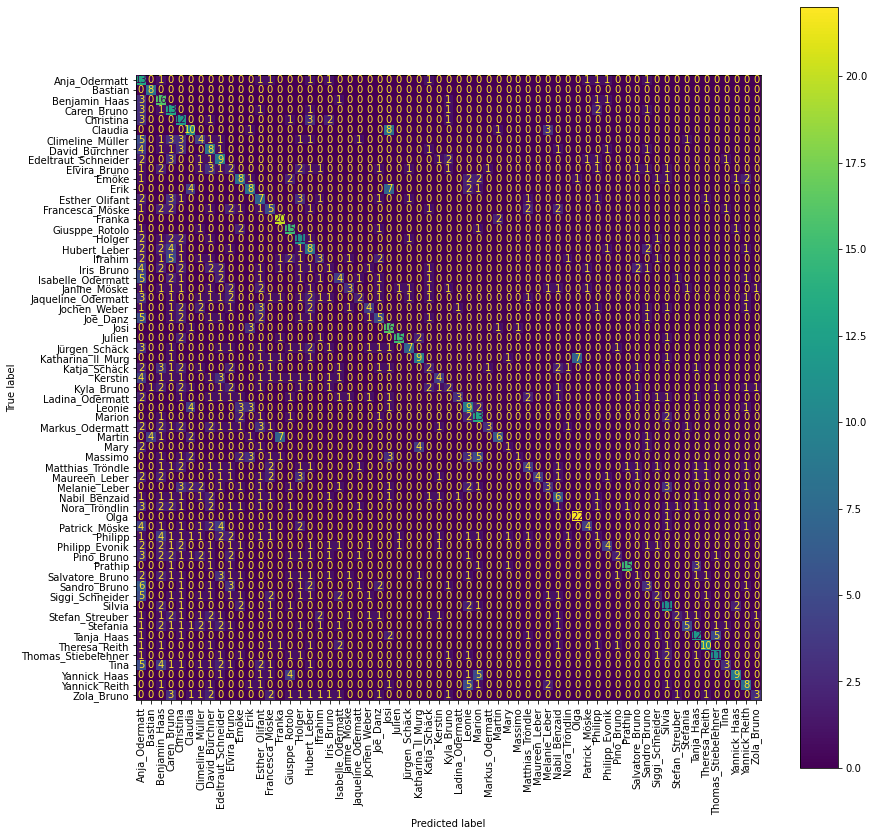

In [63]:
fig, ax = plt.subplots(figsize=(14, 14))

plot_confusion_matrix(grid,X_train, y_train, values_format='d', ax=ax , xticks_rotation="vertical")

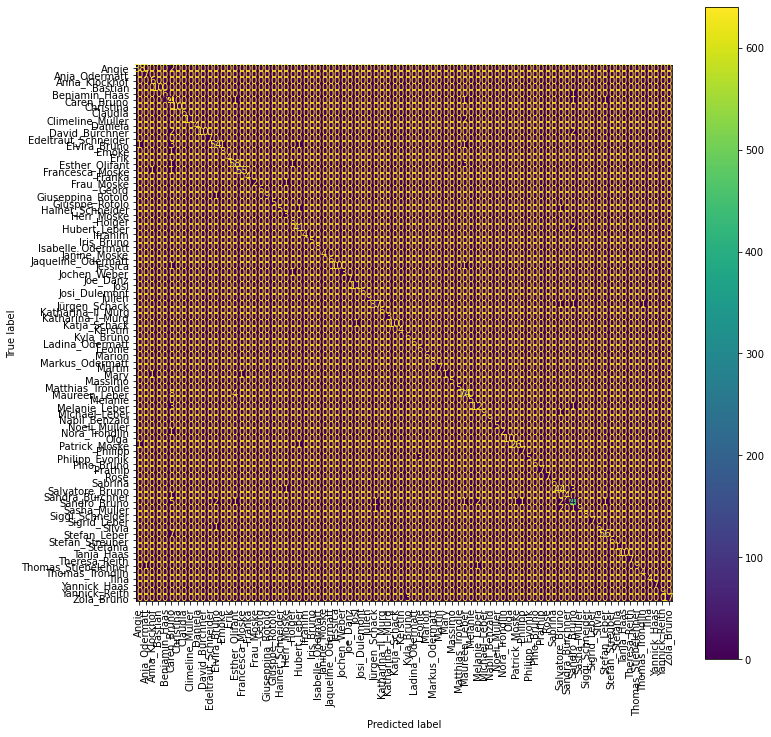

In [58]:
fig, ax = plt.subplots(figsize=(12, 12))

plot_confusion_matrix(grid,X_test, y_test,values_format='d', ax=ax, xticks_rotation="vertical" )

In [59]:
pd.DataFrame(list(y_test_pred), y_test).reset_index().apply(lambda x: x.loc["index"] == x.loc[0], axis=1).value_counts()

True     2045
False     105
dtype: int64

In [120]:
import json
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import logging
import sys

logger = logging.getLogger()
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s | %(levelname)s | %(message)s')

stdout_handler = logging.StreamHandler(sys.stdout)
stdout_handler.setLevel(logging.DEBUG)
stdout_handler.setFormatter(formatter)

file_handler = logging.FileHandler('logs.log')
file_handler.setLevel(logging.DEBUG)
file_handler.setFormatter(formatter)


logger.addHandler(file_handler)
logger.addHandler(stdout_handler)


def super_resolution(img, model="lapsrn", zoom=8):
    import cv2
    import os
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/superresolution_models/"
    # print(os.listdir(path))
    path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

    sr.readModel(path) 
    sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
    result = sr.upsample(img) # upscale the input image
    return result

def import_FaceNet(model_path='../dat/models/keras-facenet-h5/model.json', 
                   weight_path = '../dat/models/keras-facenet-h5/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
def img_to_encoding(img, path, FaceNet = import_FaceNet()): 
    import numpy as np
    from PIL import Image
    img = np.around(np.array(img) / 255.0, decimals=12)
    img = cv2.resize(img, (160,160)) 
    plt.imsave(path, img)
    x_train = np.expand_dims(img, axis=0)
    embedding = FaceNet.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)


def downsample_database(db ="/mnt/golem/frodo/Database/New_FaceDB.json", sizes=[24, 32, 40, 48, 64],
                       d = "/mnt/golem/frodo/clusteredFaces_lower_resolution/", model="espcn", up_zoom = 4):
    db = json.loads(open(db).read())
    resized = {}
    enc = []
    faces = []
    for name in tqdm(list(db.keys())[2:3]):
        Path(d + name).mkdir(parents=True, exist_ok=True)
        for zoom in sizes:
            pat = d + name + "/resolution_" + str(zoom) + "x" + str(zoom)
            # Check whether the specified path exists or not
            
            Path(pat).mkdir(parents=True, exist_ok=True)
            Path(pat + "/down").mkdir(parents=True, exist_ok=True)
            Path(pat + "/super_resolution").mkdir(parents=True, exist_ok=True)
            Path(pat + "/FaceNet_resolution").mkdir(parents=True, exist_ok=True)
            
            for p in db[name]["path_croped_pic"]:
                
                f = p.split("/")[-1].split(".")[0] + "_" + str(zoom) + "_" + model + str(up_zoom)
           
                if os.path.isfile(pat + "/FaceNet_resolution/" + f + "_FaceNet_input.png"):
                    print("[INFO] image exists already")
                    logger.info("[INFO] image exists already")
                    continue
                
                pic = plt.imread(p)
                dim = pic.shape
                
                
            
                if (zoom > dim[0]) | (zoom > dim[1]):
                    print("[INFO] image {} has lower resolution ({}) than {}".format(p, dim, zoom))
                    logger.info("[INFO] image {} has lower resolution ({}) than {}".format(p, dim, zoom))
                    continue 
                else:
#                     z1 = math.ceil(pic.shape[0]/zoom)
#                     z2 = math.ceil(pic.shape[1]/zoom)
                    z1 = zoom/pic.shape[0]
                    z2 = zoom/pic.shape[1]
                

#                 down = block_reduce(pic, block_size=(z1,z2,1), func=np.mean)
                try:
                    down = cv2.resize(pic, None, fx=z1, fy=z2, interpolation=cv2.INTER_AREA)

                    plt.imsave(pat + "/down/" + f +  "_" + "_downsampled.png", down)
                    
                except Exception as e:
                    
                    
                    print("[WARNING] {}".format(e))
                    logger.error(e)
                    logger.info(down[down > 1])
                    down[down > 1] = 1

#                     continue

 
                up = super_resolution(down*255, model, up_zoom)                  

                plt.imsave(pat + "/super_resolution/" + f + "_super_resolution.png", up)
                face = pat + "/FaceNet_resolution/" + f + "_FaceNet_input.png"
                    
                enc.append(img_to_encoding(up, FaceNet = import_FaceNet(), path= face).tolist())
                faces.append(face)
            

            resized[str(zoom)] = {name: {"encodings": enc,
                                    "path": faces 
                                   }
                            }

            if len(enc) > 0:
                if os.path.isfile(d + "/low_resoloution_FaceDB.json"):
                    RESIZED = json.loads(open(d + "/low_resoloution_FaceDB.json").read())
                    if str(zoom) not in RESIZED.keys():
                        RESIZED.update(resized)
                    else:
                        RESIZED[str(zoom)].update(resized[str(zoom)])
                    with open(d + "/low_resoloution_FaceDB.json", 'w') as fp:
                        json.dump(RESIZED, fp)                
                else:
                    with open(d + "/low_resoloution_FaceDB.json", 'w') as fp:
                        json.dump(resized, fp)

            enc = []
            faces = []
                    
            
import os
from pathlib import Path
import math

downsample_database()


  0%|                                                     | 0/1 [00:00<?, ?it/s]

[INFO] image exists already
2022-03-14 22:27:17,670 | INFO | [INFO] image exists already
2022-03-14 22:27:17,670 | INFO | [INFO] image exists already
2022-03-14 22:27:17,670 | INFO | [INFO] image exists already
2022-03-14 22:27:17,670 | INFO | [INFO] image exists already
2022-03-14 22:27:17,670 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,673 | INFO | [INFO] image exists already
2022-03-14 22:27:17,673 | INFO | [INFO] image exists already
2022-03-14 22:27:17,673 | INFO | [INFO] image exists already
2022-03-14 22:27:17,673 | INFO | [INFO] image exists already
2022-03-14 22:27:17,673 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,676 | INFO | [INFO] image exists already
2022-03-14 22:27:17,676 | INFO | [INFO] image exists already
2022-03-14 22:27:17,676 | INFO | [INFO] image exists already
2022-03-14 22:27:17,676 | INFO | [INFO] image exists already
2022-03-14 22:27:17,676 | INFO | [INFO] image exists already
[

2022-03-14 22:27:17,714 | INFO | [INFO] image exists already
2022-03-14 22:27:17,714 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,715 | INFO | [INFO] image exists already
2022-03-14 22:27:17,715 | INFO | [INFO] image exists already
2022-03-14 22:27:17,715 | INFO | [INFO] image exists already
2022-03-14 22:27:17,715 | INFO | [INFO] image exists already
2022-03-14 22:27:17,715 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,717 | INFO | [INFO] image exists already
2022-03-14 22:27:17,717 | INFO | [INFO] image exists already
2022-03-14 22:27:17,717 | INFO | [INFO] image exists already
2022-03-14 22:27:17,717 | INFO | [INFO] image exists already
2022-03-14 22:27:17,717 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,719 | INFO | [INFO] image exists already
2022-03-14 22:27:17,719 | INFO | [INFO] image exists already
2022-03-14 22:27:17,719 | INFO | [INFO] image exists already
2

2022-03-14 22:27:17,761 | INFO | [INFO] image exists already
2022-03-14 22:27:17,761 | INFO | [INFO] image exists already
2022-03-14 22:27:17,761 | INFO | [INFO] image exists already
2022-03-14 22:27:17,761 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,763 | INFO | [INFO] image exists already
2022-03-14 22:27:17,763 | INFO | [INFO] image exists already
2022-03-14 22:27:17,763 | INFO | [INFO] image exists already
2022-03-14 22:27:17,763 | INFO | [INFO] image exists already
2022-03-14 22:27:17,763 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,765 | INFO | [INFO] image exists already
2022-03-14 22:27:17,765 | INFO | [INFO] image exists already
2022-03-14 22:27:17,765 | INFO | [INFO] image exists already
2022-03-14 22:27:17,765 | INFO | [INFO] image exists already
2022-03-14 22:27:17,765 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,767 | INFO | [INFO] image exists already
2

[INFO] image exists already
2022-03-14 22:27:17,806 | INFO | [INFO] image exists already
2022-03-14 22:27:17,806 | INFO | [INFO] image exists already
2022-03-14 22:27:17,806 | INFO | [INFO] image exists already
2022-03-14 22:27:17,806 | INFO | [INFO] image exists already
2022-03-14 22:27:17,806 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,807 | INFO | [INFO] image exists already
2022-03-14 22:27:17,807 | INFO | [INFO] image exists already
2022-03-14 22:27:17,807 | INFO | [INFO] image exists already
2022-03-14 22:27:17,807 | INFO | [INFO] image exists already
2022-03-14 22:27:17,807 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,809 | INFO | [INFO] image exists already
2022-03-14 22:27:17,809 | INFO | [INFO] image exists already
2022-03-14 22:27:17,809 | INFO | [INFO] image exists already
2022-03-14 22:27:17,809 | INFO | [INFO] image exists already
2022-03-14 22:27:17,809 | INFO | [INFO] image exists already
[

2022-03-14 22:27:17,844 | INFO | [INFO] image exists already
2022-03-14 22:27:17,844 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,846 | INFO | [INFO] image exists already
2022-03-14 22:27:17,846 | INFO | [INFO] image exists already
2022-03-14 22:27:17,846 | INFO | [INFO] image exists already
2022-03-14 22:27:17,846 | INFO | [INFO] image exists already
2022-03-14 22:27:17,846 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,847 | INFO | [INFO] image exists already
2022-03-14 22:27:17,847 | INFO | [INFO] image exists already
2022-03-14 22:27:17,847 | INFO | [INFO] image exists already
2022-03-14 22:27:17,847 | INFO | [INFO] image exists already
2022-03-14 22:27:17,847 | INFO | [INFO] image exists already
[INFO] image exists already
2022-03-14 22:27:17,849 | INFO | [INFO] image exists already
2022-03-14 22:27:17,849 | INFO | [INFO] image exists already
2022-03-14 22:27:17,849 | INFO | [INFO] image exists already
2

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  4.96it/s]


In [2]:
# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np
# from itertools import chain
# import json
import tensorflow as tf
# import matplotlib.patches as patches
# from numpy.linalg import norm

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:# Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
# from mtcnn.mtcnn import MTCNN 

1 Physical GPUs, 1 Logical GPUs


2022-03-19 10:39:19.758592: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 10:39:19.784485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 10:39:19.784647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 10:39:19.785404: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [5]:
import time
print(time.sleep(10))

None


In [2]:
import tensorflow as tf
from mtcnn.mtcnn import MTCNN 

# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
        
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
MTCNN()

1 Physical GPUs, 1 Logical GPUs


In [10]:
pwd

'/home/brunosa3/projects/smart_surveillance/scr'

2304 1296
(1296, 2304)


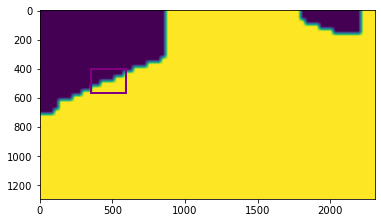

In [341]:
from skimage.transform import resize
with open("Reolink/log/Reolink_motion_alerts_Eingang.log", "r") as f: 
    lines = f.readlines()
for l in lines:
    if re.match(".*resolution.*",l):
        pat = re.match(".*resolution:\s+(\d+)\*(\d+).*",l)
        w = int(pat.group(1))
        h = int(pat.group(2))
        print(w,h)
    elif re.match(".*alarm area.*",l):
        pat = re.match(".*alarm.area.\((\d+),.(\d+)\):(\d+)",l)
        rows = int(pat.group(1))
        cols = int(pat.group(2))
        mask = pat.group(3)

        mask = resize(np.array([int(s) for s in mask]).reshape(cols,rows), (h,w))
        
        print(mask.shape)
        break

import matplotlib.pyplot as plt
plt.imshow(mask)
import matplotlib.patches as mpatches
rect=mpatches.Rectangle((350,400),240,170, 
                        fill = False,
                        color = "purple",
                        linewidth = 2)


plt.gca().add_patch(rect)

24.037037037037038

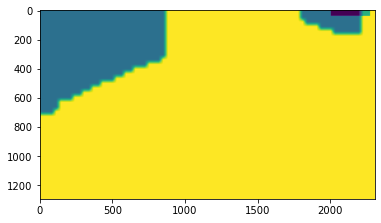

In [369]:
def in_or_out(mask, x1,y1,w,h):
    x2, y2 = (x1+w, y1+h) 
    rec = np.zeros(mask.shape)
    rec[y1:y2,x1:x2] = 100
    plt.imshow(rec) 
    mask *= (255.0/mask.max())
    test = (mask-rec)
    plt.imshow(test)
#     test2 = test
#     test2[int(y2*0.9):y2,x1:x2] = 0
    plt.imshow(test)
#     plt.imshow(test[int(y2*0.9):y2,x1:x2])
    return test[int(y2*0.9):y2,x1:x2].mean()

x1, y1, wi, hi = (2000,0,270,40)
in_or_out(mask,x1,y1,wi,hi)

(1296, 2304)


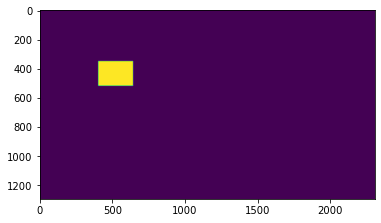

In [296]:
x1, y1, wi, hi = (350,400,170,240)
x2, y2 = x1 + wi, y1 + hi 
rec = np.zeros((h,w))
# rec = mask
print(rec.shape)
rec[x1:x2,y1:y2] = 255
plt.imshow(rec)

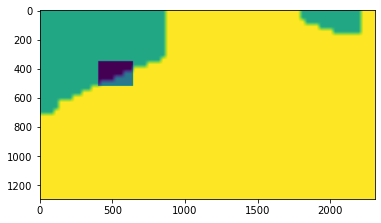

In [283]:
image=mask
image *= (255.0/image.max())
plt.imshow(image-rec)
test = (image-rec)


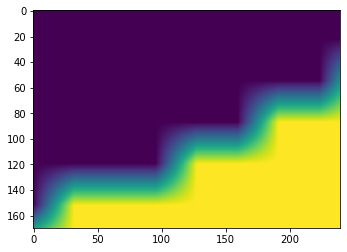

In [284]:
plt.imshow(test[x1:x2,y1:y2])

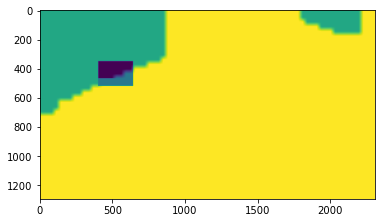

In [285]:
test[int(x2*0.9):x2,y1:y2] = 0
plt.imshow(test)

In [293]:
(image-rec)[int(x2*0.9):x2,y1:y2].sum(axis=1)

array([-19476.54320988, -19140.74074074, -18687.40740741, -18183.7037037 ,
       -17680.        , -17176.2962963 , -16672.59259259, -16168.88888889,
       -15665.18518519, -15161.48148148, -14657.77777778, -14154.07407407,
       -13650.37037037, -13146.66666667, -12642.96296296, -12139.25925926,
       -11635.55555556, -11131.85185185, -10628.14814815, -10124.44444444,
        -9620.74074074,  -9117.03703704,  -8613.33333333,  -8109.62962963,
        -7605.92592593,  -7102.22222222,  -6598.51851852,  -6094.81481481,
        -5591.11111111,  -5087.40740741,  -4583.7037037 ,  -4080.        ,
        -3576.2962963 ,  -3072.59259259,  -2694.81481481,  -2610.86419753,
        -2526.91358025,  -2442.96296296,  -2359.01234568,  -2275.0617284 ,
        -2191.11111111,  -2107.16049383,  -2023.20987654,  -1939.25925926,
        -1855.30864198,  -1771.35802469,  -1687.40740741,  -1603.45679012,
        -1519.50617284,  -1435.55555556,  -1351.60493827,  -1267.65432099])

In [267]:
x2

520

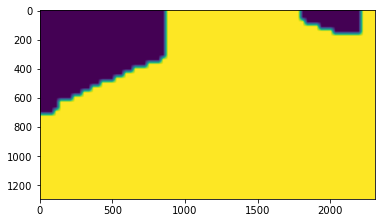

In [239]:
image=mask
image *= (255.0/image.max())
plt.imshow(image)

In [240]:
mask

array([[ 85.,  85.,  85., ..., 255., 255., 255.],
       [ 85.,  85.,  85., ..., 255., 255., 255.],
       [ 85.,  85.,  85., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [102]:
[int(s) for s in mask]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [97]:
[int(i) for i in '129380']

[1, 2, 9, 3, 8, 0]

In [57]:
import numpy as np
r = [re.match(".*\((.*)\):(\d+)", s) for s in head if re.match(".*alarm area.*", s)][0]
r.group(1), np.array([int(i) for i in  r.group(2)])

('72, 40', array([0, 0, 0, ..., 1, 1, 1]))

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path="FaceRecognition/FaceNet_input/Eingang/trackID_13/2022March19_16_06_16_Eingang16043_crop_track_13.png"

image = Image.open(image_path).convert('RGBA')
background = Image.new('RGBA', image.size, (255,255,255))
alpha_composite = Image.alpha_composite(background, image)
alpha_composite_3 = alpha_composite.convert('RGB')

pic = np.asarray(alpha_composite_3)

plt.imshow(pic)

FileNotFoundError: [Errno 2] No such file or directory: 'FaceRecognition/FaceNet_input/Eingang/trackID_13/2022March19_16_06_16_Eingang16043_crop_track_13.png'

In [ ]:
# Getting faces from Yolo4 DeepSort recognized

class FaceRecognition:
    def who_is_it(self, image_path, database,
                  model_path='../dat/models/keras-facenet-h5/model.json',
                  weight_path = '../dat/models/keras-facenet-h5/model.h5',
                 thr=0.75,
                 plot=False):
        import numpy as np
        import tensorflow as tf
        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """
        import json
        import matplotlib.patches as patches
        from numpy.linalg import norm

        # import the FaceNet model
        self.import_FaceNet(model_path=model_path, weight_path=weight_path)
        
        face = self.detect_face(image_path, plot=plot)
        
        if face is None:
            return None, "No face visible"

        face = self.resize(face, 160,160)
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)

        # Find the closest encoding 
        # Initialize "min_dist" to a large value, say 100
        min_dist = 100
        
#         database = json.loads(open(database).read())
        

        # Compute L2 distance between the target "encodings" and the current db_enc from the database.
        # note we compute multiple distances for a subject and pick the distance with the minimal distance

        db, names, len_db = self.load_database()
        db = np.vstack(list(db.values()))

        from itertools import chain
        r = [[i] *r for i, r in enumerate(len_db)]
        grp = list(chain(*r))
        
        a = np.hstack((db, np.array(grp).reshape(-1,1)))
        
        means = [np.median(m,axis=0) for m in np.split(a[:,:-1], np.unique(a[:, -1], return_index=True)[1][1:])]
#         print(len(means))
#         print(np.array(means).shape)
#         print(means)
        
        
        
#         db = norm(db-encoding, axis=1, ord=2)
        db = norm(means-encoding, axis=1, ord=2)
        
        

        
        ind = np.argmin(db)
        identity = names[ind]
        min_dist = db[ind]
        
        print(identity)
        # if any of the distances is higher than 0.75 we don t think the given face is represented in the database
        if min_dist > thr:
            identity = "stranger" 
            
        
        return min_dist, identity
    
    def import_FaceNet(self, model_path='../dat/models/keras-facenet-h5/model.json', 
                       weight_path = '../dat/models/keras-facenet-h5/model.h5'):

        from tensorflow.keras.models import model_from_json
        json_file = open(model_path, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        self.FaceNet = model_from_json(loaded_model_json)
        self.FaceNet.load_weights(weight_path)
    
    def img_to_encoding(self, img): 
        import numpy as np
        from PIL import Image
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def detect_face(self, image_path, plot=False):
        from mtcnn.mtcnn import MTCNN
        import numpy as np
        import matplotlib.pyplot as plt
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)

        plt.imshow(pic)
        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    #simple image scaling to (nR x nC) size
    def resize(self,im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def rep(self,x):
        return [x[0]] * x[1]

    def load_database(self, database="/mnt/golem/frodo/Database/New_FaceDB.json"):
        import numpy as np
        from itertools import chain
        import json
        db = json.loads(open(database).read())
        db = {k: np.vstack(v["encodings"]) for k,v in db.items()}
        len_db = list(map(len, list(db.values())))
        nest = list(map(self.rep, zip(list(db.keys()), len_db)))
        names = list(chain(*nest))

        return db, names, len_db
        
        

        
    


class FaceRecognition:
    def who_is_it(self, image_path, database,
                  model_path='../dat/models/keras-facenet-h5/model.json',
                  weight_path = '../dat/models/keras-facenet-h5/model.h5',
                 thr=0.75,
                 plot=False):
        import numpy as np
        import tensorflow as tf
        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """
        import json
        import matplotlib.patches as patches
        from numpy.linalg import norm

        # import the FaceNet model
        self.import_FaceNet(model_path=model_path, weight_path=weight_path)
        
        face = self.detect_face(image_path, plot=plot)
        
        if face is None:
            return None, "No face visible"

        face = self.resize(face, 160,160)
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)

        # Find the closest encoding 
        # Initialize "min_dist" to a large value, say 100
        min_dist = 100
        
#         database = json.loads(open(database).read())
        

        # Compute L2 distance between the target "encodings" and the current db_enc from the database.
        # note we compute multiple distances for a subject and pick the distance with the minimal distance

        db, names, len_db = self.load_database()
        db = np.vstack(list(db.values()))

        from itertools import chain
        r = [[i] *r for i, r in enumerate(len_db)]
        grp = list(chain(*r))
        
        a = np.hstack((db, np.array(grp).reshape(-1,1)))
        
        means = [np.median(m,axis=0) for m in np.split(a[:,:-1], np.unique(a[:, -1], return_index=True)[1][1:])]
#         print(len(means))
#         print(np.array(means).shape)
#         print(means)
        
        
        
#         db = norm(db-encoding, axis=1, ord=2)
        db = norm(means-encoding, axis=1, ord=2)
        
        

        
        ind = np.argmin(db)
        identity = names[ind]
        min_dist = db[ind]
        
        print(identity)
        # if any of the distances is higher than 0.75 we don t think the given face is represented in the database
        if min_dist > thr:
            identity = "stranger" 
            
        
        return min_dist, identity
    
    def import_FaceNet(self, model_path='../dat/models/keras-facenet-h5/model.json', 
                       weight_path = '../dat/models/keras-facenet-h5/model.h5'):

        from tensorflow.keras.models import model_from_json
        json_file = open(model_path, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        self.FaceNet = model_from_json(loaded_model_json)
        self.FaceNet.load_weights(weight_path)
    
    def img_to_encoding(self, img): 
        import numpy as np
        from PIL import Image
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def detect_face(self, image_path, plot=False):
        from mtcnn.mtcnn import MTCNN
        import numpy as np
        import matplotlib.pyplot as plt
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)

        plt.imshow(pic)
        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    #simple image scaling to (nR x nC) size
    def resize(self,im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def rep(self,x):
        return [x[0]] * x[1]

    def load_database(self, database="/mnt/golem/frodo/Database/New_FaceDB.json"):
        import numpy as np
        from itertools import chain
        import json
        db = json.loads(open(database).read())
        db = {k: np.vstack(v["encodings"]) for k,v in db.items()}
        len_db = list(map(len, list(db.values())))
        nest = list(map(self.rep, zip(list(db.keys()), len_db)))
        names = list(chain(*nest))

        return db, names, len_db
        
        

        
    


from itertools import chain
rep = [10,2,5]
r = [[i] *r for i, r in enumerate(rep)]
list(chain(*r))

a =  np.array([
    [1,2,3,4],
    [10,20,30,40],
    [100,200,300,400],
    [1000,2000,3000,4000]
])
a = np.hstack((a, np.array([100,100,400,400]).reshape(-1,1)))
print(a)

[m.mean(axis=0) for m in np.split(a[:,:4], np.unique(a[:, 4], return_index=True)[1][1:])]



import os
import random
path = "/mnt/golem/Photos/Sandro_externe_Festplatte/Brasilien 2013/"
face=random.sample(os.listdir(path), 1)[0]

FACE = path + face
print(FACE)
FaceRecognition().who_is_it(FACE, database="/mnt/golem/frodo/Database/New_FaceDB.json",thr=0.7, plot=True)


%timeit FaceRecognition().who_is_it(FACE, database="/mnt/golem/frodo/Database/New_FaceDB.json", plot=False)

import os
import random
path = "/mnt/golem/Photos/Sandro_externe_Festplatte/Brasilien 2013/"
face=random.sample(os.listdir(path), 1)[0]

FACE = path + face
print(FACE)
FaceRecognition().who_is_it(FACE, database="/mnt/golem/frodo/Database/New_FaceDB.json",thr=0.7, plot=True)


## descriptive analysis of cropped images from 1day recordings
### How big are the people detected on the cameras and how big are the faces


here we try to get some face examples of the snaps to see if it might be possible to detect and recognize people on such images

from mtcnn.mtcnn import MTCNN
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

# here we take some random snaps and try to detect faces
def catch_faces():
    b = 0
    FACES = []


    while True:
        cam = random.sample(["Terrasse/", "Carport/", "Eingang/"], 1)[0]
        path = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/" + cam

        try:
            face=random.sample(os.listdir(path), 1)[0]
        except Exception as e:
            print(e)

        FACE = [path + face + "/" + snap for snap in os.listdir(path + face)]
        n = 30
        if len(FACE) > n:
            FACE = FACE[:n]
        for image_path in FACE:

            if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
                try:
                    image = Image.open(image_path).convert('RGBA')
                    background = Image.new('RGBA', image.size, (255,255,255))
                    alpha_composite = Image.alpha_composite(background, image)
                    alpha_composite_3 = alpha_composite.convert('RGB')

                except Exception as e:
                    print(e)


                pic = np.asarray(alpha_composite_3)
            else:
                pic = plt.imread(image_path)

            detector = MTCNN()
            faces = detector.detect_faces(pic)
            if len(faces) > 0:
                print(faces[0]["box"])
                FACES.append(image_path)
                print(b)            
                if b == 3:
                    return FACES
                    break
                b += 1

FACES += catch_faces()

    
    
    

# check if we can use these images with our FaceRecognition algorythm
import os
import random
# cam = random.sample(["Terrasse/", "Carport/", "Eingang/"], 1)[0]
# path = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/" + cam
# face=random.sample(os.listdir(path), 1)[0]
# print(face)

# FACE = [path + face + "/" + snap for snap in os.listdir(path + face)]
# n = 30
# if len(FACE) > n:
#     FACE = FACE[:n]
# # FACE ="/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_268/2022March11_15_45_10_Terrasse497485_crop_track_268.png"
# # FACE = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_476/2022March11_17_24_23_Terrasse557104_crop_track_476.png"
# # FACE = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_489/2022March11_17_31_42_Terrasse561505_crop_track_489.png"
# # FACE = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/Carport/trackID_605/2022March11_17_27_11_Carport557920_crop_track_605.png"
# # FACE = "/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_323/2022March11_16_19_58_Terrasse518389_crop_track_323.png"
# FACE = '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Carport/trackID_91/2022March11_09_13_24_Carport261169_crop_track_91.png',
# FACE = '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Carport/trackID_568/2022March11_16_56_49_Carport539671_crop_track_568.png',
# FACE = '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Carport/trackID_425/2022March11_16_13_46_Carport513796_crop_track_425.png',
# FACE =  '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_268/2022March11_15_45_10_Terrasse497485_crop_track_268.png',
# FACE = '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Carport/trackID_418/2022March11_16_11_21_Carport512347_crop_track_418.png',
# FACE =  '/mnt/golem/frodo/smart_surveillance/FaceNet_input/Terrasse/trackID_444/2022March11_16_49_06_Terrasse535906_crop_track_444.png'
FACE = FACES[-1]
print(FACE)
for f in [FACE]:
    dist, ident = FaceRecognition().who_is_it(f, database="/mnt/golem/frodo/Database/New_FaceDB.json",thr=0.7, plot=True)
    print(dist, ident)

as one can see the snap has very low resolution - Howver, its just one example lets check all of the snapped faces to get the overall overview

from tqdm import tqdm
import os

# get all the paths to the snapped faces
path = "smart_surveillance/FaceNet_input/"

pictures = [os.path.join(root, name) 
            for root, dirs, files in tqdm(os.walk(path))
            for name in files
            if name.endswith((tuple(i for i in ".png")))]
len(pictures)

import matplotlib.pyplot as plt
import numpy as np

# check the distribution of width and height (=resolution) of the detected persons
dim = [plt.imread(pic).shape for pic in pictures]
print("There are {} snapped persons".format(len(dim)))

# get mean of width height and colourchannels
np.array(dim).mean(axis=0)

import seaborn as sns
import pandas as pd

# show distribution of the thre different cameras
DIM = pd.DataFrame(dim, columns=["height", "width", "colorchannels"])
DIM["cam"] = [pic.split("/")[-3] for pic in pictures ]
ylim = [0,0.03]

width = sns.displot(DIM, x="width", hue="cam", kind="kde", fill=True,  legend=True)
width.set(ylim=ylim)

medians = DIM.groupby(['cam'])['width'].median()

min_ylim, max_ylim = ylim
plt.text(medians[0]*0.5, max_ylim*0.75, 'Mean:\n{:.2f}'.format(medians[0]))
plt.text(medians[1]*0.5, max_ylim*0.25, 'Mean:\n{:.2f}'.format(medians[1]))
plt.text(medians[2]*0.5, max_ylim*0.1, 'Mean:\n{:.2f}'.format(medians[2]))


ylim = [0,0.02]

height = sns.displot(DIM, x="height", hue="cam", kind="kde", fill=True)
height.set(ylim=ylim)

medians = DIM.groupby(['cam'])['height'].median()

min_ylim, max_ylim = ylim
plt.text(medians[0]*0.5, max_ylim*0.7, 'Median:\n{:.2f}'.format(medians[0]))
plt.text(medians[1]*0.5, max_ylim*0.3, 'Median:\n{:.2f}'.format(medians[1]))
plt.text(medians[2]*0.5, max_ylim*0.08, 'Median:\n{:.2f}'.format(medians[2]))

# rirst we need to import and restructure the png files
from PIL import Image
pics = []
for p in tqdm(pictures):
    image = Image.open(p).convert('RGBA')
    background = Image.new('RGBA', image.size, (255,255,255))
    alpha_composite = Image.alpha_composite(background, image)
    alpha_composite_3 = alpha_composite.convert('RGB')

    pics.append(np.asarray(alpha_composite_3))


# then we need to detect all the faces
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
detect = [detector.detect_faces(pic) for pic in tqdm(pics)]

# check number of detected faces
boxes = [dect[0]["box"] + [c] + [pic]  for dect, c, pic in zip(detect, DIM.cam.tolist(), pictures) if len(dect) > 0]
"from these {} snapped person we could detect only {} faces".format(len(pictures), len(boxes))


import seaborn as sns
import pandas as pd

faces = pd.DataFrame(boxes, columns=["x", "y", "width", "height", "cam", "image_path"])

ylim = [0,0.05]

width = sns.displot(faces, x="width", hue="cam", kind="kde", fill=True)
width.set(ylim=ylim)

medians = faces.groupby(['cam'])['width'].median()

min_ylim, max_ylim = ylim
plt.text(medians[0]*0.5, max_ylim*0.9, 'Mean:\n{:.2f}'.format(medians[0]))
plt.text(medians[1]*0.5, max_ylim*0.25, 'Mean:\n{:.2f}'.format(medians[1]))
plt.text(medians[2]*0.5, max_ylim*0.07, 'Mean:\n{:.2f}'.format(medians[2]))


ylim = [0,0.04]

height = sns.displot(faces, x="height", hue="cam", kind="kde", fill=True)
height.set(ylim=ylim)

medians = faces.groupby(['cam'])['height'].median()

min_ylim, max_ylim = ylim
plt.text(medians[0]*0.5, max_ylim*0.9, 'Median:\n{:.2f}'.format(medians[0]))
plt.text(medians[1]*0.5, max_ylim*0.3, 'Median:\n{:.2f}'.format(medians[1]))
plt.text(medians[2]*0.5, max_ylim*0.05, 'Median:\n{:.2f}'.format(medians[2]))

faces.to_csv("snapped_faces.csv")

import pandas as pd
faces = pd.read_csv("snapped_faces.csv")
faces.head()

# 24 × 24, 32 × 32, 40 × 40, 48 × 48, 64×64
faces.groupby("cam").quantile([ i/10 for i in range(11)]).loc[:,["width", "height"]]

import json
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import logging
import sys

logger = logging.getLogger()
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s | %(levelname)s | %(message)s')

stdout_handler = logging.StreamHandler(sys.stdout)
stdout_handler.setLevel(logging.DEBUG)
stdout_handler.setFormatter(formatter)

file_handler = logging.FileHandler('logs.log')
file_handler.setLevel(logging.DEBUG)
file_handler.setFormatter(formatter)


logger.addHandler(file_handler)
logger.addHandler(stdout_handler)


def super_resolution(img, model="lapsrn", zoom=8):
    import cv2
    import os
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/superresolution_models/"
    # print(os.listdir(path))
    path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

    sr.readModel(path) 
    sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
    result = sr.upsample(img) # upscale the input image
    return result

def import_FaceNet(model_path='../dat/models/keras-facenet-h5/model.json', 
                   weight_path = '../dat/models/keras-facenet-h5/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
def img_to_encoding(img, path, FaceNet = import_FaceNet()): 
    import numpy as np
    from PIL import Image
    img = np.around(np.array(img) / 255.0, decimals=12)
    img = cv2.resize(img, (160,160)) 
    plt.imsave(path, img)
    x_train = np.expand_dims(img, axis=0)
    embedding = FaceNet.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)


def downsample_database(db ="/mnt/golem/frodo/Database/New_FaceDB.json", sizes=[24, 32, 40, 48, 64],
                       d = "/mnt/golem/frodo/clusteredFaces_lower_resolution/", model="espcn", up_zoom = 4):
    db = json.loads(open(db).read())
    resized = {}
    enc = []
    faces = []
    for name in tqdm(db.keys()):
        Path(d + name).mkdir(parents=True, exist_ok=True)
        for zoom in sizes:
            pat = d + name + "/resolution_" + str(zoom) + "x" + str(zoom)
            # Check whether the specified path exists or not
            
            Path(pat).mkdir(parents=True, exist_ok=True)
            Path(pat + "/down").mkdir(parents=True, exist_ok=True)
            Path(pat + "/super_resolution").mkdir(parents=True, exist_ok=True)
            Path(pat + "/FaceNet_resolution").mkdir(parents=True, exist_ok=True)
            
            for p in db[name]["path_croped_pic"]:
                
                f = p.split("/")[-1].split(".")[0] + "_" + str(zoom) + "_" + model + str(up_zoom)
           
                if os.path.isfile(pat + "/FaceNet_resolution/" + f + "_FaceNet_input.png"):
                    print("[INFO] image exists already")
                    logger.info("[INFO] image exists already")
                    continue
                
                pic = plt.imread(p)
                dim = pic.shape
                
                
            
                if (zoom > dim[0]) | (zoom > dim[1]):
                    print("[INFO] image {} has lower resolution ({}) than {}".format(p, dim, zoom))
                    logger.info("[INFO] image {} has lower resolution ({}) than {}".format(p, dim, zoom))
                    continue 
                else:
#                     z1 = math.ceil(pic.shape[0]/zoom)
#                     z2 = math.ceil(pic.shape[1]/zoom)
                    z1 = zoom/pic.shape[0]
                    z2 = zoom/pic.shape[1]
                

#                 down = block_reduce(pic, block_size=(z1,z2,1), func=np.mean)
                try:
                    down = cv2.resize(pic, None, fx=z1, fy=z2, interpolation=cv2.INTER_AREA)

                    plt.imsave(pat + "/down/" + f +  "_" + "_downsampled.png", down)
                    
                except Exception as e:
                    
                    
                    print("[WARNING] {}".format(e))
                    logger.error(e)
                    logger.info(down[down > 1])
                    down[down > 1] = 1

#                     continue

 
                up = super_resolution(down*255, model, up_zoom)                  

                plt.imsave(pat + "/super_resolution/" + f + "_super_resolution.png", up)
                face = pat + "/FaceNet_resolution/" + f + "_FaceNet_input.png"
                    
                enc.append(img_to_encoding(up, FaceNet = import_FaceNet(), path= face).tolist())
                faces.append(face)
            

            resized[zoom] = {name: {"encodings": enc,
                                    "path": faces 
                                   }
                            }
            enc = []
            faces = []
            
           
            if os.path.isfile(d + "/low_resoloution_FaceDB.json"):
                resizED = json.loads(open(d + "/low_resoloution_FaceDB.json").read())
                resizED.update(resized)
                resized = resizED
                with open(d + "/low_resoloution_FaceDB.json", 'w') as fp:
                    json.dump(resized, fp)                
            else:
                with open(d + "/low_resoloution_FaceDB.json", 'w') as fp:
                    json.dump(resized, fp)

        
            
import os
from pathlib import Path
import math

downsample_database()


The faces are defnetly of extremly low resolution - we need to use super resolution techniques to get bigger faces with sharper sapes and we need to remap our face database to bring the features of the faces on the same plane

## Super resolution step increase quality of images

import cv2
import matplotlib.pyplot as plt
face = faces.image_path[22]
# Read image
pic = cv2.imread(face)
plt.imshow(pic[:,:,::-1])
plt.show()

https://learnopencv.com/super-resolution-in-opencv/

from skimage.measure import block_reduce

z1 = int(len(pic)/24)
z2 = int(pic.shape[1]/24)

down = block_reduce(pic, block_size=(z1,z2,1), func=np.mean)
print(down.shape)
result = super_resolution(down*255, "espcn",4)

plt.figure(figsize=(12,8))
plt.subplot(1,7,1)
# Original image
plt.imshow(pic)
plt.subplot(1,7,1)

# OpenCV upscaled
plt.imshow(down)
plt.subplot(1,7,2)

# OpenCV upscaled
plt.imshow(cv2.resize(down,dsize=(160,160)))
plt.subplot(1,7,3)

# SR upscaled
plt.imshow(result)
plt.subplot(1,7,4)

# OpenCV upscaled
plt.imshow(cv2.resize(result,dsize=(160,160)))
plt.subplot(1,7,5)



# OpenCV upscaled
plt.imshow(cv2.resize(pic, None, fx=24/len(pic), fy=24/len(pic), interpolation=cv2.INTER_AREA))
plt.subplot(1,7,6)
print(cv2.resize(pic, None, fx=24/len(pic), fy=24/len(pic), interpolation=cv2.INTER_AREA).shape)
plt.imshow(cv2.resize(cv2.resize(pic, None, fx=24/len(pic), fy=24/len(pic), interpolation=cv2.INTER_AREA),dsize=(160,160)))
plt.subplot(1,7,7)
plt.show()




def super_resolution(img, model="lapsrn", zoom=8):
    import cv2
    import os
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/superresolution_models/"
    # print(os.listdir(path))
    path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

    sr.readModel(path) 
    sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
    result = sr.upsample(img) # upscale the input image
    print(img.shape)
    print(result.shape)
    return result

zoom = 8
model = "lapsrn"

result = super_resolution(img, model=model, zoom=zoom)

# Resized image
resized = cv2.resize(img,dsize=None,fx=zoom,fy=zoom)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()

plt.imsave('/mnt/golem/frodo/resized4.png', resized[:,:,::-1])
plt.imsave('/mnt/golem/frodo/espn4.png', result[:,:,::-1])

FaceRecognition().who_is_it(faces.image_path[204], 
                                          database="/mnt/golem/frodo/Database/New_FaceDB.json",
                                          thr=0.7, plot=True)

FaceRecognition().who_is_it('/mnt/golem/frodo/espn4.png', 
                                          database="/mnt/golem/frodo/Database/New_FaceDB.json",
                                          thr=0.7, plot=True)

FaceRecognition().who_is_it('/mnt/golem/frodo/resized4.png', 
                                          database="/mnt/golem/frodo/Database/New_FaceDB.json",
                                          thr=0.7, plot=True)





a = {"24":{"Sandro": {"encoding": [1,2,3,4,5],
                 "path": "okdojokd"}}}

a["24"].update({"Olga": {"encoding": [1,2,3,4,5],
                 "path": "okdojokd"}})

a

import os
import json
path = "/mnt/golem/frodo/clusteredFaces_lower_resolution/"
databases = [path + i for i in os.listdir(path) if ".json" in i]

db = json.loads(open(databases[0]).read())

for d in databases:
    print(d)
    db2 = json.loads(open(d).read())
    res = list(db2.keys())
    for r in res:
        print(r)
        names = list(db2[r].keys())
        for n in names:
            if (n not in db[r].keys()):
                db[r].update({n: db2[r][n] })
                
            elif (db[r][n]["encodings"]==[]):  
                db[r][n].update({n: db2[r][n] })
                

len(db), len(db["24"].keys()), len(db["32"].keys()), len(db["40"].keys()), len(db["48"].keys()), len(db["64"].keys())
    

with open("/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json", 'w') as fp:
            json.dump(db, fp) 

import json
db = json.loads(open("/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json").read())
len(db), len(db["24"].keys()), len(db["32"].keys()), len(db["40"].keys()), len(db["48"].keys()), len(db["64"].keys())


# import numpy as np

# {k: np.vstack(v["encodings"]) for k,v in db["24"].items()}

from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from itertools import chain
import json
import tensorflow as tf
import matplotlib.patches as patches
from numpy.linalg import norm

class FaceRecognition:
    def who_is_it(self, image_path, FaceNet, clf, thr=0.75, plot=False,res_model="espcn", zoom=4):

        """
        Implements face recognition for the office by finding who is the person on the image_path image.
        
        ...
        
        Parameter
        -------
        image_path : str
            path to an image
        
        database : dic 
            database containing image encodings along with the name of the person on the image as key
        
        ...
        
        Output
        -------
            min_dist : float
                the minimum distance between image_path encoding and the encodings from the database
            identity : str
                the name prediction for the person on image_path
            model_path : str
                path to the FaceNet config file path
            weight_path : str
                path to the FaceNet weight file path
        """

        # import the FaceNet model
        self.FaceNet = FaceNet
        
        # detect faces
        face = self.detect_face(image_path=image_path, res_model= res_model, zoom=zoom, plot=plot)
#         print(face.shape)

        if face is None:
            return None, "No face visible"
        plt.imshow(face)
        resolution = int(len(face)/zoom)
        print("resolution of face {}".format(resolution))
        
        from skimage.transform import resize

        face = resize(face, (160, 160, 3))
#         face = self.resize(face[:,:,0], 160, 160)
        
        # Compute the target "encoding" for the image
        encoding =  self.img_to_encoding(face)

        # Find the closest encoding 
        # Initialize "min_dist" to a large value, say 100
#         min_dist = 100
        
#         database = json.loads(open(database).read())
        

        # Compute L2 distance between the target "encodings" and the current db_enc from the database.
        # note we compute multiple distances for a subject and pick the distance with the minimal distance
        
        
#         arr = database
#         res = self.find_nearest([int(k) for k in arr.keys()], resolution)
#         X,y = arr[res]

        res = self.find_nearest([int(k) for k in clf.keys()], resolution)
        print("nearest resolution {}".format(res))
        proba = clf[res].predict_proba(encoding.reshape(1,-1))[0]

        ind = np.where(proba>=thr) 

        if ind != []:
            identity = clf[res].classes_[ind]
            min_dist = proba[ind] 
        else:
            identiy = "unknwon"
            min_dist = None
            
        
        return min_dist, identity
    
 
    
    def img_to_encoding(self, img): 
        img = np.around(np.array(img) / 255.0, decimals=12)
#         img = img.resize((160,160), Image.NEAREST)        
        x_train = np.expand_dims(img, axis=0)
        embedding = self.FaceNet.predict_on_batch(x_train)
        return embedding / np.linalg.norm(embedding, ord=2)
    
    def super_resolution(self, img, model="lapsrn", zoom=8):
        import cv2
        import os
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/superresolution_models/"
        # print(os.listdir(path))
        path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

        sr.readModel(path) 
        sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
        result = sr.upsample(img) # upscale the input image
        return result
    
    def detect_face(self, image_path,  res_model, zoom, plot=False):
        from PIL import Image

        if image_path.split(".")[-1].lower() == "png":
            # png have 4 channels R,G,B and alpha for transparency --> here we get rid of the aloha/transperency channel
            try:
                image = Image.open(image_path).convert('RGBA')
                background = Image.new('RGBA', image.size, (255,255,255))
                alpha_composite = Image.alpha_composite(background, image)
                alpha_composite_3 = alpha_composite.convert('RGB')
                
                pic = np.asarray(alpha_composite_3)

            except Exception as e:
                print("[WARNING] there was an error in this image {} - maybe it is truncated?".format(image_path))
                print(e)
                return None

            
        else:
            pic = plt.imread(image_path)
            
        pic = self.super_resolution(pic, model=res_model, zoom=zoom)

        dim = pic.shape
        # create/initiate the detector, using default weights
        detector = MTCNN()
        
        # detct the face
        try:
            faces = detector.detect_faces(pic)
        except Exception as e:
            print(e)
            
        if len(faces) == 0:
            return None
        if len(faces) >= 1:
            
            print("[INFO] {} faces detected!!!".format(len(faces)))
            
            ind = np.argmax([faces[i]["confidence"] for i in range(len(faces))])
            faces = faces[ind]
            print(faces["box"])
            
        
         # get coordinates of detected face 
        x1, y1, width, height = faces['box']
        x2, y2 = x1 + width, y1 + height

        # recenter the detected rectangle around the face
        circles = faces['keypoints'].values() # rember keypoints contain dic of landmarks in format of tuple(x,y)
        center = (sum(k[0] for k in circles)/len(circles), sum(k[1] for k in circles)/len(circles))


        ### adjust the ratio of the rectangle towards the longer side of height and width
        ### remember input for FaceNet is 160x160 as we don t want to deform the face by resizing it
        ### we recenter the rectangle and keep same side size                
        # determine the longer side of width and height
        MAX = int(np.max([width, height]))
        x1, x2, y1, y2 = (int(center[0]-MAX/2), int(center[0]+MAX/2), int(center[1]-MAX/2), int(center[1]+MAX/2))

        # check for the cases that we go out of the image with the new rectangle

        # in case we go out of the left side of the image
        if x1 < 0: 
            # add the part which was over the left side and add it to the right side of the rectangle
            x2 += x1*-1
            # set the left point to the border of the left side of the image
            x1 = 0
        # in case we go out of the right side of the image
        if x2 > dim[1]:
            # add the part which was over the right side and add it to the left side of the rectangle
            x1 -= x2-dim[1]
            # set the right point to the border of the right side of the image
            x2 = dim[1]
        # in case we go out of the top side of the image
        if y1 < 0:    
            # add the part which was over the top part and add it to the bottom part of the rectangle
            y2 += y1*-1
            # set the top point to the boarder of the top part of the image
            y1 = 0
        # in case we go out of the bottom part of the image
        if y2 > dim[0]:
            # add the part which was over the bottom part and add it to the top part of the rectangle
            y1 -= y2-dim[0]
            # set the bottom point to the boarder of the bottom part of the image
            y2 = dim[0]
            
        if plot:
            
            import matplotlib.patches as patches
            from PIL import Image

            im = Image.open(image_path)

            # Create figure and axes
            fig, ax = plt.subplots()

            # Display the image
            ax.imshow(im)

            # Create a Rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            plt.show()

            plt.imshow(pic[y1:y2, x1:x2])


        # crop the face out of the image 
        return pic[y1:y2, x1:x2]
    
    def resize(self, im, nR, nC):
        nR0 = len(im)     # source number of rows 
        nC0 = len(im[0])  # source number of columns 
        return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  for c in range(nC)] for r in range(nR)]
    
    def find_nearest(self, array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return str(array[idx])


def import_FaceNet(model_path='../dat/models/keras-facenet-h5/model.json', 
                   weight_path = '../dat/models/keras-facenet-h5/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
    #simple image scaling to (nR x nC) size
    




import joblib    
clf = joblib.load('smart_surveillance/KNN.json')
fn = import_FaceNet()
import random
import os
import matplotlib.pyplot
path = "smart_surveillance/FaceNet_input/Video/trackID_13/"# "smart_surveillance/FaceNet_input/Video/trackID_11/"
files= os.listdir(path)

file = path + random.sample(files,1)[0]
FaceRecognition().who_is_it(image_path=file, 
                            thr=0.55, plot=False, FaceNet=fn, clf=clf,
                 res_model="espcn", zoom=4)



img=plt.imread(file)
plt.imshow(img)

import json
import numpy as np
from itertools import chain
def rep(x):
    return [x[0]] * x[1]

def load_database(database="/mnt/golem/frodo/clusteredFaces_lower_resolution/final_low_resoloution_FaceDB.json"):

    db = json.loads(open(database).read())
    res = list(db.keys())
    
    db2 = {res[0]: {k: np.vstack(v["encodings"]) for k,v in db[res[0]].items()}}
    len_db = {res[0]: list(map(len, list(db2[res[0]].values())))}
    nest = {res[0]: list(map(rep, zip(list(db2[res[0]].keys()), len_db[res[0]])))}
    names = {res[0]: list(chain(*nest[res[0]]))}

    for r in res[1:]:
        db2.update({r: {k: np.vstack(v["encodings"]) for k,v in db[r].items()}})
        len_db.update({r: list(map(len, list(db2[r].values())))})
        nest.update({r: list(map(rep, zip(list(db2[r].keys()), len_db[r])))})
        names.update({r: list(chain(*nest[r]))})
    
    arr = {k: (np.vstack(list(v.values())), names[k]) for k,v in db2.items()}
    
    return arr

arr = load_database()

import itertools
db_orig = json.loads(open("/mnt/golem/frodo/Database/New_FaceDB.json").read()) 
X_orig = {k: np.vstack(v["encodings"]) for k,v in db_orig.items()}

rep= list(map(len, list(X_orig.values())))
names=list(X_orig.keys())

y= list(itertools.chain(*[r*[n] for r,n, in zip(rep,names)]))


from collections import Counter
import numpy as np
import random
length = dict(Counter(y))

# X,y = arr["64"]
X = np.vstack(X_orig.values())

smpl = 30
X_new = np.zeros(128).reshape(1,-1)
y_new = []
prev, cum = (0,0)
for i,it in enumerate(length.items()):
    k,v = it
    cum += v
    if cum-i*prev < smpl:
        X_new = np.vstack((X_new, X[i*prev:cum,:]))
        y_new += [k]*(cum-i*prev)
    else:
        X_new = np.vstack((X_new, np.array(random.sample(X[i*prev:cum,:].tolist(), smpl))))
        y_new += [k]*smpl
    prev = v

X_new = np.delete(X_new, (0), axis=0)
print(X_new.shape, len(y_new))

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new,
                                                    stratify=y_new, 
                                                    test_size=0.25)

print(X_train.shape, X_test.shape)

knn = KNeighborsClassifier()

k_range = list(range(3, 31, 2))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

best_knn = grid_search.best_params_
print(best_knn)

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

knn = KNeighborsClassifier(n_neighbors=3)#best_knn["n_neighbors"])
knn.fit(X_new,y_new)
ind = random.sample(list(range(len(X))),1)[0]
print(ind)
print(X[ind,:].shape)
proba = knn.predict_proba(X[ind,].reshape(1,-1))
print(y[ind])
print(knn.classes_[np.argmax(proba)])
print(proba)
# import matplotlib.pyplot as plt
# np.sum([0 if k ==  y[ind] else v for k,v in length.items() ])
# pic = plt.imread(db["64"][y[ind]]["path"][])
# plt.imshow(pic)
# np.where(proba>0.6)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

for r in arr.keys():
    X,y = arr[str(r)]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.25)

    print(X_train.shape, X_test.shape)

    knn = KNeighborsClassifier()

    k_range = list(range(3, 31, 2))
    param_grid = dict(n_neighbors=k_range)

    # defining parameter range
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

    # fitting the model for grid search
    grid_search=grid.fit(X_train, y_train)

    best_knn = grid_search.best_params_
    print(best_knn)

    accuracy = grid_search.best_score_ *100
    print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

X, y = arr["24"]
X.shape, len(y)

import json
import numpy as np

db ="/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB.json"
db = json.loads(open(db).read())
db ="/mnt/golem/frodo/clusteredFaces_lower_resolution/low_resoloution_FaceDB.json"
db = json.loads(open(db).read())

len(db["40"])
# {k: np.vstack(v["encodings"]) for k,v in db["24"].items()}


import json
import numpy as np

db32 = {k: np.vstack(v["encodings"]) for k,v in db["32"].items()}
# print(len(db24))
# db["40"].keys()

import itertools

rep= list(map(len, list(db32.values())))
names=list(db32.keys())

y= list(itertools.chain(*[r*[n] for r,n, in zip(rep,names)]))

# X = np.corrcoef(np.vstack(db24.values()))
X = np.vstack(db32.values())
print(X.shape, len(y))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

print(X_train.shape, X_test.shape)

clf = {}
for r in arr.keys():    
    X, y = arr[r]
#     import random

    knn = KNeighborsClassifier(n_neighbors=3)
    clf[r] = knn.fit(X,y)

# from sklearn.external import joblib
import joblib
joblib.dump(clf, 'smart_surveillance/KNN.json')


#     print(X[299,:].shape)
#     proba = knn.fit(X, y).predict_proba(np.array(random.sample(range(128), 128)).reshape(1,-1))
#     print(proba)
#     np.where(proba>0.6)

loaded_model = joblib.load('smart_surveillance/KNN.json')
loaded_model["24"].classes_[6]

# from sklearn.utils import class_weight
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import SGDClassifier
    
# class_weights = class_weight.compute_class_weight('balanced',
#                  np.unique(y), y)

# #             self.clf = Perceptron(random_state=self.random_state, 
# #                                   class_weight = {0: class_weights[0], 1: class_weights[1]})
# sclf = MultinomialNB(class_prior = class_weights) 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

for r in arr.keys():
    X,y = arr[str(r)]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.25)

    print(X_train.shape, X_test.shape)

    knn = KNeighborsClassifier()

    k_range = list(range(3, 31, 2))
    param_grid = dict(n_neighbors=k_range)

    # defining parameter range
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

    # fitting the model for grid search
    grid_search=grid.fit(X_train, y_train)

    best_knn = grid_search.best_params_
    print(best_knn)

    accuracy = grid_search.best_score_ *100
    print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

knn = KNeighborsClassifier(n_neighbors=best_knn['n_neighbors'])

knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test) 

test_accuracy = accuracy_score(y_test,y_test_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

fig, ax = plt.subplots(figsize=(14, 14))

plot_confusion_matrix(grid,X_train, y_train, values_format='d', ax=ax , xticks_rotation="vertical")

fig, ax = plt.subplots(figsize=(12, 12))

plot_confusion_matrix(grid,X_test, y_test,values_format='d', ax=ax, xticks_rotation="vertical" )

pd.DataFrame(list(y_test_pred), y_test).reset_index().apply(lambda x: x.loc["index"] == x.loc[0], axis=1).value_counts()

import json
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import logging
import sys

logger = logging.getLogger()
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s | %(levelname)s | %(message)s')

stdout_handler = logging.StreamHandler(sys.stdout)
stdout_handler.setLevel(logging.DEBUG)
stdout_handler.setFormatter(formatter)

file_handler = logging.FileHandler('logs.log')
file_handler.setLevel(logging.DEBUG)
file_handler.setFormatter(formatter)


logger.addHandler(file_handler)
logger.addHandler(stdout_handler)


def super_resolution(img, model="lapsrn", zoom=8):
    import cv2
    import os
    sr = cv2.dnn_superres.DnnSuperResImpl_create()
    path = "/home/brunosa3/projects/smart_surveillance/scr/smart_surveillance/superresolution_models/"
    # print(os.listdir(path))
    path = [path + i for i in os.listdir(path) if (i.split("_")[0].lower() == model) & (int(i.split("_")[1][1]) == zoom)][0]

    sr.readModel(path) 
    sr.setModel(model, zoom) # set the model by passing the value and the upsampling ratio
    result = sr.upsample(img) # upscale the input image
    return result

def import_FaceNet(model_path='../dat/models/keras-facenet-h5/model.json', 
                   weight_path = '../dat/models/keras-facenet-h5/model.h5'):

    from tensorflow.keras.models import model_from_json
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    FaceNet = model_from_json(loaded_model_json)
    FaceNet.load_weights(weight_path)
    return FaceNet
def img_to_encoding(img, path, FaceNet = import_FaceNet()): 
    import numpy as np
    from PIL import Image
    img = np.around(np.array(img) / 255.0, decimals=12)
    img = cv2.resize(img, (160,160)) 
    plt.imsave(path, img)
    x_train = np.expand_dims(img, axis=0)
    embedding = FaceNet.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)


def downsample_database(db ="/mnt/golem/frodo/Database/New_FaceDB.json", sizes=[24, 32, 40, 48, 64],
                       d = "/mnt/golem/frodo/clusteredFaces_lower_resolution/", model="espcn", up_zoom = 4):
    db = json.loads(open(db).read())
    resized = {}
    enc = []
    faces = []
    for name in tqdm(list(db.keys())[2:3]):
        Path(d + name).mkdir(parents=True, exist_ok=True)
        for zoom in sizes:
            pat = d + name + "/resolution_" + str(zoom) + "x" + str(zoom)
            # Check whether the specified path exists or not
            
            Path(pat).mkdir(parents=True, exist_ok=True)
            Path(pat + "/down").mkdir(parents=True, exist_ok=True)
            Path(pat + "/super_resolution").mkdir(parents=True, exist_ok=True)
            Path(pat + "/FaceNet_resolution").mkdir(parents=True, exist_ok=True)
            
            for p in db[name]["path_croped_pic"]:
                
                f = p.split("/")[-1].split(".")[0] + "_" + str(zoom) + "_" + model + str(up_zoom)
           
                if os.path.isfile(pat + "/FaceNet_resolution/" + f + "_FaceNet_input.png"):
                    print("[INFO] image exists already")
                    logger.info("[INFO] image exists already")
                    continue
                
                pic = plt.imread(p)
                dim = pic.shape
                
                
            
                if (zoom > dim[0]) | (zoom > dim[1]):
                    print("[INFO] image {} has lower resolution ({}) than {}".format(p, dim, zoom))
                    logger.info("[INFO] image {} has lower resolution ({}) than {}".format(p, dim, zoom))
                    continue 
                else:
#                     z1 = math.ceil(pic.shape[0]/zoom)
#                     z2 = math.ceil(pic.shape[1]/zoom)
                    z1 = zoom/pic.shape[0]
                    z2 = zoom/pic.shape[1]
                

#                 down = block_reduce(pic, block_size=(z1,z2,1), func=np.mean)
                try:
                    down = cv2.resize(pic, None, fx=z1, fy=z2, interpolation=cv2.INTER_AREA)

                    plt.imsave(pat + "/down/" + f +  "_" + "_downsampled.png", down)
                    
                except Exception as e:
                    
                    
                    print("[WARNING] {}".format(e))
                    logger.error(e)
                    logger.info(down[down > 1])
                    down[down > 1] = 1

#                     continue

 
                up = super_resolution(down*255, model, up_zoom)                  

                plt.imsave(pat + "/super_resolution/" + f + "_super_resolution.png", up)
                face = pat + "/FaceNet_resolution/" + f + "_FaceNet_input.png"
                    
                enc.append(img_to_encoding(up, FaceNet = import_FaceNet(), path= face).tolist())
                faces.append(face)
            

            resized[str(zoom)] = {name: {"encodings": enc,
                                    "path": faces 
                                   }
                            }

            if len(enc) > 0:
                if os.path.isfile(d + "/low_resoloution_FaceDB.json"):
                    RESIZED = json.loads(open(d + "/low_resoloution_FaceDB.json").read())
                    if str(zoom) not in RESIZED.keys():
                        RESIZED.update(resized)
                    else:
                        RESIZED[str(zoom)].update(resized[str(zoom)])
                    with open(d + "/low_resoloution_FaceDB.json", 'w') as fp:
                        json.dump(RESIZED, fp)                
                else:
                    with open(d + "/low_resoloution_FaceDB.json", 'w') as fp:
                        json.dump(resized, fp)

            enc = []
            faces = []
                    
            
import os
from pathlib import Path
import math

downsample_database()


# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np
# from itertools import chain
# import json
import tensorflow as tf
# import matplotlib.patches as patches
# from numpy.linalg import norm

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:# Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
# from mtcnn.mtcnn import MTCNN 

import time
print(time.sleep(10))

import tensorflow as tf
from mtcnn.mtcnn import MTCNN 

# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.set_logical_device_configuration(
#             gpus[0],
#             [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)
        
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
MTCNN()

pwd

from skimage.transform import resize
with open("Reolink/log/Reolink_motion_alerts_Eingang.log", "r") as f: 
    lines = f.readlines()
for l in lines:
    if re.match(".*resolution.*",l):
        pat = re.match(".*resolution:\s+(\d+)\*(\d+).*",l)
        w = int(pat.group(1))
        h = int(pat.group(2))
        print(w,h)
    elif re.match(".*alarm area.*",l):
        pat = re.match(".*alarm.area.\((\d+),.(\d+)\):(\d+)",l)
        rows = int(pat.group(1))
        cols = int(pat.group(2))
        mask = pat.group(3)

        mask = resize(np.array([int(s) for s in mask]).reshape(cols,rows), (h,w))
        
        print(mask.shape)
        break

import matplotlib.pyplot as plt
plt.imshow(mask)
import matplotlib.patches as mpatches
rect=mpatches.Rectangle((350,400),240,170, 
                        fill = False,
                        color = "purple",
                        linewidth = 2)


plt.gca().add_patch(rect)

def in_or_out(mask, x1,y1,w,h):
    x2, y2 = (x1+w, y1+h) 
    rec = np.zeros(mask.shape)
    rec[y1:y2,x1:x2] = 100
    plt.imshow(rec) 
    mask *= (255.0/mask.max())
    test = (mask-rec)
    plt.imshow(test)
#     test2 = test
#     test2[int(y2*0.9):y2,x1:x2] = 0
    plt.imshow(test)
#     plt.imshow(test[int(y2*0.9):y2,x1:x2])
    return test[int(y2*0.9):y2,x1:x2].mean()

x1, y1, wi, hi = (2000,0,270,40)
in_or_out(mask,x1,y1,wi,hi)

x1, y1, wi, hi = (350,400,170,240)
x2, y2 = x1 + wi, y1 + hi 
rec = np.zeros((h,w))
# rec = mask
print(rec.shape)
rec[x1:x2,y1:y2] = 255
plt.imshow(rec)

image=mask
image *= (255.0/image.max())
plt.imshow(image-rec)
test = (image-rec)


plt.imshow(test[x1:x2,y1:y2])

test[int(x2*0.9):x2,y1:y2] = 0
plt.imshow(test)

(image-rec)[int(x2*0.9):x2,y1:y2].sum(axis=1)

x2

image=mask
image *= (255.0/image.max())
plt.imshow(image)

mask

[int(s) for s in mask]

[int(i) for i in '129380']

import numpy as np
r = [re.match(".*\((.*)\):(\d+)", s) for s in head if re.match(".*alarm area.*", s)][0]
r.group(1), np.array([int(i) for i in  r.group(2)])

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path="FaceRecognition/FaceNet_input/Eingang/trackID_13/2022March19_16_06_16_Eingang16043_crop_track_13.png"

image = Image.open(image_path).convert('RGBA')
background = Image.new('RGBA', image.size, (255,255,255))
alpha_composite = Image.alpha_composite(background, image)
alpha_composite_3 = alpha_composite.convert('RGB')

pic = np.asarray(alpha_composite_3)

plt.imshow(pic)

